# Molecular Modeling for Materials Project, a.y. 2023-2024
## Emanuele Broggini, 222899

In this project, molecular dynamics simulations are used to study the behavior of a supercooled binary Lennard-Jones liquid. The primary goal is to investigate the dynamics of the system across a range of temperatures, focusing on the $\beta$**-relaxation regime** and the correlation functions that characterize the dynamics. By comparing the results from **Python** and **LAMMPS** simulations, we aim to analyze key physical quantities such as the **self-intermediate scattering function** $F_s(q,t)$, the **correlation function** $Q(t)$ and the **four-point susceptibility function** $\chi_4(t)$.

Additionally, other important quantities related to atomic diffusion have been analyzed, including the **radial distribution functions $g(r)$** and the **mean squared displacement** $\left \langle \Delta r^2 \right \rangle$, as function of the time $t$, along with its square root counterpart, the **root mean squared displacement (RMSD)**.

These analyses provide insights into the predictions of mode-coupling theory (**MCT**).

<img src="reference_images/Logo_Politecnico_Milano.png" alt="Logo_PoliMi" style="width: 400px;"/>

**___________________________________________________________________________________________________________________________**

# <span style="color: red"> Reference </span>
The content of the paper by Kob and Andersen [1] is used as main reference. 

Other references are specified in the section <span style="color: red;"> **Bibliography** </span>.

Another paper from Kob and Andersen [2] has been used as reference for what concerns the analysis of the $\beta$-relaxation regime, while the Kamarkar paper [3] has been very useful for what concerns the analysis of correlation function $Q(t)$ and about the four-point susceptibility function $\chi_4(t)$.  These analysis can be viewed in the Jupyter notebooks `analysis_Q(t)_for_all_T_temperatures.ipynb` and `analysis_chi_4(t)_for_all_T_temperatures.ipynb`. I suggest to continue to follow this notebook as first step, just to understand how the data utilized for the various analysis has been produced with this Python simulation. 

This project uses molecular dynamics simulations to examine the behavior of a supercooled atomic liquid, focusing on the $\beta$-relaxation regime and finding that the temporal behavior and temperature dependence are consistent with the predictions of mode-coupling theory (**MCT**).


**___________________________________________________________________________________________________________________________**

# <span style="color: red"> Introduction to the Kob-Andersen Model </span>
The Kob-Andersen model is a molecular dynamics simulation of a mixed Lennard-Jones liquid three-dimensional, which is often used to study the glass transition and supercooled atomic liquid. This model is based on the interaction of particles in a Lennard-Jones potential, which describes the interaction energy between two atoms or molecules as a function of their distance. 

This potential is expressed as:
\begin{equation}
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right )^6 \right]
\end{equation}

where $\epsilon$ represents the interaction energies between different pairs of atoms or particles, while $\sigma$ in the LJ potential  represents the characteristic distance between two particles at which the potential is zero, that is, the distance at which the attractive and repulsive forces between the particles balance each other. More precisely $\sigma$ is  the distance at which the repulsive term (which depends on $\frac{1}{r^{12}}$) and the attractive term (which depends on $-\frac{1}{r^ 6}$ ) of the LJ potential balance each other, and therefore the potential between two particles is zero.


In the experiment we will consider many parameters. 
First of all, we will consider a liquid cubic lattice with $N=1000$ atoms, and being a mixed Lennard-Jones liquid three-dimensional, we will have a distinction regarding the species of the atoms. In fact we will use $N_A=800$ atoms of type $A$ and $N_B = 200$ atoms of type $B$. We've mantained this number of atoms $N$ fixed for all the simulations.

Secondly, the Lennard-Jones parameters $\epsilon$ and $\sigma$ of the various interaction potentials were chosen as follows: 
\begin{align} \\
\epsilon_{AA} = 1.0 \\
\sigma_{AA} = 1.0 \\
\epsilon_{AB} = 1.5 \\
\sigma_{AB} = 0.8 \\
\epsilon_{BB} = 0.5 \\
\sigma_{BB} = 0.88 \\
\end{align} 

Therefore, we have a diversity in the interaction parameters depending on the species of the generic $i$ and $j$ atoms.


 These potentials were truncated and shifted at a cutoff distance of $2.5 \sigma_{\alpha \beta} $ where $\alpha, \beta \in {A,B} $.

The Lennard-Jones potential is defined in this way for our molecular system:
\begin{equation}
V_{\alpha \beta}(r) = 4\epsilon_{\alpha \beta} \left[ \left( \frac{\sigma_{\alpha \beta}}{r} \right)^{12} - \left( \frac{\sigma_{\alpha \beta}}{r} \right )^6 \right]
\end{equation}
where $\alpha, \beta \in {A,B} $.

We will consider LJ units, so length, energy and time scales are measured in units of $\sigma_{AA}$, $\epsilon_{AA}$ and $\sqrt{\frac{\sigma_{AA}^2}{ \epsilon_{AA}}}$ in our case (the only difference with Kob&Andersen paper [1] is that they consider $48\sqrt{\frac{\sigma_{AA}^2}{ \epsilon_{AA}}}$ as time scales unit but that is not so important for our project). Note: all particles have unitary mass, $m_i = 1, \forall i =1,..., N$ .

We have done simulation in the temperature range $T \in  [0.41, 3.0] K$. We have equilibrated the system for $\sim  10^7$   MD steps (for the `LAMMPS` simulations, meanwhile here in the Python Simulation the computation became very long and heavy already with $n_{MD} = 1000$ time steps) depending on the system size and the production runs are at least $5 − 6$ times bigger than the equilibration runs. 

The longest equilibrium runs had a duration of $\approx 5\cdot 10^{4}$ time units with LAMMPS simulation, which would correspond for an atomic liquid to a real time of about $15 ns$.    We have used integration time steps $\Delta t = 0.005$.


In both Python and LAMMPS simulations, I used the $NVE$ ensemble, allowing the system to evolve freely after reaching equilibrium conditions, maintaining constant energy and volume throughout the simulation. The $NVE$ ensemble (microcanonical) is a statistical ensemble in which the number of particles ($N$), Volume ($V$), and Energy ($E$) of the system remain constant. This means that during the simulation, the total energy is conserved, with no energy exchange with the external environment. The system evolves according to the laws of classical mechanics, and the equations of motion are integrated without any external control over the temperature.


As written before, we have performed simulations in $3D$ in a cubic simulation box with periodic boundary conditions.
Since we will use a cubic box with side length $L=9.4$, we can compute the  atomic density $\rho$. It is calculated using the formula $\rho= \frac{N}{V}$, where $N$ is the number of atoms and $V$ is the volume of the system.
For a cubic system, the volume $V$ is given by $V=L^3$.

In our case:
\begin{align}
N=1000 \\
L=9.4  \sigma_{AA} \\
\end{align}

So the volume results $V=9.4^3  \sigma_{AA}^{3} = 830.584 \sigma_{AA}^{3}$

The atomic density will then be:
\begin{equation}
\rho = \frac{N}{V} = \frac{1000}{830.584} \approx 1.204 \sigma_{AA}^{-3}
\end{equation}

So the atomic density $\rho$ for your simulation is approximately 1.20 (in line with what Kob&Andersen revealed in their paper).


*Curiosity*: these values were used by Kob and Andersen in their molecular simulations (ref. [1]) because they were similar to the potentials used by Stillinger and Weber [their work has been a reference for K&A paper] for their simulation of amorphous  Ni<sub>80</sub>P<sub>20</sub>.


**========================================================================================================================**

#  <span style="color: red">Python NVE Simulation for Kob-Andersen-3D model of a supercooled atomic liquid </span>



## Explanation of the model and dynamics of the molecular system

In this notebook, we will try to lead a molecular dynamics simulation of a classical system with $N=1000$ particles. The dynamics is governed by Newton's second law:
\begin{equation}
\mathbf{F}_i  = m_i \mathbf{a}_i
\end{equation}
where $\mathbf{F}_i$ is the resulting force, $m_i$ is the mass and $\mathbf{a}_i$ is the acceleration of the particle $i$. 

The model does not consider external fields, the force $\mathbf{F}_i$ on atom $i$ it is due only to the interaction with other particles, so it considers only conservative forces.

The pair-wise interaction are lead to the expression:
\begin{equation}
V = \sum_{i=1}^{N-1} \sum_{j=i+1}^{N} V_{ij}
\end{equation}

where the generic potential energy term $V_{ij}$ is computed as:
\begin{equation}
V_{ij} = V(r=r_{ij}) = 4\epsilon \left[ \left( \frac{\sigma}{r_{ij}} \right)^{12} - \left( \frac{\sigma}{r_{ij}} \right )^6 \right]
\end{equation}

This Kob-Andersen model describes a mixed molecular system ($80:20$), so $\epsilon$ and $\sigma$ are modified by the particle type:
\begin{equation}
V_{ij} = V_{\alpha \beta}(r=r_{ij}) = 4\epsilon_{\alpha \beta} \left[ \left( \frac{\sigma_{\alpha \beta}}{r_{ij}} \right)^{12} - \left( \frac{\sigma_{\alpha \beta}}{r_{ij}} \right )^6 \right]
\end{equation}

where $\alpha, \beta \in {A,B}$. 

To limitate the computational load and save some computational time, the LJ potential is truncated at $r_{ij} = r_{\alpha \beta} ^{cut} = 2.5\sigma_{\alpha \beta} $, so the generic potential term is so definitely changed:
\begin{equation}
V_{ij}^{cutoff} = \begin{cases} V_{\alpha \beta}(r_{ij}) - V_{\alpha \beta}(r_{\alpha \beta} ^{cut}) , & \mbox{if }r_{ij} < r_{\alpha \beta} ^{cut} \mbox{} \\ 0, & \mbox{otherwise }\mbox{ } \end{cases}
\end{equation}

Since the force is computed by $\mathbf{F} = -\nabla V$, for the generic $i$ atom we get $\mathbf{F}_i = -\nabla_i V$. 

For example, the $z$-component for the $i$ particles is given by:
\begin{equation}
F_{i,z} = 48 \sum_{j, neighbors} \epsilon_{\alpha \beta} \left (\frac{\sigma_{\alpha \beta}^{12} }{r_{ij}^{14}} - 0.5 \frac{\sigma_{\alpha \beta}^{6}}{r_{ij}^{8}} \right ) (z_i - z_j)
\end{equation}

and in the same way can be computed the other $x,y$ components.  

However, we must use some caution. In order to define the $j$ neighbors of the generic $i$ atom, we need to specify the boundary of the system and the minimum image convention. In order to limitate the effect of boundaries, we will use periodic-boundary conditions as the Minimum-Image Convention. The system, framed by thick lines, is assumed to be surrounded by periodic images (framed by thin lines).

Instead, the minimum-image convention is a common form of periodic-boundary condition particle bookkeeping in which each individual particle in the simulation interacts with the closest image of the remaining particles in the system.  We will consider *neighbors*  $(i,j)$ pair of atoms which satisfy the condition $r_{ij} < r_{\alpha \beta} ^{cut}$ with the convention of minimum-image applied. 

<img src="reference_images/Minimum_Image_Convention.png" alt="MIC_example_from_Web" style="width: 200px;"/>

In this figure above, we can see that the particle $i$ should have as neighbor just the particle $j$ (let's imagine that only $r_{ij}$ is lower than the cutoff distance, $r_{ik}$ and $r_{il}$ are bigger ). Since the minimum-image convention is applied, it results that even $k$ and $l$ particles result to be neighbors of $i$. 

Going back to the system dynamics, with a simple calculation it can be seen how $d\times N$ coupled differential equations have to be integrated numerically. 
In order to do so, we will apply the velocity Verlet algorithm:

\begin{align}
\mathbf{r}_i(t + \Delta t) &= \mathbf{r}_i(t) + \mathbf{v}_i(t) \Delta t + \frac{1}{2} \mathbf{a}_i(t) (\Delta t)^2 \\
\mathbf{v}_i(t + \Delta t) &= \mathbf{v}_i(t) + \frac{1}{2} [\mathbf{a}_i(t) + \mathbf{a}_i(t + \Delta t)] \Delta t
\end{align}

These equations correspond to the update of positions $\mathbf{r}_i$  and velocities $\mathbf{v}_i$ of the generic atom $i$ which occurs for every time interval $\Delta t$. 






The following cell codes have the function to implement the variables and everything we need to simulate the dynamics evolution of this Kob-Anderson $3D$ Lennard-Jones Model.

In [1]:
# Useful libraries
import numpy as np
import scipy as sp
import random
# Libraries for plot
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Random seed
np.random.seed(15)

# Costants: number of atoms of type 'A' and type 'B'
global Na
global Nb
global N
Na = 800
Nb = 200
N = Na + Nb

# Initialization of position and velocity arrays (first Na A-, rest B-part)
x = np.zeros(N,float)
y = np.zeros(N,float)
z = np.zeros(N,float)
vx = np.zeros(N,float)
vy = np.zeros(N,float)
vz = np.zeros(N,float)

# Positions

Next cell code has been used to produce positions $\mathbf{r}(t)$ for all the $N=1000$ atoms.

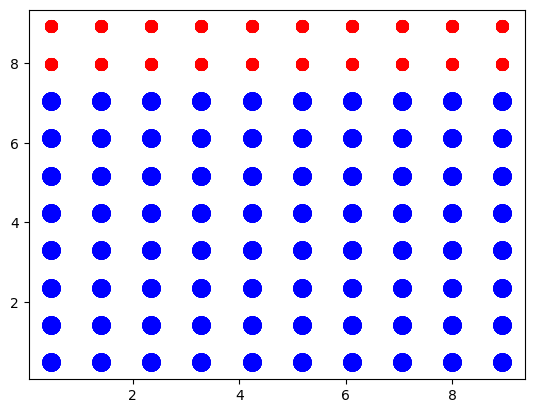

In [2]:
# Cubic lattice with side length L=9.4
L = 9.4
x, y, z = np.random.uniform(low=0.0, high=L, size=(3, N))

nsitesx = int(round(pow(N, (1.0 / 3.0))))
dsitesx = L / float(nsitesx)
for ni in range(nsitesx):
    tmpz = (0.5 + ni) * dsitesx
    for nj in range(nsitesx):
        tmpy = (0.5 + nj) * dsitesx
        for nk in range(nsitesx):
            tmpx = (0.5 + nk) * dsitesx
            i = nk + nj * nsitesx + ni * (nsitesx ** 2)
            x[i] = tmpx
            y[i] = tmpy
            z[i] = tmpz

# Save positions array in txt in order to use as initial configuration for LAMMPS input
np.savetxt('NVE_initposcheck', (np.transpose(np.vstack((x, y, z)))))

plt.figure()
plt.scatter(x[:Na], z[:Na], s=150, color='blue')
plt.scatter(x[Na:], z[Na:], s=70, color='red')

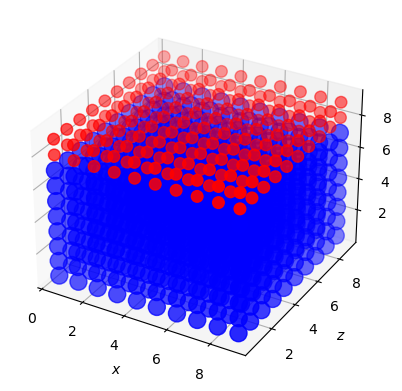

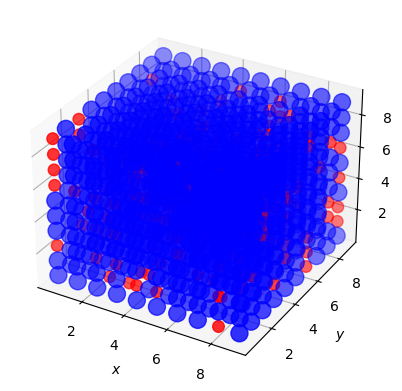

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# 3D plot
fig3d = plt.figure()
fax = fig3d.add_subplot(111, projection='3d')
fax.scatter(x[:Na], y[:Na], z[:Na], marker="o", s=150, facecolor='blue')
fax.scatter(x[Na:], y[Na:], z[Na:], marker="o", s=70, facecolor='red')

for i in range(Na, N):
    j = np.random.randint(Na)
    x[i], x[j] = x[j], x[i]
    y[i], y[j] = y[j], y[i]
    z[i], z[j] = z[j], z[i]

plt.xlim(0, L)
plt.xlabel('$x$')
plt.ylabel('$z$')
plt.show()

# 3D Plot
fig3d = plt.figure()
fax = fig3d.add_subplot(111, projection='3d')
fax.scatter(x[:Na], y[:Na], z[:Na], marker="o", s=150, facecolor='blue')
fax.scatter(x[Na:], y[Na:], z[Na:], marker="o", s=70, facecolor='red')

fax.set_xlabel('$x$')
fax.set_ylabel('$y$')
fax.set_zlabel('$z$')
plt.show()

# 3D plot (without velocity vectors): use the right button of mouse to move and the mouse wheel to zoom
from vpython import *
scene = canvas() 
for i in range(N):
    tx=x[i]
    ty=y[i]
    tz=z[i]
    if i < Na :
        sphere(pos=vector(tx,ty,tz),radius=0.5,color=color.blue)
    else:
        sphere(pos=vector(tx,ty,tz),radius=0.2,color=color.red)

# Velocities
Next cell code has been used to produce velocities for all the $N=1000$ atoms.

**Note**: velocities will be computed from Maxwell-Boltzmann distribution.

In order to do so, for all $i$ particles and $\gamma \in {x,y,z}$ we will compute $v_{i,\gamma}$ from a Gaussian distribution with variance $\sigma_i = 1$. 

Then, all velocities will be rescaled by a factor (`scalefactor` in the definition of the Python function), so for all $i$ and $\gamma$ the velocity will be modified as:
\begin{equation}
v_{i,\gamma} \to \frac{1}{\sqrt{m_i}} v_{i,\gamma} 
\end{equation}

The following step will be characterized by ensure that the derivative of position of center of mass is zero: $\dot{\mathbf{R}}_{CM} = 0$. 

So, for all $i$ and $\gamma$: 
\begin{equation}
v_{i,\gamma} \to v_{i,\gamma} - \frac{1}{\sqrt{m_i}} \frac{\sum_i m_i v_{i,\gamma} }{N} 
\end{equation}
The final step to update the velocities is represented by the rescaling to set the temperature. 

For all $i$ and $\gamma$: 
\begin{equation}
v_{i,\gamma} \to \left ( \frac{3 N k_B T}{\sum_i m_i v_i ^ 2} \right )v_{i,\gamma} 
\end{equation}


In [4]:
def maxwellboltzmannvel(temperature):
    global vx
    global vy
    global vz
    
    nopart=len(vx)
    sigma=np.sqrt(temperature) #sqrt(kT/m)
    vx=np.random.normal(0.0,sigma,nopart)
    vy=np.random.normal(0.0,sigma,nopart)
    vz=np.random.normal(0.0,sigma,nopart)
    # make sure that center of mass does not drift
    vx -= sum(vx)/float(nopart)
    vy -= sum(vy)/float(nopart)
    vz -= sum(vz)/float(nopart)
    # make sure that temperature is exactly wanted temperature
    scalefactor = np.sqrt(3.0*temperature*nopart/sum(vx*vx+vy*vy+vz*vz))
    vx *= scalefactor
    vy *= scalefactor
    vz *= scalefactor


temperature = 1.0 #Kelvin
maxwellboltzmannvel(temperature)

In [5]:
# Save velocities array in txt in order to use as initial configuration for LAMMPS input
np.savetxt('NVE_initvelcheck', (np.transpose(np.vstack((vx,vy,vz)))))

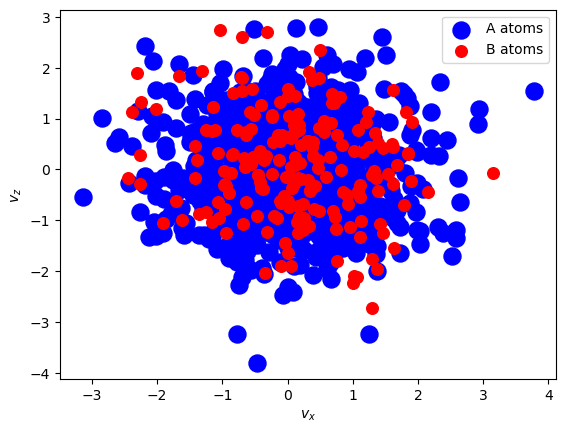

In [6]:
#"""""
#  2d-scatter plot (for data points)
#  It represents how velocity components are distribuited in relation of type of atoms
plt.figure()
plt.scatter(vx[:Na],vz[:Na],s=150,color='blue', label='A atoms')
plt.scatter(vx[Na:],vz[Na:],s=70,color='red', label='B atoms')
plt.xlabel('$v_x$')
plt.ylabel('$v_z$')
plt.legend()
plt.show()
 #"""""

In [7]:
# * 3d-Vpython figure with velocity vectors (green)
# How to visualize it properly: with middle mouse button apply zoom, instead with right mouse button you apply rotations
from vpython import *
scene = canvas() 

for i in range(N):
  tx=x[i]
  ty=y[i]
  tz=z[i]
  tvx = vx[i]
  tvy = vy[i]
  tvz = vz[i]
  if i < Na :
    sphere(pos=vector(tx,ty,tz),radius=0.5,color=color.blue)
  else:
    sphere(pos=vector(tx,ty,tz),radius=0.2,color=color.red)
  arrow(pos=vector(tx,ty,tz),axis=vector(tvx,tvy,tvz),color=color.green)

<IPython.core.display.Javascript object>

# Accelerations
Next cell code has been used to produce accelerations for all the $N=1000$ atoms.

For our system, $m_i = 1, \forall i = 1, ..., N$ and $F_{i,z}$ as given in the equation <span style = "color:red"> **Introduction to the Kob-Andersen Model** </span> (similarly $F_{i,y}$ and $F_{i,x}$). We store the accelerations in numpy arrays. In order to determine $\mathbf{a}_i , \forall i = 1, . . . ,N$,  we need to iterate with loop over $i$ and implement the sum over *neighbors* using an inner loop over $j$.

In [8]:
def acceleration(x,y,z):
  global L
  global Ldiv2
  global Na,Nb,N
  global epsAA,epsAB,epsBB
  global sigmaAAto12,sigmaABto12,sigmaBBto12
  global sigmaAAto6,sigmaABto6,sigmaBBto6
  global rcutAAto2,rcutABto2,rcutBBto2

  ax=np.zeros(N)
  ay=np.zeros(N)
  az=np.zeros(N)
# AA interactions ----> sigma_AA and epsilon_AA
  for i in range(Na-1):
    xi=x[i]
    yi=y[i]
    zi=z[i]
    for j in range(i+1,Na):
      xij=xi-x[j]
      yij=yi-y[j]
      zij=zi-z[j]
      # Here is applied the Minimum Image Convention:
      if xij > Ldiv2: xij -= L
      elif xij < - Ldiv2: xij  += L
      if yij > Ldiv2: yij -= L
      elif yij < - Ldiv2: yij  += L
      if zij > Ldiv2: zij -= L
      elif zij < - Ldiv2: zij  += L

      rijto2 = xij*xij + yij*yij + zij*zij
      if(rijto2 < rcutAAto2):
        onedivrijto2 = 1.0/rijto2
        fmagtmp= epsAA*(sigmaAAto12*onedivrijto2**7
                     - 0.5*sigmaAAto6*onedivrijto2**4)
        ax[i] += fmagtmp*xij
        ax[j] -= fmagtmp*xij
        ay[i] += fmagtmp*yij
        ay[j] -= fmagtmp*yij
        az[i] += fmagtmp*zij
        az[j] -= fmagtmp*zij

# AB interactions----> sigma_AB and epsilon_AB
  for i in range(Na):
    xi=x[i]
    yi=y[i]
    zi=z[i]
    for j in range(Na,N):
      xij=xi-x[j]
      yij=yi-y[j]
      zij=zi-z[j]
      # Here is applied the Minimum Image Convention:
      if xij > Ldiv2: xij -= L
      elif xij < - Ldiv2: xij  += L
      if yij > Ldiv2: yij -= L
      elif yij < - Ldiv2: yij  += L
      if zij > Ldiv2: zij -= L
      elif zij < - Ldiv2: zij  += L

      rijto2 = xij*xij + yij*yij + zij*zij
      if(rijto2 < rcutABto2):
        onedivrijto2 = 1.0/rijto2
        fmagtmp= epsAB*(sigmaABto12*onedivrijto2**7
                     - 0.5*sigmaABto6*onedivrijto2**4)
        ax[i] += fmagtmp*xij
        ax[j] -= fmagtmp*xij
        ay[i] += fmagtmp*yij
        ay[j] -= fmagtmp*yij
        az[i] += fmagtmp*zij
        az[j] -= fmagtmp*zij

# BB interactions----> sigma_BB and epsilon_BB
  for i in range(Na,N-1):
    xi=x[i]
    yi=y[i]
    zi=z[i]
    for j in range(i+1,N):
      xij=xi-x[j]
      yij=yi-y[j]
      zij=zi-z[j]
      # Here is applied the Minimum Image Convention:
      if xij > Ldiv2: xij -= L
      elif xij < - Ldiv2: xij  += L
      if yij > Ldiv2: yij -= L
      elif yij < - Ldiv2: yij  += L
      if zij > Ldiv2: zij -= L
      elif zij < - Ldiv2: zij  += L

      rijto2 = xij*xij + yij*yij + zij*zij
      if(rijto2 < rcutBBto2):
        onedivrijto2 = 1.0/rijto2
        fmagtmp= epsBB*(sigmaBBto12*onedivrijto2**7
                     - 0.5*sigmaBBto6*onedivrijto2**4)
        ax[i] += fmagtmp*xij
        ax[j] -= fmagtmp*xij
        ay[i] += fmagtmp*yij
        ay[j] -= fmagtmp*yij
        az[i] += fmagtmp*zij
        az[j] -= fmagtmp*zij

  return 48*ax,48*ay,48*az

In [9]:
def potential(x,y,z):
  global L
  global Ldiv2
  global Na,Nb,N
  global epsAA,epsAB,epsBB
  global sigmaAAto12,sigmaABto12,sigmaBBto12
  global sigmaAAto6,sigmaABto6,sigmaBBto6
  global rcutAAto2,rcutABto2,rcutBBto2
  global VcutAA,VcutAB,VcutBB

  Vtot = 0.0
# AA interactions----> sigma_AA and epsilon_AA
  for i in range(Na-1):
    xi=x[i]
    yi=y[i]
    zi=z[i]
    for j in range(i+1,Na):
      xij=xi-x[j]
      yij=yi-y[j]
      zij=zi-z[j]
      # Here is applied the Minimum Image Convention:
      if xij > Ldiv2: xij -= L
      elif xij < - Ldiv2: xij  += L
      if yij > Ldiv2: yij -= L
      elif yij < - Ldiv2: yij  += L
      if zij > Ldiv2: zij -= L
      elif zij < - Ldiv2: zij  += L

      rijto2 = xij*xij + yij*yij + zij*zij
      if(rijto2 < rcutAAto2):
        onedivrijto2 = 1.0/rijto2
        Vtot += epsAA*(sigmaAAto12*onedivrijto2**6
                     - sigmaAAto6*onedivrijto2**3)-VcutAA

# AB interactions----> sigma_AB and epsilon_AB
  for i in range(Na):
    xi=x[i]
    yi=y[i]
    zi=z[i]
    for j in range(Na,N):
      xij=xi-x[j]
      yij=yi-y[j]
      zij=zi-z[j]
      # Here is applied the Minimum Image Convention:
      if xij > Ldiv2: xij -= L
      elif xij < - Ldiv2: xij  += L
      if yij > Ldiv2: yij -= L
      elif yij < - Ldiv2: yij  += L
      if zij > Ldiv2: zij -= L
      elif zij < - Ldiv2: zij  += L

      rijto2 = xij*xij + yij*yij + zij*zij
      if(rijto2 < rcutABto2):
        onedivrijto2 = 1.0/rijto2
        Vtot += epsAB*(sigmaABto12*onedivrijto2**6
                     - sigmaABto6*onedivrijto2**3)-VcutAB

# BB interactions----> sigma_BB and epsilon_BB
  for i in range(Na,N-1):
    xi=x[i]
    yi=y[i]
    zi=z[i]
    for j in range(i+1,N):
      xij=xi-x[j]
      yij=yi-y[j]
      zij=zi-z[j]
      # Here is applied the Minimum Image Convention:
      if xij > Ldiv2: xij -= L
      elif xij < - Ldiv2: xij  += L
      if yij > Ldiv2: yij -= L
      elif yij < - Ldiv2: yij  += L
      if zij > Ldiv2: zij -= L
      elif zij < - Ldiv2: zij  += L

      rijto2 = xij*xij + yij*yij + zij*zij
      if(rijto2 < rcutBBto2):
        onedivrijto2 = 1.0/rijto2
        Vtot += epsBB*(sigmaBBto12*onedivrijto2**6
                     - sigmaBBto6*onedivrijto2**3)-VcutBB

  return 4.0*Vtot/float(N)

## Choice of model parameters

In [10]:
# New parameters
L = 9.4
Ldiv2 = L/2.0
sigmaAA=1.0
sigmaAB=0.8
sigmaBB=0.88
epsAA=1.0
epsAB=1.5
epsBB=0.5
rcutfactor = 2.5
# IMPORTANT: number of timesteps nMD, rememeber that: final_Time = nMD  x  Deltat ,   Deltat = 0.005
###########################################################################################################
nMD = 200               # for molecular simulation until T=1.0                                           #
#nMD = 1000            # for plotting MSD, Q(t), chi_4(t) until T=5.0 [ALERT: it's a VERY long simulation]#
###########################################################################################################
Deltat=0.005
Deltatto2=(Deltat**2)
final_time = nMD * Deltat
sigmaAAto12 = sigmaAA**12
sigmaABto12 = sigmaAB**12
sigmaBBto12 = sigmaBB**12
sigmaAAto6 = sigmaAA**6
sigmaABto6 = sigmaAB**6
sigmaBBto6 = sigmaBB**6
rcutAAto2 = (rcutfactor*sigmaAA)**2
rcutABto2 = (rcutfactor*sigmaAB)**2
rcutBBto2 = (rcutfactor*sigmaBB)**2

VcutAA = epsAA*(sigmaAAto12/(rcutAAto2**6)-sigmaAAto6/(rcutAAto2**3))
VcutAB = epsAB*(sigmaABto12/(rcutABto2**6)-sigmaABto6/(rcutABto2**3))
VcutBB = epsBB*(sigmaBBto12/(rcutBBto2**6)-sigmaBBto6/(rcutBBto2**3))

In [11]:
# Initialize accelerations:
ax,ay,az = acceleration(x,y,z)
# Check accelerations and save accelerations array in txt file:
np.savetxt('NVE_initacccheck', (np.transpose(np.vstack((ax,ay,az)))))

In [12]:
# Store positions at t=0
x0 = np.copy(x)
y0 = np.copy(y)
z0 = np.copy(z)
# store positions at t=0 for computation of MSD and RMSD:
xu = np.copy(x)
yu = np.copy(y)
zu = np.copy(z)

# MSD variables
positions_A = []
positions_B = []

# Save initial positions for MSD calculation
positions_A.append(np.copy(np.stack((xu[:Na], yu[:Na], zu[:Na]), axis=1)))
positions_B.append(np.copy(np.stack((xu[Na:], yu[Na:], zu[Na:]), axis=1)))


# Useful variables z_i(t): 
ziplotarray =  np.zeros(nMD,float)
kinEarray =  np.zeros(nMD,float)
Vpotarray =  np.zeros(nMD,float)

# t=0 snapshot for animation
s = np.empty(N,sphere)
ar = np.empty(N,arrow)
for i in range(N):
  if i < Na :
    s[i] = sphere(pos=vector(x[i],y[i],z[i]),radius=0.5,color=color.blue)
  else:
    s[i] = sphere(pos=vector(x[i],y[i],z[i]),radius=0.2,color=color.red)
  ar[i] = arrow(pos=vector(x[i],y[i],z[i]),axis=vector(vx[i],vy[i],vz[i]),
            color=color.green)

# Time Loop for update of r(t) and v(t):
for tstep in range(1,nMD+1):
  # Update of positions r(t):
  x += vx*Deltat + 0.5*ax*Deltatto2
  y += vy*Deltat + 0.5*ay*Deltatto2
  z += vz*Deltat + 0.5*az*Deltatto2
    
  xu += vx*Deltat + 0.5*ax*Deltatto2  #for MSD
  yu += vy*Deltat + 0.5*ay*Deltatto2  #for MSD
  zu += vz*Deltat + 0.5*az*Deltatto2  #for MSD

  # Save postions for each timestep:
  positions_A.append(np.copy(np.stack((xu[:Na], yu[:Na], zu[:Na]), axis=1)))
  positions_B.append(np.copy(np.stack((xu[Na:], yu[Na:], zu[Na:]), axis=1)))

  # Periodic boundary conditions: M.I.C.
  for i in range(N):
    if x[i] > L: x[i] -= L
    elif x[i] <= 0:  x[i] += L
    if y[i] > L: y[i] -= L
    elif y[i] <= 0:  y[i] += L
    if z[i] > L: z[i] -= L
    elif z[i] <= 0:  z[i] += L

  # Update of velocities v(t):
  vx += 0.5*ax*Deltat
  vy += 0.5*ay*Deltat
  vz += 0.5*az*Deltat
  ax,ay,az = acceleration(x,y,z)
  vx += 0.5*ax*Deltat
  vy += 0.5*ay*Deltat
  vz += 0.5*az*Deltat

  # For plotting of z_50(t) (8th part., similarly x,y,& other part.)
  ziplotarray[tstep-1]=z[49]

  # Determine kinetic energy per particle:  0.5 * m * v^2
  kinE=0.5*sum(vx*vx+vy*vy+vz*vz)/float(N)
  kinEarray[tstep-1]=kinE

  # Determine potential energy per particle:
  Vpot = potential(x,y,z)
  Vpotarray[tstep-1]=Vpot

In [13]:
"""
# Animation (it takes a very time, so uncomment if figures below wanted)
  rate(30)
  for i in range(N):
    s[i].pos = vector(x[i],y[i],z[i])
    ar[i].pos = vector(x[i],y[i],z[i])
    ar[i].axis = vector(vx[i],vy[i],vz[i])
"""

'\n# Animation (it takes a very time, so uncomment if figures below wanted)\n  rate(30)\n  for i in range(N):\n    s[i].pos = vector(x[i],y[i],z[i])\n    ar[i].pos = vector(x[i],y[i],z[i])\n    ar[i].axis = vector(vx[i],vy[i],vz[i])\n'

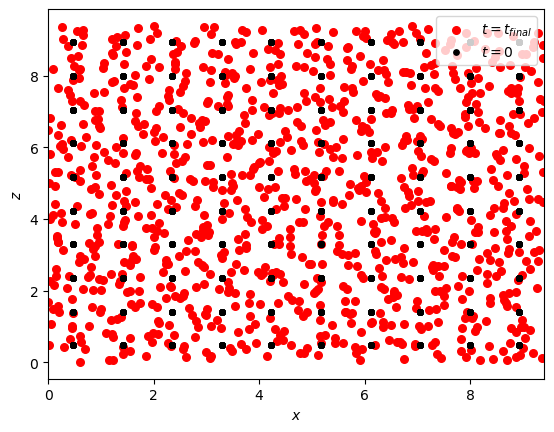

In [14]:
 #"""
## 2d-scatter plot positions z(x) for t=0 and after nmd steps
# t=0: black small circles
# t=final_time (last time step): big red circles
plt.figure()
plt.scatter(x,z,s=30,color='red', label='$t=t_{final}$')
plt.scatter(x0,z0,s=15,color='black', label='$t=0$')
plt.xlim(0,L)
plt.xlabel('$x$')
plt.ylabel('$z$')
plt.legend()
plt.show()
#"""

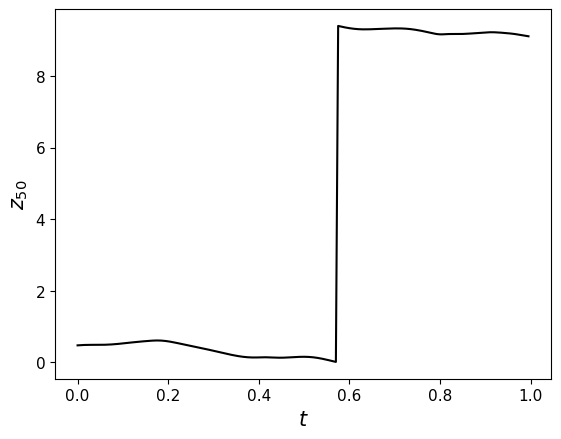

In [15]:
#"""
# Plot of a generic trajectory:
# We chose to plot y_8(t): the trend of y-component of 8th atom

# Time array:
tarray = np.arange(len(ziplotarray)) * Deltat

plt.rcParams['xtick.labelsize']=11
plt.rcParams['ytick.labelsize']=11
plt.figure()
plt.plot(tarray,ziplotarray,color='black')
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$z_{50}$',fontsize=15)
plt.show()
#"""

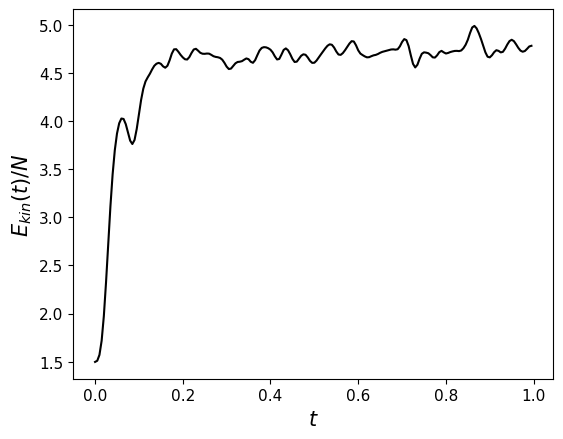

In [16]:
#"""
# Plot of kinetic energy:  K(t)/N
# Time array:
tarray = np.arange(len(kinEarray)) * Deltat

plt.rcParams['xtick.labelsize']=11
plt.rcParams['ytick.labelsize']=11
plt.figure()
plt.plot(tarray,kinEarray,color='black')
plt.xlabel('$t$',fontsize=15)
plt.subplots_adjust(left=0.15)
plt.ylabel('$E_{kin}(t)/N$',fontsize=15)
plt.show()
#"""""

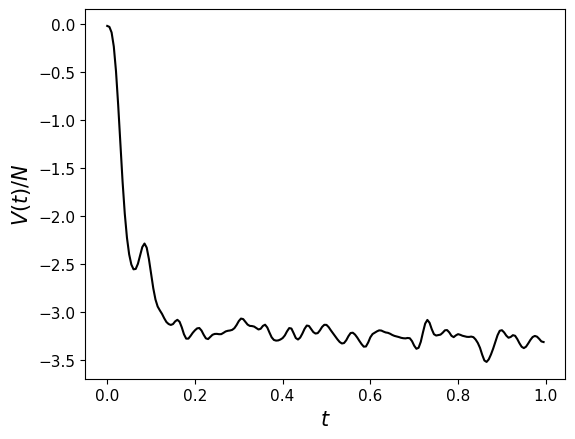

In [17]:
#"""""
# Plot of potential energy: V_pot(t)/N

plt.rcParams['xtick.labelsize']=11
plt.rcParams['ytick.labelsize']=11
plt.figure()
plt.plot(tarray,Vpotarray,color='black')
plt.xlabel('$t$',fontsize=15)
plt.subplots_adjust(left=0.15)
plt.ylabel('$V(t)/N$',fontsize=15)
plt.show()
#"""

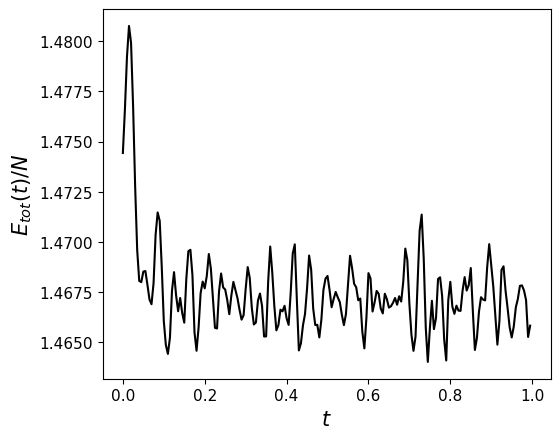

In [18]:
#"""
# Plot of total energy: E_tot(t)/N

#plt.rcParams['xtick.labelsize']=11
#plt.rcParams['ytick.labelsize']=11
plt.figure()
plt.plot(tarray,kinEarray+Vpotarray,color='black')
plt.xlabel('$t$',fontsize=15)
plt.subplots_adjust(left=0.2)
plt.ylabel('$E_{tot}(t)/N$',fontsize=15)
plt.show()
#"""

**========================================================================================================================**

**========================================================================================================================**

# <span style = "color: red"> Radial Distribution Functions in Python </span>


In statistical mechanics and materials science, the radial distribution function $g(r)$ describes how the density of matter varies as a function of distance from a given point.

Considering two points $A$ and $B$ separated by a distance $r$ within a molecular system, the average density $\rho=N/V$, calculated over the entire volume of the lattice, will be modified by a factor $g(r)$ at point $B$. This radial distribution function takes into account the correlations between the particles that interact with each other.

A schematic representation can be observed below to understand how to determine the radial distribution function.

![rad_dist_function_schematic](reference_images/g(r)_schematic.png)

In this case, $r = r_{ij} = |\mathbf{r_i} − \mathbf{r_j} |$ and radial symmetry is assumed.

Since we have a binary Lennard-Jones liquid, we will consider three different radial distribution functions: $g_{AA}(r)$, $g_{AB}(r)$ and $g_{BB}(r)$ which differ considering the type of atom in the interaction between $i$ and $j$.

The generic radial distribution function is defined as: 
\begin{equation}
g_{xy} (r) = \frac{V}{N_x(N_y -1)}\left \langle \sum_{i=1}^{N_x} \sum_{j=1, j \neq i}^{N_y} \delta (r - |\mathbf{r_i}-\mathbf{r_j}|) \right \rangle
\end{equation}

where $x, y \in {A,B}$ and:
\begin{equation}
g_{AB} (r) = \frac{V}{N_A N_B}\left \langle \sum_{i=1}^{N_A} \sum_{j=1}^{N_B} \delta (r - |\mathbf{r_i}-\mathbf{r_j}|) \right \rangle
\end{equation}

The equation above include particle pairs of the type specified. The Dirac function $\delta (z)$ is the number density for a point particle at $z=0$. The number density of $(i,j)$ pairs is normalized by the global density. 

Thus, the number density of $(i,j)$ particle pair refers to the density of pairs of particles of types $i$ and $j$ (which may be of different species, such as atoms of types $A$ and $B$) at a distance $r$. It is a quantity that is calculated to understand the spatial distribution of particles in a system, such as a liquid or a solid.

In the definition of the radial distribution function (**RDF**), $g_{xy}(r)$, we keep track of the probability of finding a particle $x$ (of type $x$) at a distance $r$ from a particle $y$ (of type $y$), compared to the probability that it would be if the particles were homogeneously distributed. This probability is normalized with respect to the overall particle density.


### How to calculate $g_{xy}(r)$ in Python

To compute a histogram of the distances
$r_{ij}$, we will use an array where each bin is separated by an amount equal to $\Delta r$ (`grdelta`) and the length of the array is equal to `grnbinmax`. Before constructing the histogram, we initialize the arrays `gofrAAhist`, `gofrBBhist`, and `gofrABhist` to zero. For each measurement, we loop over all unique combinations of particles ($j>i$), compute the minimum distance using the closest image criterion, and increment the corresponding counter to the appropriate bin.


In [19]:
# How to create the g(r) histogram:
grdelta = 0.1
grnbinmax = int(Ldiv2/grdelta)
histgofrAA = np.zeros(grnbinmax,int)
histgofrAB = np.zeros(grnbinmax,int)
histgofrBB = np.zeros(grnbinmax,int)
nstepgofr = 25

In [20]:
#-------- g(r) histogram measurement function: -----------
def histmeas(x,y,z):
  global histgofrAA,histgofrBB,histgofrAB
  global L
  global Ldiv2
  global Na, Nb, N
  global grnbinmax
  global grdelta
  for i in range(0,N-1):
    xi=x[i]
    yi=y[i]
    zi=z[i]
    for j in range(i+1,N):
      xij=xi-x[j]
      yij=yi-y[j]
      zij=zi-z[j]
      #Periodic boundary conditions: M.I.C.
      if xij > Ldiv2: xij -= L
      elif xij < - Ldiv2: xij  += L
      if yij > Ldiv2: yij -= L
      elif yij < - Ldiv2: yij  += L
      if zij > Ldiv2: zij -= L
      elif zij < - Ldiv2: zij  += L

      rijto2 = xij*xij + yij*yij + zij*zij
      rij=np.sqrt(rijto2)
      grbin=int(rij/grdelta)
      if(grbin < grnbinmax):
        if(i < Na):
          if (j < Na): #AA
            histgofrAA[grbin] += 2
          else: #AB
            histgofrAB[grbin] += 1
        else: #BB
          histgofrBB[grbin] += 2


In [21]:
nstepBoltz = 10
temperature = 1.0 # Kelvin
maxwellboltzmannvel(temperature)

# Temperature array, length: nMD
temparray = np.zeros(nMD,float)

# Time Loop
for tstep in range(1,nMD+1):
  # Update of positions r(t):
  x += vx*Deltat + 0.5*ax*Deltatto2
  y += vy*Deltat + 0.5*ay*Deltatto2
  z += vz*Deltat + 0.5*az*Deltatto2

  # Periodic boundary conditions: M.I.C.
  for i in range(N):
    if x[i] > L: x[i] -= L
    elif x[i] <= 0:  x[i] += L
    if y[i] > L: y[i] -= L
    elif y[i] <= 0:  y[i] += L
    if z[i] > L: z[i] -= L
    elif z[i] <= 0:  z[i] += L

  # Update of positions v(t):
  vx += 0.5*ax*Deltat
  vy += 0.5*ay*Deltat
  vz += 0.5*az*Deltat
  ax,ay,az = acceleration(x,y,z)
  vx += 0.5*ax*Deltat
  vy += 0.5*ay*Deltat
  vz += 0.5*az*Deltat

# T-bath: draw every nstepBoltz steps velocity from Boltzmann distribution:
  if (tstep % nstepBoltz) == 0 :
    maxwellboltzmannvel(temperature)

# Determine kinetic energy and temperature (rememeber:  m_i=1 for all i=1,...,N)
  kinE=0.5*sum(vx*vx+vy*vy+vz*vz)/float(N)
  tempmeas = kinE*2.0/3.0
  temparray[tstep-1]=tempmeas
    
# Measure radial distribution function g(r):
  if (tstep % nstepgofr) == 0 :
    histmeas(x,y,z)

We have assumed that `nmeas` measurements of the histogram
were taken. For the normalization we determine the shell volume/area, which is sketched in the schematic raffiguration above shaded area enclosed by the two large circles drawn with thick lines. In three dimensions
the shell volume is $(4\pi / 3)^3 (r_{outer}^3 - r_{inner}^3$). 

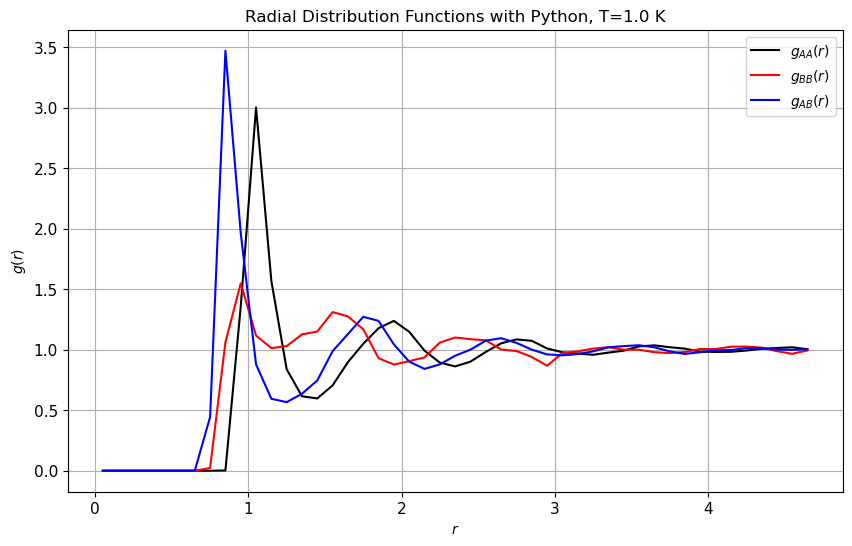

In [22]:
fileoutgofr = open("gofrAABBAB_NVE.data", mode='w')
nmeas = int(nMD / nstepgofr)
for grbin in range(grnbinmax):
    rinner = grbin * grdelta
    router = rinner + grdelta
    shellvol = (4.0 * sp.pi / 3.0) * (router**3 - rinner**3)
    gofrAA = (L**3 / (Na * (Na - 1))) * histgofrAA[grbin] / (shellvol * nmeas)
    gofrBB = (L**3 / (Nb * (Nb - 1))) * histgofrBB[grbin] / (shellvol * nmeas)
    gofrAB = (L**3 / (Na * Nb)) * histgofrAB[grbin] / (shellvol * nmeas)
    rmid = rinner + 0.5 * grdelta
    print(rmid, gofrAA, gofrBB, gofrAB, file=fileoutgofr)

fileoutgofr.close()  # Close file to be sure that data is written

# Loading and plot of the data:
data = np.loadtxt('gofrAABBAB_NVE.data')
r = data[:, 0]
g_AA = data[:, 1]
g_BB = data[:, 2]
g_AB = data[:, 3]

plt.figure(figsize=(10, 6))
plt.plot(r, g_AA, label='$g_{AA}(r)$', color='black')
plt.plot(r, g_BB, label='$g_{BB}(r)$', color='red')
plt.plot(r, g_AB, label='$g_{AB}(r)$', color='blue')
plt.xlabel('$r$')
plt.ylabel('$g(r)$')
plt.title(f'Radial Distribution Functions with Python, T={temperature} K')
plt.legend()

plt.grid(True)
plt.show()

### Interpretation of the results

Since the repulsive interaction $V(r_{ij}) \to 0$ as $r \to \infty$ prevents two particles from completely overlapping, the radial distribution function $g(r)$ approaches zero as $r \to 0$.

The first peak of $g(r)$ corresponds to the most probable distance of the first shell of neighboring particles. Subsequent peaks represent the second nearest neighbor shell, and so on. As $r$ increases, the peaks become less pronounced.

The positions of the peaks in $g_{AA}(r)$, $g_{AB}(r)$, and $g_{BB}(r)$ are consistent with the results presented by Kob and Andersen in their paper [2] (in the figure below).

![g(r)_KA_paper](reference_images/rad_distr_functions_KA_paper.png)

## <span style="color: green"> Comparison with LAMMPS simulation </span>


We utilize the positions and the velocities produced by the Python simulation conduced at the temperature $T=0.5K$. These positions and velocities have been saved in `.txt` files and then reported in the file `configurazione_iniziale_Python_NVE_T05eq.data`, that could be read with the command `read_data`, very useful in order to avoid the inizialization of positions and velocities of all atoms.


We can determine the radial distribution functions (RDF) with LAMMPS by adding the following lines to the input file before the `run` command:

```
compute rdfAABBAB all rdf 25 1 1 2 2 1 2
fix myrdf all ave/time 25 8 200 c_rdfAABBAB[*] file gofrAABBAB.data mode vector

```

The `compute` command defines the measurements, which will be performed during the simulation:

* `rdfAABBAB` is the custom ID for this `compute` command. This ID is used in the `fix` command with `c_rdfAABBAB`, where the ID acts as a variable name.
* The term `all` applies the command to all atoms in the system.
* `rdf` calculates the radial distribution function.
* `25 = Nbin` specifies that the interval $\Delta r$ is equal to $r_{cut}/25$
* The next numbers define the combinations of particle types, namely $g_{AA}$, $g_{BB}$ and $g_{AB}$.

* The `fix ave/time` command defines the time average. As described in the following part of ] [LAMMPS documentation](https://docs.lammps.org/fix_ave_time.html) to set the three numbers in our example we specify that the histogram is calculated every 25 time steps (`Nevery = 25`), and 8 measurements (`Nrepeat = 8`) are averaged, with the time average printed every 200 steps (`Nfreq = 200`). For example, if the simulation runs for 600 time steps (`nMD = 600`), then the means of $g(r)$ will be printed three times: the first mean will include the measurements at time steps 200, 175, 150, ..., 25, and the last mean at time steps 600, 575, 550, ..., 425. There are some limitations in the choice of values ​​for `Nevery`, `Nrepeat`, and `Nfreq`, as noted in the [LAMMPS documentation](https://docs.lammps.org/fix_ave_time.html).
* The use of `[*]` indicates that the time mean should be computed for each of the variables in the `compute rdf` command.
* The `file gofrAABBAB.data` command specifies that the results should be saved to the file `gofrAABBAB.data`.
* The `mode vector` parameter is needed because the functions $g_{AA}(r)$, $g_{BB}(r)$, and $g_{AB}(r)$ are vectors rather than scalars, with indices representing the bins $r=[0,\Delta r), [\Delta r,2 \Delta r)$, and so on. The entries in the `gofrAABBAB.data` file include for each time average (here 200, 400, 600) a line specifying the print time in time steps, followed by lines for each bin, with columns representing the bin number, $r$, $g_{AA}(r)$, $g_{BB}(r)$, $g_{AB}(r)$, $c_{AA}(r)$, $c_{BB}(r)$, and $c_{AB}(r)$, where $c_{AA}(r)$, etc., represent the coordination numbers.

```
#KA_LJ NVE, read data 
atom_style atomic 
boundary p p p #periodic boundary cond. in each direction 
read_data configurazione_iniziale_Python_NVE_T05eq.data             # read data file (incl.mass info) 

pair_style lj/cut 2.5                                           # Define interaction potential (Lennard-Jones)
pair_coeff 1 1 1.0 1.0 2.5                                      #typeA typeA epsAA sigmaAA rcutAA=2.5 
pair_coeff 1 2 1.5 0.80 2.0                                     #typeA typeB epsAB sigmaAB rcutAB=2.5*0.8=2.0 
pair_coeff 2 2 0.5 0.88 2.2                                     #typeB typeB epsBB sigmaBB rcutBB=2.5*0.88=2.2 

timestep 0.005                                                  #Delta t 
neighbor 0.3 bin 
neigh_modify every 1 delay 0 check yes                          # Update neighbor                                               

# print every 50 MD steps positions and velocities into confdump.*.data files 
dump mydump all custom 50 confdump.*.data id type x y z vx vy vz
dump_modify mydump sort id 

# set numerical integrator 
fix nve1 all nve                                                # NVE; default is velocity Verlet 

# Radial distribution functions
compute rdfAABBAB all rdf 25 1 1 2 2 1 2
fix myrdf all ave/time 25 8 200 c_rdfAABBAB[*] file gofrAABBAB_LAMMPS.data mode vector

run 200
```

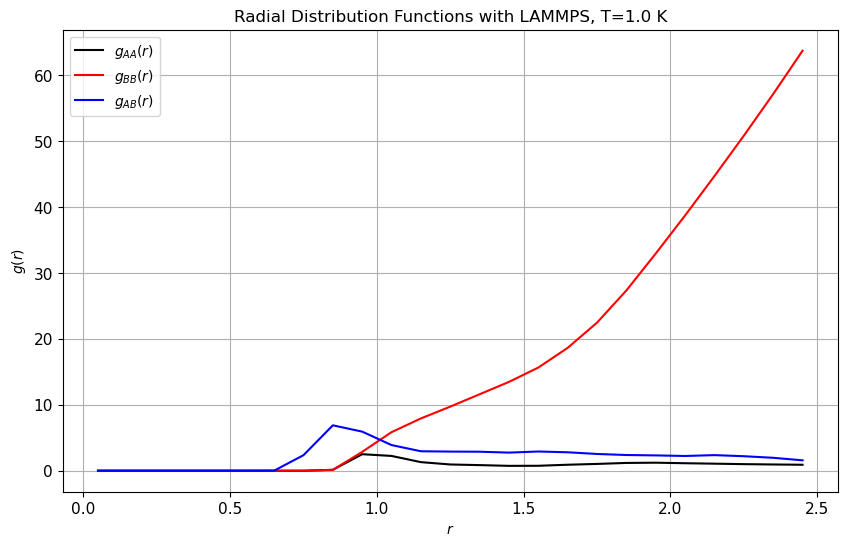

In [23]:
# Data loading
data = np.loadtxt('gofrAABBAB_LAMMPS.data', skiprows=4)  

# Columns extraction
r = data[:, 1]     
g_AA_lammps = data[:, 2]  
g_BB_lammps = data[:, 3]  
g_AB_lammps = data[:, 4]  

# Plot of radial distributions obtained with LAMMPS:
plt.figure(figsize=(10, 6))
plt.plot(r, g_AA_lammps, label='$g_{AA}(r)$', color='black')
plt.plot(r, g_BB_lammps, label='$g_{BB}(r)$', color='red')
plt.plot(r, g_AB_lammps, label='$g_{AB}(r)$', color='blue')
plt.xlabel('$r$')
plt.ylabel('$g(r)$')
plt.title(f'Radial Distribution Functions with LAMMPS, T={temperature} K')
plt.legend()

plt.grid(True)
plt.show()

We can see that the peak positions for $g_{AB}$ and $g_{AA}$ are clearly almost the same for Python and LAMMPS simulations. There is a strange trend for the curve $g_{BB}$, in fact, it seems to become bigger as $r$ grows and it does not appear to approach 1 for $r \to \infty$. 

**========================================================================================================================**

**========================================================================================================================**

# <span style="color: red">  Mean Squared Displacement </span>



Mean Squared Displacement (**MSD**) is a fundamental quantity in diffusion processes studied by molecular dynamics. It is mainly used to characterize how particles move within a system over time, providing information on the nature and dynamics of the diffusion process.

Determining the MSD allows us to determine whether the motion of particles follows classical (Brownian) diffusion or if other dynamics are at play, such as anomalous diffusion (superdiffusion or subdiffusion). 

In a classical diffusion process, the MSD grows linearly with time:
\begin{equation}
\left\langle r^2(t) \right\rangle \sim t
\end{equation}

where $r(t)$ is the position of the particle at time $t$ and $\left\langle \cdot \right\rangle$ denotes an average over the particles or trajectories.


 MSDs can be computed from the following expression, known as the **Einstein formula**:
\begin{equation}
MSD=\left\langle \frac{1}{N}\sum_{i=1}^{N}|r_{i,d}−r_{i,d}(t_0)|^2 \right \rangle
\end{equation}

where $N$ is the number of equivalent particles the MSD is calculated over, $r$ are their coordinates and $d$ the desired dimensionality of the MSD.

In the following, we will considerate to calculate the MSD separately for $A$ and $B$ particles (in both Python and LAMMPS simulation), following this way:
\begin{equation}
MSD_{\alpha}=\left\langle r_{\alpha}^2(t) \right \rangle=\left\langle \frac{1}{N_{\alpha}}\sum_{i=1}^{N_{\alpha}}|r_{i,d}−r_{i,d}(t_0)|^2 \right \rangle, \alpha \in (A,B)
\end{equation}



MSD takes a fundamental role in the analysis of the molecular dynamics simulation for these reasons: 


- **Analysis of the structure and interaction between particles:**

The behavior of the MSD can reveal information about the interactions between particles and the structures present in the system. For example, if the MSD reaches a plateau, this can indicate a confinement regime or the presence of structures that limit the motion of the particles. 

- **Study of phase transitions:**

Changes in the behavior of the MSD can indicate phase transitions in the system, such as the glass transition, where particles become immobilized on long time scales. 

- **Determining behavior over time:**

The MSD is useful for understanding the dynamic behavior of particles on different time scales, distinguishing between processes that are relevant in the short term and those that are significant in the long term. In summary, the calculation of the Mean Squared Displacement in molecular dynamics allows us to obtain detailed information about the dynamics of particles in a system, the nature of the diffusion process, and the physical properties of the system itself.



## Mean Square Displacement with Python simulation

In [24]:
# Function that determines the MSD for the particles
def calculate_msd(positions):
    num_timesteps = positions.shape[0]
    num_atoms = positions.shape[1]
    msd = np.zeros(num_timesteps)
    
    for t in range(num_timesteps):
        displacement = positions[t] - positions[0]
        squared_displacement = np.sum(displacement ** 2, axis=1)
        msd[t] = np.mean(squared_displacement)
    
    return msd

In [25]:
# Convertion of the list for MSD in array numpy
positions_A = np.array(positions_A)
positions_B = np.array(positions_B)

# Array numpy for positions:
positions = np.concatenate((positions_A, positions_B), axis=1)

# MSD calculation for both atoms groups
msd_A = calculate_msd(positions_A)
msd_B = calculate_msd(positions_B)

In [26]:
with open("msd.data", mode='w') as fileoutmsd:
    for tstep in range(len(msd_A)):
        print(tstep * Deltat, msd_A[tstep], msd_B[tstep], file=fileoutmsd)

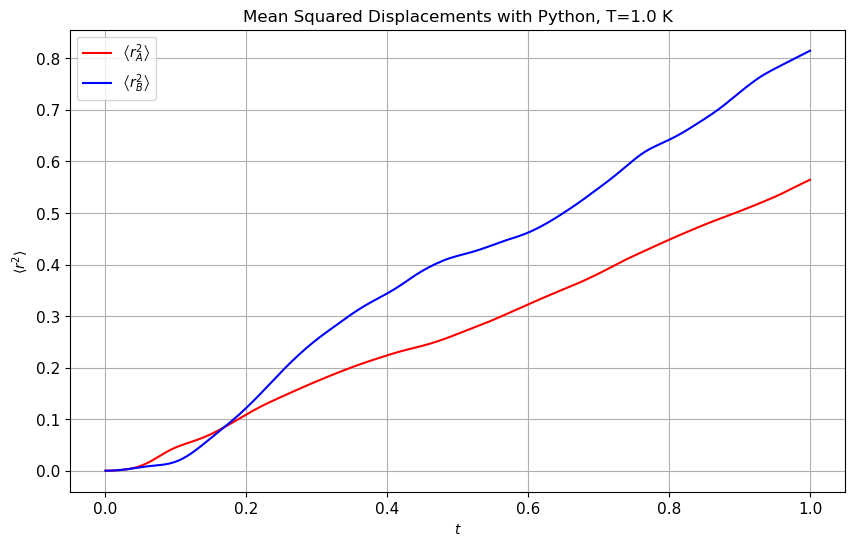

In [27]:
# Data loading
msd_data = np.loadtxt('msd.data')

# Columns extraction
t = msd_data[:, 0]
r_A = msd_data[:, 1]
r_B = msd_data[:, 2]

# Plot of msd:
plt.figure(figsize=(10, 6))
plt.plot(t, r_A, label=r'$\left\langle r_{A}^2 \right\rangle$', color='red')
plt.plot(t, r_B, label=r'$\left\langle r_{B}^2 \right\rangle$', color='blue')
plt.xlabel('$t$')
plt.ylabel(r'$\left\langle r^2 \right\rangle$')
plt.title(f'Mean Squared Displacements with Python, T={temperature} K')
plt.legend()

plt.grid(True)
plt.show()

### Root Mean Squared Displacement

The MSD is the average of the square of the movements of the particles compared to their initial position. This value is very useful for analyzing the widespread behavior of particles over time.

Difference between MSD and Root MSD (RMSD)
* **MSD**: Mean Square Displacement is the average of the square of particles movements.
* **RMSD**: Root Mean Square Displacement is the square root of the MSD, and represents a measure of the average distance that the particles have traveled.

Mathematically, the RMSD is defined as
\begin{equation}
RMSD(t) = \sqrt{MSD(t)} = \sqrt{\left\langle \frac{1}{N}\sum_{i=1}^{N}|r_{i,d}−r_{i,d}(t_0)|^2 \right \rangle}
\end{equation}

RMSD can be useful when you want to have a measure of the actual distance that the particles have traveled, rather than the square distance. In many studies, such as that of Karmakar [3], RMSD size is used to compare directly with characteristic distances of the system (such as $ a_0 $) and then to define important quantities such as $ Q(t) $ and $ \chi_4 (t ) $, which will be described later inside the notebook.

To calculate the value of $ a_0 $ in the context of our code, we must determine the point where the root-mean-Square displacement (RMSD) reaches a plateau. The idea is that $ a_0 $ corresponds to the $ r $ cutoff chosen to be close to the distance at which the RMSD of the particles as a function of time exhibits a plateau.

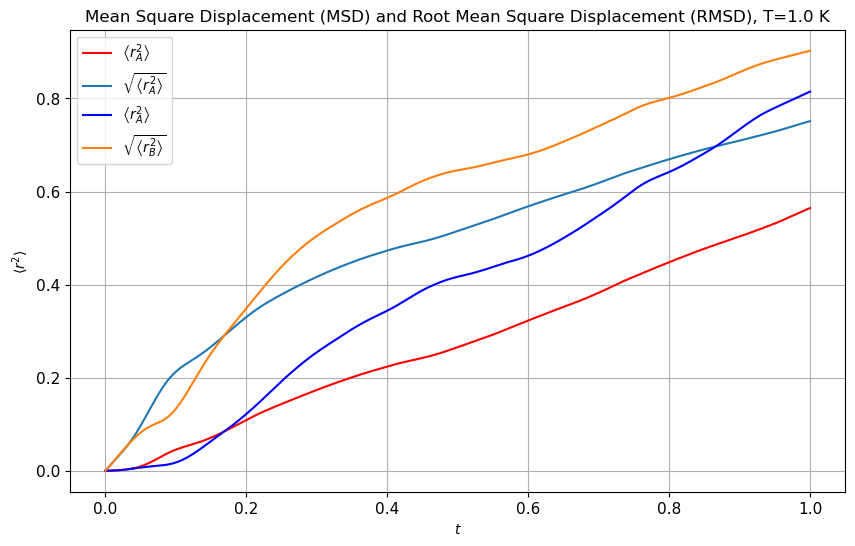

In [28]:
# Calcolo dell'RMSD
rmsd_A = np.sqrt(r_A)
rmsd_B = np.sqrt(r_B)

# Plotting MSD e RMSD
plt.figure(figsize=(10, 6))
plt.plot(t, r_A, label=r'$\left\langle r_{A}^2 \right\rangle$', color='red')
plt.plot(t, rmsd_A, label=r'$\sqrt{\left\langle r_{A}^2 \right\rangle}$')
plt.plot(t, r_B, label=r'$\left\langle r_{A}^2 \right\rangle$', color='blue')
plt.plot(t, rmsd_B, label=r'$\sqrt{\left\langle r_{B}^2 \right\rangle}$')
plt.xlabel(r'$t$')
plt.ylabel(r'$\left\langle r^2 \right\rangle$')
plt.legend()
plt.grid(True)
plt.title(f'Mean Square Displacement (MSD) and Root Mean Square Displacement (RMSD), T={temperature} K')
plt.show()

#### Fitting of $\sqrt{\left\langle r_{A}^2 \right\rangle}$  and  $\sqrt{\left\langle r_{B}^2 \right\rangle}$  curves using `scipy.optimize` module

This is done to use these fitted curves instead of the original ones in case there is too much noise in the RMSD curve data, which would make it difficult to detect a plateau.

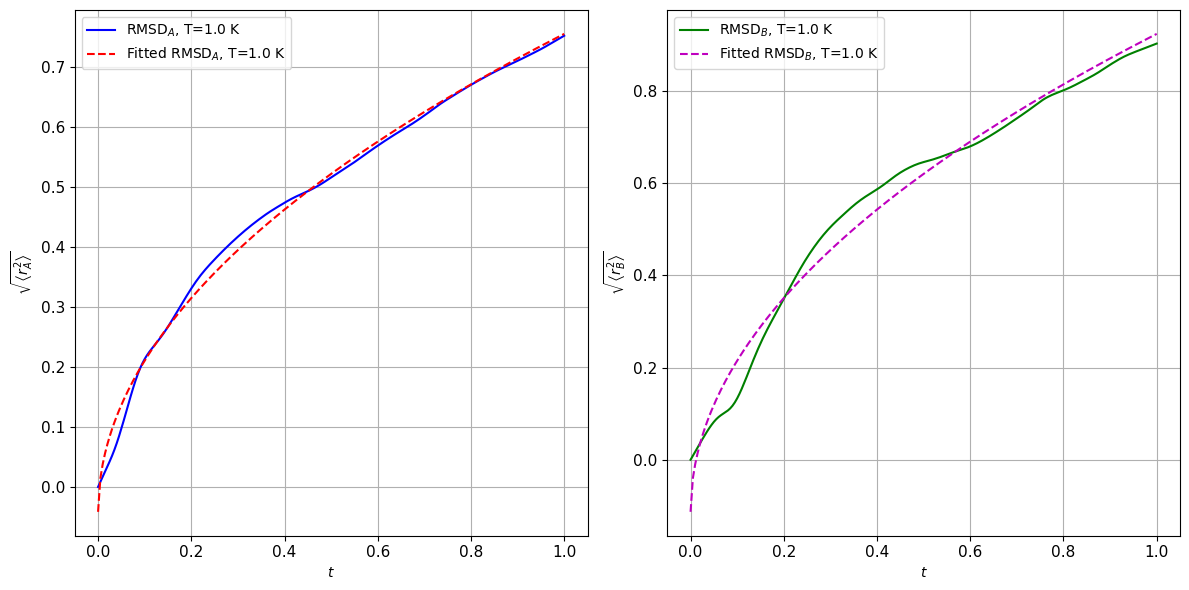

In [29]:
import scipy.optimize as opt

# Model function: we have obtained from a sqrt function, so:
def sqrt_model(t, a, b):
    return a * np.sqrt(t) + b

# Time array:
time = np.arange(len(rmsd_A)) * Deltat

# Fitting rmsd_A
popt_A, pcov_A = opt.curve_fit(sqrt_model, time, rmsd_A)

# Fitting rmsd_B
popt_B, pcov_B = opt.curve_fit(sqrt_model, time, rmsd_B)

# Optimal parameters:
a_A, b_A = popt_A
a_B, b_B = popt_B

# Adapted values
fit_A = sqrt_model(time, *popt_A)
fit_B = sqrt_model(time, *popt_B)

# Results Visualization:
plt.figure(figsize=(12, 6))

# Plot per rmsd_A
plt.subplot(1, 2, 1)
plt.plot(time, rmsd_A, 'b-', label=f'RMSD$_A$, T={temperature} K')
plt.plot(time, fit_A, 'r--', label=f'Fitted RMSD$_A$, T={temperature} K')
plt.xlabel(r'$t$')
plt.ylabel(r'$\sqrt{\left\langle r_{A}^2 \right\rangle}$')
plt.legend()
plt.grid(True)

# Plot per rmsd_B
plt.subplot(1, 2, 2)
plt.plot(time, rmsd_B, 'g-', label=f'RMSD$_B$, T={temperature} K')
plt.plot(time, fit_B, 'm--', label=f'Fitted RMSD$_B$, T={temperature} K')
plt.xlabel(r'$t$')
plt.ylabel(r'$\sqrt{\left\langle r_{B}^2 \right\rangle}$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

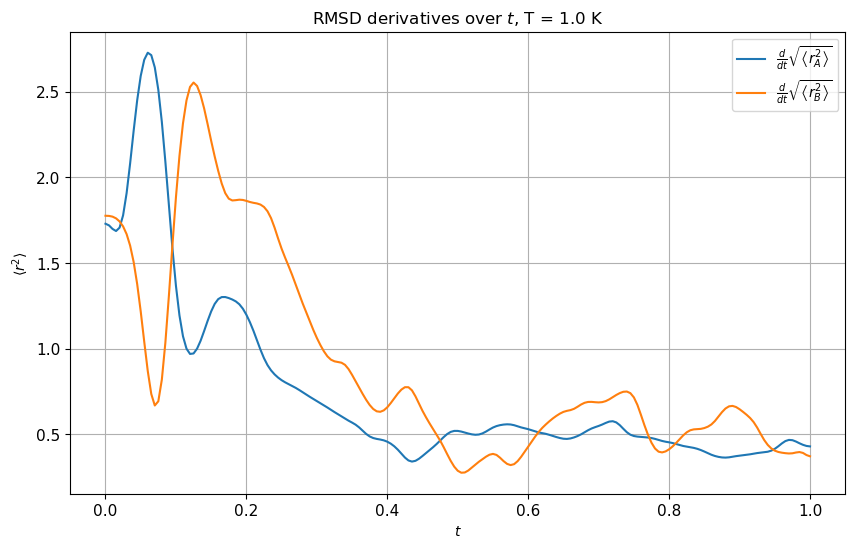

In [30]:
def calculate_derivatives(rmsd_A, rmsd_B, Deltat):
    # Unidimensional array representing time with the same length as rmsd arrays
    time = np.arange(len(rmsd_A)) * Deltat
    
    # Calculation of the RMSD derivative for both types of atoms
    # Numerical derivative of the rmsd over time:
    rmsd_A_derivative = np.gradient(rmsd_A, time)
    rmsd_B_derivative = np.gradient(rmsd_B, time)
    
    return rmsd_A_derivative, rmsd_B_derivative

rmsd_A_derivative, rmsd_B_derivative = calculate_derivatives(rmsd_A, rmsd_B, Deltat)

# Plotting RMSD derivatives:
plt.figure(figsize=(10, 6))
plt.plot(t, rmsd_A_derivative, label=r'$\frac{d}{dt}\sqrt{\left\langle r_{A}^2 \right\rangle}$')
plt.plot(t, rmsd_B_derivative, label=r'$\frac{d}{dt}\sqrt{\left\langle r_{B}^2 \right\rangle}$')

    
plt.xlabel(r'$t$')
plt.ylabel(r'$\left\langle r^2 \right\rangle$')
plt.legend()
plt.title(f'RMSD derivatives over $t$, T = {temperature} K')
plt.grid(True)
plt.show()

In [31]:
def find_a0(rmsd_A, rmsd_B, Deltat, threshold):
    # Unidimensional array representing time
    time = np.arange(len(rmsd_A)) * Deltat
    
    # Calculation of the RMSD derivative for both types of atoms
    # Numerical derivative of the rmsd over time:
    rmsd_A_derivative = np.gradient(rmsd_A, time)
    rmsd_B_derivative = np.gradient(rmsd_B, time)
    
    # Iteration through the derivative values to find the plateau
    for i in range(3, len(rmsd_A_derivative)):
        if (abs(rmsd_A_derivative[i] - rmsd_A_derivative[i-2]) < threshold and 
            abs(rmsd_B_derivative[i] - rmsd_B_derivative[i-2]) < threshold):
            # If derivative is sufficiently low,  return the RMSD value corresponding to the plateau
            return (rmsd_A[i] + rmsd_B[i]) / 2  # Average value of rmsd_A and rmsd_B
    
    # If no plateau has been found, return None
    return None

a_0 is approximately 0.026101996010257755


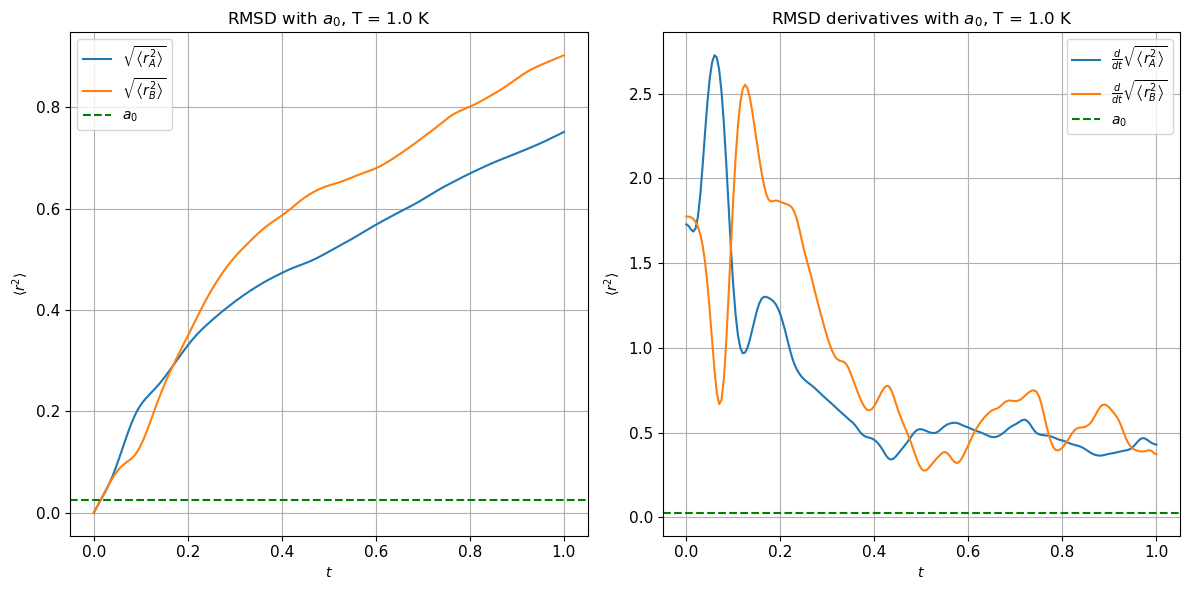

In [32]:
# Set a threshold for detecting a0:
threshold = 0.05

# Find a_0
a0 = find_a0(rmsd_A, rmsd_B, Deltat, threshold)

if a0 is not None:
    print(f"a_0 is approximately {a0}")
else:
    print("a_0 not found within the given range.")

# Results Visualization:
plt.figure(figsize=(12, 6))

# Plot per RMSD:
plt.subplot(1, 2, 1)
plt.plot(t, rmsd_A, label=r'$\sqrt{\left\langle r_{A}^2 \right\rangle}$')
plt.plot(t, rmsd_B, label=r'$\sqrt{\left\langle r_{B}^2 \right\rangle}$')
# Highlights a_0
if a0 is not None:
    plt.axhline(y=a0, color='green', linestyle='--', label=f'$a_0 \approx {a0: .2f}$')   
plt.xlabel(r'$t$')
plt.ylabel(r'$\left\langle r^2 \right\rangle$')
plt.legend()
plt.grid(True)
plt.title(f'RMSD with $a_0$, T = {temperature} K')

# Plot per dRMSD/dt:
plt.subplot(1, 2, 2)
plt.plot(t, rmsd_A_derivative, label=r'$\frac{d}{dt}\sqrt{\left\langle r_{A}^2 \right\rangle}$')
plt.plot(t, rmsd_B_derivative, label=r'$\frac{d}{dt}\sqrt{\left\langle r_{B}^2 \right\rangle}$')
# Highlights a_0
if a0 is not None:
    plt.axhline(y=a0, color='green', linestyle='--', label=f'$a_0 \approx {a0: .2f}$')  
plt.xlabel(r'$t$')
plt.ylabel(r'$\left\langle r^2 \right\rangle$')
plt.legend()
plt.title(f'RMSD derivatives with $a_0$, T = {temperature} K')
plt.grid(True)

plt.tight_layout()
plt.show()


**___________________________________________________________________________________________________________________________**

## <span style="color: green"> Mean Square Displacement with LAMMPS simulation </span>

### <span style="color: green"> Script LAMMPS (simulation until $t=5,0$)</span>

```
#KALJ NVE, determine msd (linear in time, here every time step) 

atom_style atomic 
boundary p p p #periodic boundary cond. in each direction 

# read data file (incl.mass info) 
read_data configurazione_iniziale_Python_NVE_T05eq.data                 

# Define interaction potential. 
pair_style lj/cut 2.5                                       
pair_coeff 1 1 1.0 1.0 2.5 # type type eps sigma rcut 
pair_coeff 1 2 1.5 0.80 2.0 #typeA typeB epsAB sigmaAB rcutAB=2.5*0.8=2.0 
pair_coeff 2 2 0.5 0.88 2.2 #typeB typeB epsBB sigmaBB rcutBB=2.5*0.88=2.2 

timestep 0.005 #Delta t 
neighbor 0.3 bin 
neigh_modify every 1 delay 0 check yes          # Update neighbor 

thermo_style custom step temp pe ke etotal 
thermo 2 #print every 2 MDsteps 

group A type 1 
group B type 2 

compute msdA A msd                                      #default com=no and average=no so rvec(t=0) used 
fix msdAfix A ave/time 1 1 1 c_msdA[4] file msdA.data 
compute msdB B msd                                      #default com=no and average=no so rvec(t=0) used 
fix msdBfix B ave/time 1 1 1 c_msdB[4] file msdB.data 

# set numerical integrator 
fix nve1 all nve # NVE; default is velocity verlet 

run 1000
```

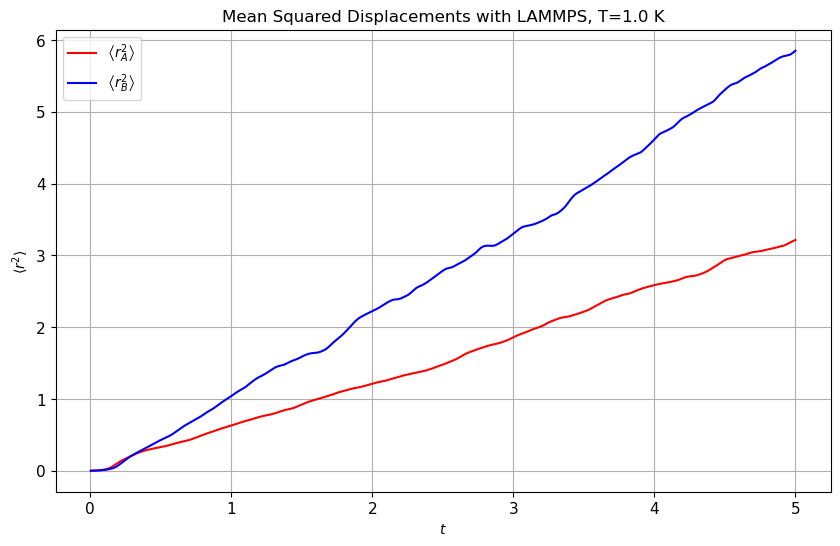

In [33]:
# Data loading
msdA_data = np.loadtxt('msdA.data', skiprows=3)
msdB_data = np.loadtxt('msdB.data', skiprows=3)

# Columns extraction
timesteps = msdA_data[:, 0]
msd_A = msdA_data[:, 1]
msd_B = msdB_data[:, 1]

# Conversion with Deltat = 0.005
time = timesteps * Deltat  

# Plot of msd:
plt.figure(figsize=(10, 6))
plt.plot(time, msd_A, label=r'$\left\langle r_{A}^2 \right\rangle$', color='red')
plt.plot(time, msd_B, label=r'$\left\langle r_{B}^2 \right\rangle$', color='blue')
plt.xlabel('$t$')
plt.ylabel(r'$\left\langle r^2 \right\rangle$')
plt.title(f'Mean Squared Displacements with LAMMPS, T={temperature} K')
plt.legend()

plt.grid(True)
plt.show()

## <span style="color: green"> Logarithmic plot </span>

When running long simulations that require about $10^7$ time steps, it becomes essential to save the data logarithmically with respect to time. This can be achieved by using the `logfreq3` function, which allows you to define the print times (`tmsd`) with the `variable` command, and to use the `thermo_style` and `thermo` commands to save the Mean Square Displacement (MSD) along with other time-dependent scalar quantities in the output file.

In detail, the previous `fix ave/time` commands are replaced by:
```
variable tmsd equal logfreq3(1,200,10000000)
variable tLJ equal step*dt
thermo_style custom v_tLJ c_msdA[4] c_msdB[4] pe etotal
thermo v_tmsd

```

Here, the variable `tLJ` is defined to print time in Lennard-Jones (LJ) units instead of simple time steps.

Another approach to get logarithmic information over time is to print all unwrapped particle positions during the LAMMPS simulation. This can be done with the commands:
```
variable tmsd equal logfreq3(1,200,10000000)
dump msddump all custom 5000 posudump.*.data id xu yu zu
dump_modify msddump sort id every v_tmsd

```

These commands save the data in files named `posudump*`, which will be analyzed later in the notebook.

```
#KALJ NVE, determine msd (logarithmic in time) 

atom_style atomic 
boundary p p p #periodic boundary cond. in each direction 

read_data configurazione_iniziale_Python_NVE_T05eq.data # read data file (incl.mass info) 
pair_style lj/cut 2.5 # Define interaction potential. 
pair_coeff 1 1 1.0 1.0 2.5 # type type eps sigma rcut 
pair_coeff 1 2 1.5 0.80 2.0 #typeA typeB epsAB sigmaAB rcutAB=2.5*0.8=2.0 
pair_coeff 2 2 0.5 0.88 2.2 #typeB typeB epsBB sigmaBB rcutBB=2.5*0.88=2.2 

timestep 0.005 #Delta t 
neighbor 0.3 bin 
neigh_modify every 1 delay 0 check yes # Update neighbor 

group A type 1 
group B type 2 

compute msdA A msd #default com=no and average=no so rvec(t=0) used 
compute msdB B msd #default com=no and average=no so rvec(t=0) used 

variable tmsd equal logfreq3(1,200,10000000) 
variable tLJ equal step*dt 
thermo_style custom v_tLJ c_msdA[4] c_msdB[4] pe etotal 
thermo v_tmsd # set numerical integrator 

fix nve1 all nve # NVE; default is velocity verlet 
run 10000000
```

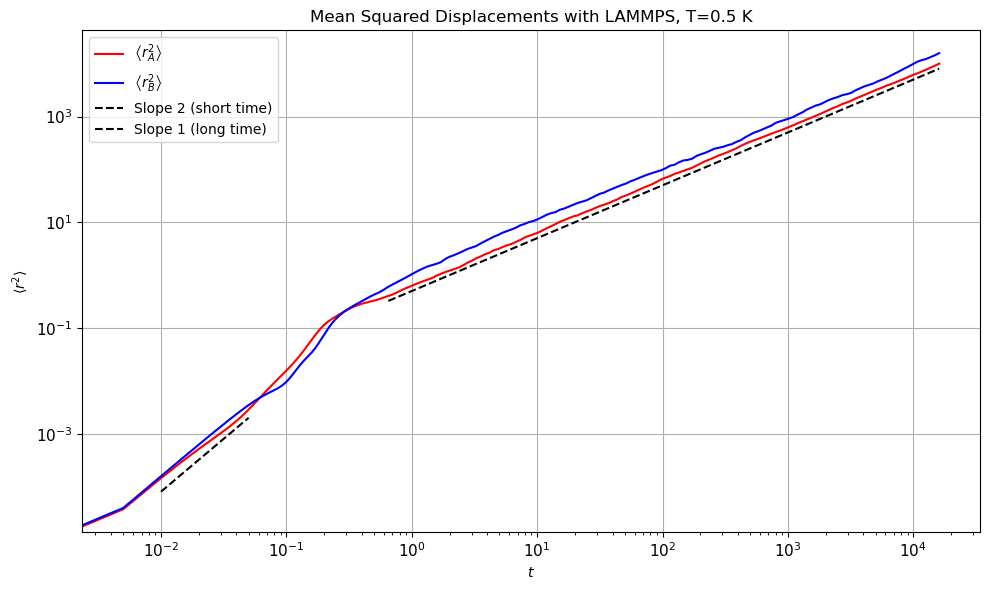

In [34]:
# Data loading
msd_log = np.loadtxt('file_plot_log_t_1E4.txt', skiprows=1)

# Columns extraction
time = msd_log[:, 0]
msd_A = msd_log[:, 1]
msd_B = msd_log[:, 2]

# Plot of log msd:
plt.figure(figsize=(10, 6))
plt.loglog(time, msd_A, label=r'$\left\langle r_{A}^2 \right\rangle$', color='red')
plt.loglog(time, msd_B, label=r'$\left\langle r_{B}^2 \right\rangle$', color='blue')

# Adding the dashed lines:
# Line with slope 2
t_short = np.linspace(0.01, 0.05, 100)
plt.loglog(t_short, 0.8 * t_short**2, '--', label='Slope 2 (short time)', color='black')

# Line with slope 1
t_long = np.linspace(0.65, time[-1], 100)
plt.loglog(t_long, 0.5 * t_long, '--', label='Slope 1 (long time)', color='black')

plt.xlabel('$t$')
plt.ylabel(r'$\left\langle r^2 \right\rangle$')
plt.title(f'Mean Squared Displacements with LAMMPS, T=0.5 K')
plt.legend()

plt.grid(True)

plt.tight_layout()
plt.show()

# Looking for some dependence over time $t$

The figure above shows $\left\langle r_{A}^2 \right\rangle$ and $\left\langle r_{B}^2 \right\rangle$ obtained with
*thermo_style* as specified in the input code.

For very short times $t$ , we can approximate the position of atom $i$ at time $t$ :

\begin{equation}
\mathbf{r}_i(t) =\mathbf{r}_i(0) + \mathbf{v_i}(0) t
\end{equation}

and write the equation for small $t$ as

\begin{equation}
\left\langle r_{\alpha}^2 \right\rangle = \frac{1}{N_\alpha} \sum_{i=1}^{N_\alpha} |\mathbf{v_i}(0)t|^2 = Ct^2,  \alpha \in (A,B)
\end{equation} 


We see that $ ln(\left\langle r_{\alpha}^2 \right\rangle)= lnC + 2 ln t$, corresponding to a line with slope 2 as indicated by the dashed line at short times in the figure above.

For intermediate times $\left\langle r_{\alpha}^2 \right\rangle$  reaches a plateau. This plateau is typical for **glass formers** at high enough density
at which each particle is **trapped in a cage** formed by its neighboring particles. The smaller B particles reach a higher plateau.

For long enough times each particle escapes its cage of neighbors and therefore $\left\langle r_{\alpha}^2 \right\rangle$ increases.

At very large times the dynamics of many successive escape events can be modeled as a **random walk**. For a random walk in $d$ dimensions of step size $a$ and an equal probability to step right or left, we have after $N_{step}$ steps:

\begin{equation}
\left\langle (\Delta \mathbf{r})^2 \right\rangle = da^2N_{step}
\end{equation}
This equation implies that $\left\langle r_{\alpha}^2 \right\rangle \propto t$ and therefore a loglog plot yields a line of slope 1 as indicated by a blue
dashed line at long times in the figure above.

**_________________________________________________________________________________________________________________________**

### Root Mean Squared Displacement with LAMMPS data

Which LAMMPS simulation data to use?

Of the two time window options available to us (up to $t=5$ and up to $t=10^4$), we will use the second one, with the simulation up to $t=10^4$ time steps. This choice is probably the best for our purpose, since it provides us with data over a much longer time interval. This is especially useful if we want to clearly identify the plateau in the RMSD and determine $a_0$.

The longer simulation will allow us to observe the evolution of the MSD on larger time scales, which is crucial to identify the stage at which the particles reach a "locked" (or nearly locked) dynamics. This is the stage at which the MSD stops growing rapidly and flattens out, suggesting that the particles are confined within a limited spatial region.

#### Next steps to calculate RMSD and identify $a_0$

1. Calculate RMSD: since we have already calculated the MSD, we can simply calculate the RMSD as the square root of the MSD.
2. Identify the plateau and calculate $a_0$ : to identify the plateau, we will analyze the derivative of the RMSD function with respect to time (as done previously with the data from the Python simulation).
3. Plot of RMSD and its derivative: displaying both the RMSD and its derivative will help us visually confirm the plateau and the calculation of $a_0$.
4. Implementation of $Q(t)$ and $\chi_4(t)$: once we have $a_0$ , we will proceed to calculate $Q(t)$ using the function we have already developed earlier in the notebook. After that, we will use $Q(t)$ to calculate $\chi_4(t)$ as discussed earlier.

The value of $a_0$ for LAMMPS data is 0.0887056705497059


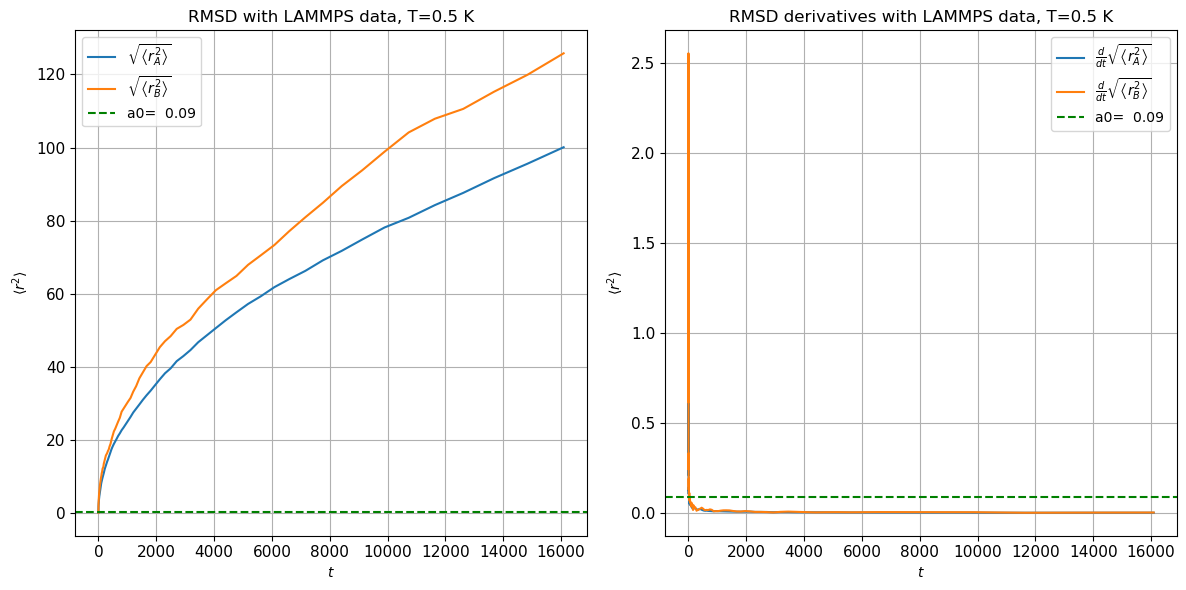

In [35]:
# I step:
# Data loading
msd_log = np.loadtxt('file_plot_log_t_1E4.txt', skiprows=1)
# Columns extraction
t = msd_log[:, 0]
msd_A = msd_log[:, 1]
msd_B = msd_log[:, 2]

# Calculate rmsd
rmsd_A_lammps = np.sqrt(msd_A)
rmsd_B_lammps = np.sqrt(msd_B)


# II step:
# Compute numerical derivative of the rmsd over time
rmsd_A_derivative_lammps = np.gradient(rmsd_A_lammps, time)
rmsd_B_derivative_lammps = np.gradient(rmsd_B_lammps, time)

# Find a0 with the function find_a0:
threshold = 0.05  
a0_lammps = find_a0(rmsd_A_lammps, rmsd_B_lammps, Deltat, threshold)
print(f'The value of $a_0$ for LAMMPS data is {a0_lammps}')

# III step
# Plotting RMSD and dRMSD/dt: 
# Results Visualization:
plt.figure(figsize=(12, 6))

# Plot per RMSD:
plt.subplot(1, 2, 1)
plt.plot(t, rmsd_A_lammps, label=r'$\sqrt{\left\langle r_{A}^2 \right\rangle}$')
plt.plot(t, rmsd_B_lammps, label=r'$\sqrt{\left\langle r_{B}^2 \right\rangle}$')
# Highlights a_0
if a0 is not None:
    plt.axhline(y=a0_lammps, color='green', linestyle='--', label=f'a0= {a0_lammps: .2f}')   
plt.xlabel(r'$t$')
plt.ylabel(r'$\left\langle r^2 \right\rangle$')
plt.legend()
plt.grid(True)
plt.title('RMSD with LAMMPS data, T=0.5 K')

# Plot per dRMSD/dt:
plt.subplot(1, 2, 2)
plt.plot(t, rmsd_A_derivative_lammps, label=r'$\frac{d}{dt}\sqrt{\left\langle r_{A}^2 \right\rangle}$')
plt.plot(t, rmsd_B_derivative_lammps, label=r'$\frac{d}{dt}\sqrt{\left\langle r_{B}^2 \right\rangle}$')
# Highlights a_0
if a0 is not None:
    plt.axhline(y=a0_lammps, color='green', linestyle='--', label=f'a0= {a0_lammps: .2f}')  
plt.xlabel(r'$t$')
plt.ylabel(r'$\left\langle r^2 \right\rangle$')
plt.legend()
plt.title('RMSD derivatives with LAMMPS data, T=0.5 K')
plt.grid(True)

plt.tight_layout()
plt.show()

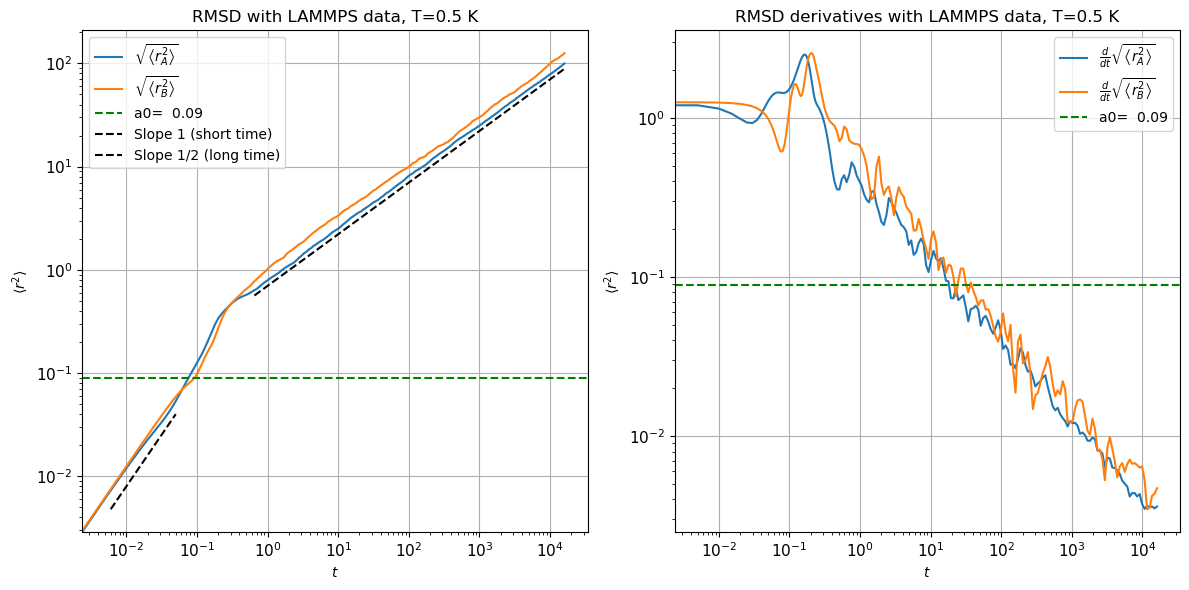

In [36]:
################ Logarithm plots ###########

# Plotting RMSD and dRMSD/dt: 

plt.figure(figsize=(12, 6))
# Plot per RMSD:
plt.subplot(1, 2, 1)
plt.loglog(t, rmsd_A_lammps, label=r'$\sqrt{\left\langle r_{A}^2 \right\rangle}$')
plt.loglog(t, rmsd_B_lammps, label=r'$\sqrt{\left\langle r_{B}^2 \right\rangle}$')
# Highlights a_0
if a0 is not None:
    plt.axhline(y=a0_lammps, color='green', linestyle='--', label=f'a0= {a0_lammps: .2f}')   
plt.xlabel(r'$t$')
plt.ylabel(r'$\left\langle r^2 \right\rangle$')

# Adding the dashed lines (now for short time the slope is 1, for long times 0.5)
# Line with slope 1
t_short = np.linspace(0.006, 0.05, 100)
plt.loglog(t_short, 0.8 * t_short**1, '--', label='Slope 1 (short time)', color='black')

# Line with slope 0.5
t_long = np.linspace(0.65, t[-1], 100)
plt.loglog(t_long, 0.7 * t_long**0.5, '--', label='Slope 1/2 (long time)', color='black')

plt.legend()
plt.grid(True)
plt.title('RMSD with LAMMPS data, T=0.5 K')

# Plot per dRMSD/dt:
plt.subplot(1, 2, 2)
plt.loglog(t, rmsd_A_derivative_lammps, label=r'$\frac{d}{dt}\sqrt{\left\langle r_{A}^2 \right\rangle}$')
plt.loglog(t, rmsd_B_derivative_lammps, label=r'$\frac{d}{dt}\sqrt{\left\langle r_{B}^2 \right\rangle}$')
# Highlights a_0
if a0 is not None:
    plt.axhline(y=a0_lammps, color='green', linestyle='--', label=f'a0= {a0_lammps: .2f}')  
plt.xlabel(r'$t$')
plt.ylabel(r'$\left\langle r^2 \right\rangle$')
plt.legend()
plt.title('RMSD derivatives with LAMMPS data, T=0.5 K')
plt.grid(True)

plt.tight_layout()
plt.show()

**___________________________________________________________________________________________________________________________**

# <span style="color: red"> Diffusion Coefficient Calculation </span>

**Calculating the diffusion coefficient**

For a free diffusion process in a homogeneous medium, the diffusion coefficient 𝐷
is related to the MSD by the relation:
\begin{equation}
D_d = \frac{1}{2d}\lim_{t\rightarrow \infty} \frac{d}{dt} MSD(t)
\end{equation}

Therefore, the diffusion coefficient can be calculated directly from the slope of the MSD versus time curve.

In [37]:
def calculate_diffusion_coefficient(time, msd, dimensionality):
    """
    Calculate the diffusion coefficient based on the msd of the atoms and the dimensionality considerated, 
    d=3 for our experiment
    Input:
    - time t
    - Mean Squared Displament 
    - Dimensionality considerated

    Returns:
    - D: diffusion coefficient
    """
    # Numerical derivative of the msd over time
    msd_derivative = np.gradient(msd, time)
    
    # For long times, it takes the average of the derivative of the msd
    D = np.mean(msd_derivative[-len(time)//4:]) / (2 * dimensionality)
    
    return D

In [38]:
# Using the data of the cells above, conversion in Numpy arrays
time = np.array(time)    # Times Numpy array
msd_A = np.array(msd_A)  # MSD Numpy array for particles A
msd_B = np.array(msd_B)  # MSD Numpy array for particles B
d = 3  # Dimensionality

D_A = calculate_diffusion_coefficient(time, msd_A, d)
print(f"The diffusion coefficient for the particles of type A is: {D_A}")

D_B = calculate_diffusion_coefficient(time, msd_B, d)
print(f"The diffusion coefficient for the particles of type B is: {D_B}")

The diffusion coefficient for the particles of type A is: 0.10392522181926057
The diffusion coefficient for the particles of type B is: 0.16073583199555977


## Interpretation of obtained results for $D$

The values of the diffusion coefficients that we obtained for the $A$ and $B$ particles in our Kob-Andersen Lennard-Jones (LJ) system are $\mathbf{D_A=0.103925}$ and $\mathbf{D_B=0.1607}$, respectively. We remember that these values have been obtained using `nMD=200` as number of timesteps of the Python simulation.
These values provide important information about the dynamic behavior of the two species of particles in the system.

1. **Interpretation of the Diffusion Coefficients**

We obtained a slower diffusion for $A$ particles: the diffusion coefficient for the $A$ particles is lower than that for the $B$ particles and this indicates that the $A$ particles move slower than the $B$ particles in the system.
The $B$ particles have a higher diffusion coefficient, which suggests that they are less subject to constraints or interactions that limit their motion than the $A$ particles.

2. **Comparison with Literature**
* **Kob-Andersen Model**: in the model is often used to study the dynamic and glass properties of supercooled liquids. It is known that in the Kob-Andersen model, the number of $A$ particles are generally larger and interact more strongly with each other than $B$ particles. This can lead to more packing and thus slower diffusion of $A$ particles compared to $B$ particles, consistent with our results.

* **Scaling Factor**: the exact numerical values of the diffusion coefficients depend on various factors, such as temperature, system density, and simulation time. However, the qualitative relationship between $D_A$ and $D_B$ that we found is in line with expectations for this type of system, where $A$ particles tend to move slower than $B$ particles.

**___________________________________________________________________________________________________________________________**

## Visualizing Atomic Motion

Here we compare the movements of the atoms at two different temperatures: $T = 0.41K$ and $T = 0.45K$. We chose these two temperatures because we had data dumps produced by LAMMPS of the simulations performed for the calculation of the mean squared displacement for these two temperatures. So, we decided to analyze them over time with two animations with the **VMD** software.


**Note**: there is an important consideration to make: for the animation at $T=0.41K$ logarithmic times were used (i.e. the difference between time steps going forward in time is always larger) and therefore it is not compatible with a real simulation of time (where the difference between all consecutive timestep is always $\Delta t$), but it gives us important considerations regarding the diffusion of atoms all the same.
Furthermore, the simulation for $T=0.41K$ reaches as final time $t_{final} \approx 10^4$, while for the simulation at $T=0.45K$ 1000 timesteps were used, which considering a $\Delta t = 0.005$ , corresponds to a $t_{final} = 5$. So there is a notable difference between the two animations, but let's try to capture the differences in the same way.

The following animations show the motion of the atoms over time in the two conditions.

<div style="display: flex; justify-content: center; align-items: center;">
  <div style="flex: 1; text-align: center;">
    <img src="gif_atoms/dump_T_041_all_atoms_cut.gif" alt="GIF_all_atoms_T=0.41K" style="width: 300px;"/>
    <p>Atomic Motion at T = 0.41K</p>
  </div>
  <div style="flex: 1; text-align: center;">
    <img src="gif_atoms/dump_T_045_all_atoms_cut.gif" alt="GIF_all_atoms_T=0.45K" style="width: 300px;"/>
    <p>Atomic Motion at T = 0.45K</p>
  </div>
</div>


### Comparison Between $T=0.41K$ and $T=0.45K$

At $T=0.41K$, we observe that the motion of the atoms is significantly restricted in the very early timesteps. The atoms are predominantly oscillating around their initial positions, with very few atoms diffusing over larger distances.  After a few seconds (which could correspond to a $t \approx 10^2$ and therefore much greater than the final instant of the animation at $T=0.45K$), $B$ atoms begin to diffuse more however in the part of the volume where there is a large presence of $A$ atoms.

In contrast, at $T=0.45K$, the atomic motion becomes noticeably more dynamic in the very early timesteps, indicating increased mobility and diffusion in the system. The atoms are exploring a larger volume of phase space now. 

Note, however, that in both cases we find the fact that the $B$ particles diffuse faster than the $A$ particle, as we found in the section **Interpretation of obtained results for $D$**. 

**========================================================================================================================**

**========================================================================================================================**

# <span style="color: red"> Self-Intermediate Scattering Function (SISF) </span>

**SISF** is a fundamental function for analyzing the dynamics of complex systems, especially in liquids and glasses. This function provides information about the motion of particles in time and space.

To calculate SISF, we need to analyze the motion of particles in time using the coordinates of particles at various times. In Python, we can do this by extending our Random Walk model, but it is more effective to use molecular dynamics software such as LAMMPS to obtain realistic particle trajectories.

## Computing SISF in Python
First, let's review the calculation of SISF.

The SISF, $F_{s}(\mathbf{q},t)$, for an unique atom that makes a trajectory in the space at time $t$ is defined as:


\begin{equation}
F_{s}(\mathbf{q},t) = \left\langle e^{i\mathbf{q}\cdot(\mathbf{r}(t)-\mathbf{r}(0))} \right\rangle
\end{equation}

where:
- $\mathbf{q}$ is the wave vector
- $\mathbf{r}(t)$ is the position of the particle at time $t$
- The symbol $\left\langle \cdot \right\rangle$ represents an average over the initial instants and the particles

In a simulation context, we can calculate $F_{s}(q,t)$ as follows:

1. **Python Simulation**: We use the simulation model to generate particle trajectories.
2. **SISF calculation**: We use the generated trajectories to calculate the SISF.

Since we have a molecular system of $N=1000$ atoms with two types of particles, $N_A=800$ and $N_B=200$, we will have to consider the separate contributions of each type of particle or analyze the total SISF function by combining the contributions of both species.

1. **Calculation of the separate SISF function for the two types of atoms** 
    * For atoms $A$: 
    \begin{equation} F_s^A(\mathbf{q},t) = \sum_{i=1}^{N_A} \left\langle e^{i\mathbf{q}\cdot(\mathbf{r}_i^A(t)-\mathbf{r }_i^A(0))} \right\rangle 
    \end{equation} 
    * For $B$ atoms: 
    \begin{equation} F_s^B(\mathbf{q},t) = \sum_{j=1}^{N_B} \left\langle e^{i\mathbf{q}\cdot(\mathbf{r}_j^B(t)-\mathbf{r}_j^B(0))} \right\rangle 
    \end{equation} 
    here $\mathbf{r}_i^A(t)$ and $\mathbf{r}_j^B(t)$ are the positions of atom $i$ of type $A$ and atom $j$ of type $B$ at time $t$.

2. **Combination of results**
    * Total SISF:
    we can obtain the total SISF of the system by combining the partial functions of the two species:
    \begin{equation}
    F_s(\mathbf{q},t) = \frac{N_A}{N_A+N_B}F_s^A(\mathbf{q},t) + \frac{N_B}{N_A+N_B}F_s^B(\mathbf{q},t)
    \end{equation}
    This will give us a weighted average of the contributions of the two species.

3. **Specific steps for the calculation:**
    1. Simulation of the System: We will use the Python simulation of molecular dynamics to obtain the trajectories of the particles $\mathbf{r}_i^A(t)$ and $\mathbf{r}_j^B(t)$ over time.
    2. Choice of the Wave Vector $\mathbf{q}$: We need to determine the value of $\mathbf{q}$ appropriate for our system. From various references and scientific papers regarding simulation techniques of the Kob-Andersen LJ model, we choose $\mathbf{q}$ corresponding to the main peak of the radial distribution function $g(r)$.
    3. Calculation of the SISF for each Species: For each type of atom ($A$ and $B$), we use the trajectories obtained from the simulation to calculate the SISF.
    4. Analysis of the Relaxation Regime $\beta$: we will analyze the obtained SISF to identify the relaxation regime $\beta$ , comparing it with the predictions of the *Mode-Coupling Theory*.

4. **Interpretation of the results:**
    * Comparison between the two species:
We will compare the results of $F_s^A(\mathbf{q},t)$ and $F_s^B(\mathbf{q},t)$ to see if there are significant differences in the dynamic behavior of the two species.
    * Total SISF:
We will evaluate whether the total SISF correctly reflects the dynamics of the system and how it relates to the MCT theory.

### Choice of the Wave Vector 𝐪 
To choose the wave vector $\mathbf{q}$ for the Self-Intermediate Scattering Function (SISF) calculation, it is recommended to take into account the main peak of the radial distribution function $g(r)$. In practice, the value of $\mathbf{q}$ should correspond to the position of the first significant maximum of $g(r)$, since this represents the average distance between particles in local structures (such as nearest neighbors).

Details:
* $g_{AA}(r)$: describes the radial distribution between particles of type $A$. The first peak in $g_{AA}(r)$ represents the average distance between two particles of type $A$.

* $g_{BB}(r)$: similarly, this function represents the radial distribution between particles of type $B$.

* $g_{AB}(r)$: this radial distribution function represents the average distances between particles of type $A$ and $B$.

**Peak Choice**:

Usually, to calculate the wave vector $\mathbf{q}$, we take into account the first peak of $g_{AA}(r)$ or $g_{BB}(r)$, because these represent the average distance between particles of the same type. As written in the paper by Kob and Andersen [1], "The value of $\mathbf{q}$ is $\mathbf{q_{max}}$, the location of the first maximum
in the structure factor $S_{AA}(\mathbf{q})$ for the $AA$ correlation function."

In the cell code below, we are re-plotting the radial distribution functions just to see where are located the maximum for the three curves.

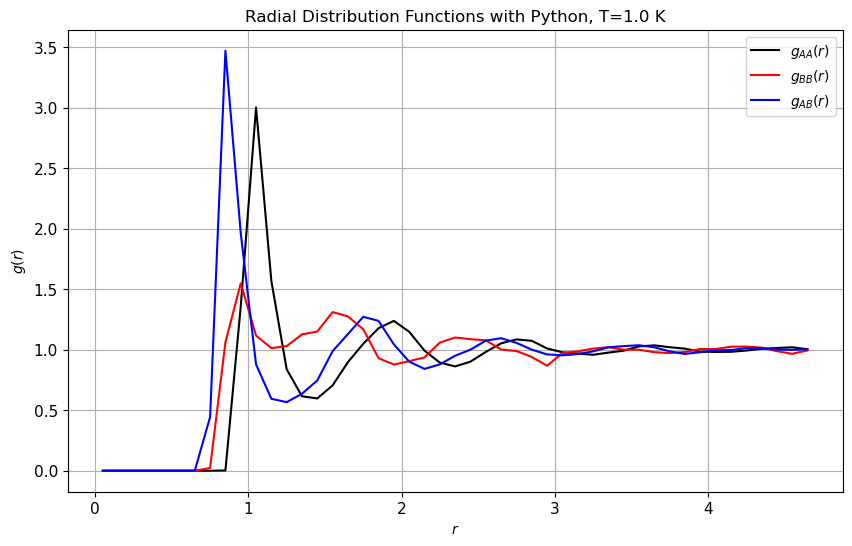

In [39]:
# Loading and plot of the data:
data = np.loadtxt('gofrAABBAB_NVE.data')
r = data[:, 0]
g_AA = data[:, 1]
g_BB = data[:, 2]
g_AB = data[:, 3]

plt.figure(figsize=(10, 6))
plt.plot(r, g_AA, label='$g_{AA}(r)$', color='black')
plt.plot(r, g_BB, label='$g_{BB}(r)$', color='red')
plt.plot(r, g_AB, label='$g_{AB}(r)$', color='blue')
plt.xlabel('$r$')
plt.ylabel('$g(r)$')

    
plt.title(f'Radial Distribution Functions with Python, T={temperature} K')
plt.legend()



plt.grid(True)
plt.show()

In [40]:
# Let's find the peaks for the g(r)
def find_peaks(data):
    # Extract columns from data
    r = data[:, 0]
    gAA = data[:, 1]
    gBB = data[:, 2]
    gAB = data[:, 3]
    
    # Through 'argmax' we can find the positions r of the peaks:
    r_max_gAA = r[np.argmax(gAA)]
    r_max_gBB = r[np.argmax(gBB)]
    r_max_gAB = r[np.argmax(gAB)]
    
    return r_max_gAA, r_max_gBB, r_max_gAB

r_max_gAA, r_max_gBB, r_max_gAB = find_peaks(data)
print(f"The peak for gAA(r) function is at r = {r_max_gAA}")
print(f"The peak for gBB(r) function is at r = {r_max_gBB}")
print(f"The peak for gAB(r) function is at r = {r_max_gAB}")

The peak for gAA(r) function is at r = 1.05
The peak for gBB(r) function is at r = 0.9500000000000001
The peak for gAB(r) function is at r = 0.8500000000000001


We will proceed in this way:
1. To analyze the particles A and B separately, that is, to calculate the Self-Intermediate Scattering Function separately for the two species of atoms, it is better to use the respective peaks $q_{max}$ of $g_{AA}(r)$ and $g_{BB}(r)$.
2. Subsequently, we will try to conduct a more general analysis, considering the peak of $g_{AB}(r)$ , which represents the interactions between the two types of particles.

Calculation of the three wave vectors:
We will calculate in the following code cells the modulus of the wave vector $\mathbf{q}$ needed to calculate the $F_s(\mathbf{q},t)$.

The module can be obtained thanks to the formula:
\begin{equation}
q = \frac{2 \pi}{r}
\end{equation}

therefore we will obtain three different quantities:
\begin{equation}
q_{AA} = \frac{2\pi}{r_{max,AA}}, \quad q_{BB} = \frac{2\pi}{r_{max,BB}}, \quad q_{AB} = \frac{2\pi}{r_{max,AB}}
\end{equation}

In [41]:
# Calculate wave lengths modulus:
q_AA = 2*pi/r_max_gAA
q_BB = 2*pi/r_max_gBB
q_AB = 2*pi/r_max_gAB

# Print modulus:
print(f"The value of qAA modulus is {q_AA}")
print(f"The value of qBB modulus is {q_BB}")
print(f"The value of qAB modulus is {q_AB}")

The value of qAA modulus is 5.983986006837701
The value of qBB modulus is 6.613879270715353
The value of qAB modulus is 7.3919827143289245


In [42]:
# 1. Calculation of the separate SISF function for the two types of atoms
def calculate_sisf(positions, q):
    # Ricorda: 'positions' è un array Numpy con dimensioni : (n_steps, n_particles, 3)
    n_particles = positions.shape[1]  # Numero di particelle
    n_steps     = positions.shape[0]  # Numero di passi temporali
    
    sisf = np.zeros(n_steps, dtype=np.complex128)
    
    for t in range(n_steps):
        # Calcolo della SISF per il tempo t
        sisf[t] = np.mean([
            np.exp(1j * q * np.linalg.norm(positions[t, i] - positions[0, i]))
            for i in range(n_particles)
        ])
    
    return np.real(sisf) 

# SISF computed with different wave vector for each type of atom: q_AA for SISF_A, q_BB for SISF_B
sisf_A_diff = calculate_sisf(positions_A, q_AA)
sisf_B_diff = calculate_sisf(positions_B, q_BB)

# SISF computed with same wave vector for each type of atom (q_AB)
sisf_A_same = calculate_sisf(positions_A, q_AB)
sisf_B_same = calculate_sisf(positions_B, q_AB)

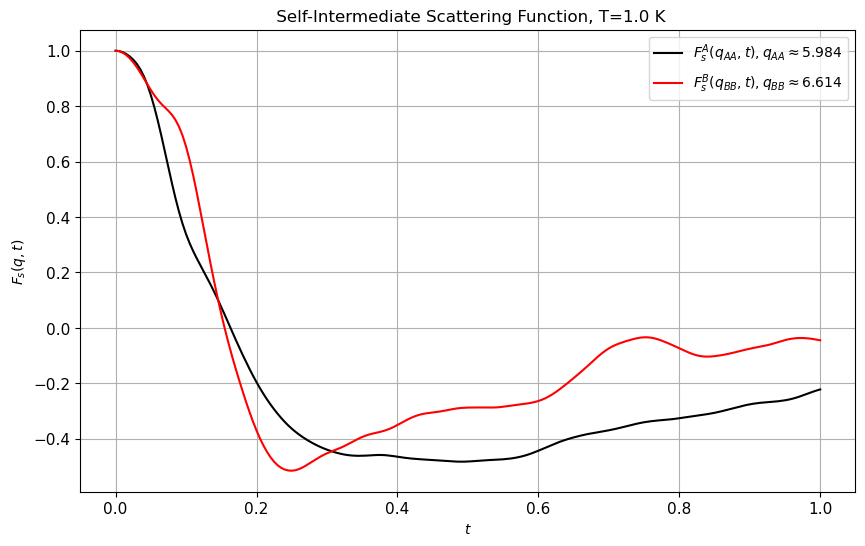

In [43]:
# Unidimensional array representing time
t = np.arange(len(sisf_A_diff)) * Deltat
#SISF Plot
plt.figure(figsize=(10, 6))
plt.plot(t, sisf_A_diff, label=rf'$F_s^A(q_{{AA}},t), q_{{AA}}\approx {q_AA:.3f}$', color='black')
plt.plot(t, sisf_B_diff, label=rf'$F_s^B(q_{{BB}},t), q_{{BB}}\approx {q_BB:.3f}$', color='red')

plt.xlabel('$t$')
plt.ylabel('$F_s(q,t)$')
plt.title(f' Self-Intermediate Scattering Function, T={temperature} K')
plt.legend()

plt.grid(True)
plt.show()

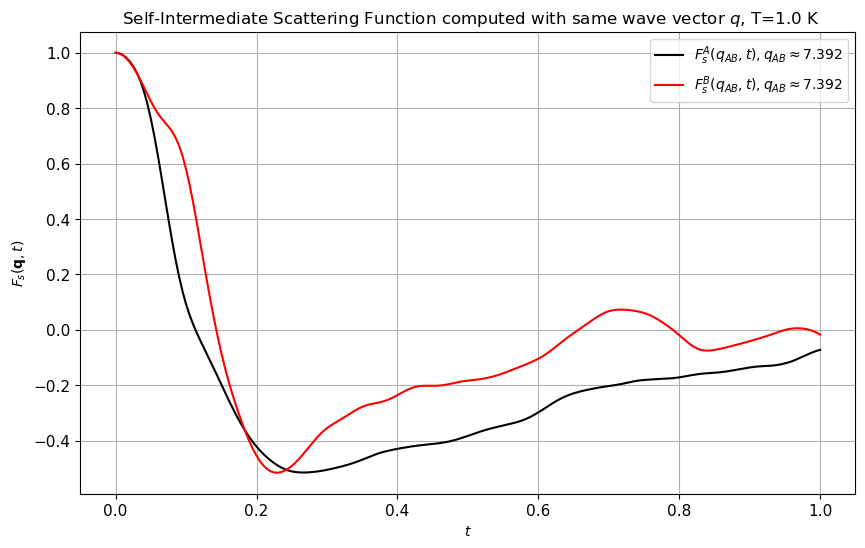

In [44]:
# with same wave vector : q_AB
#SISF Plot
plt.figure(figsize=(10, 6))
plt.plot(t, sisf_A_same, label=rf'$F_s^A(q_{{AB}},t), q_{{AB}}\approx {q_AB:.3f}$', color='black')
plt.plot(t, sisf_B_same, label=rf'$F_s^B(q_{{AB}},t), q_{{AB}}\approx {q_AB:.3f}$', color='red')

plt.xlabel('$t$')
plt.ylabel('$F_s(\mathbf{q},t)$')
plt.title(f' Self-Intermediate Scattering Function computed with same wave vector $q$, T={temperature} K')
plt.legend()

plt.grid(True)
plt.show()

## Logarithmic Plot of the Python Simulation

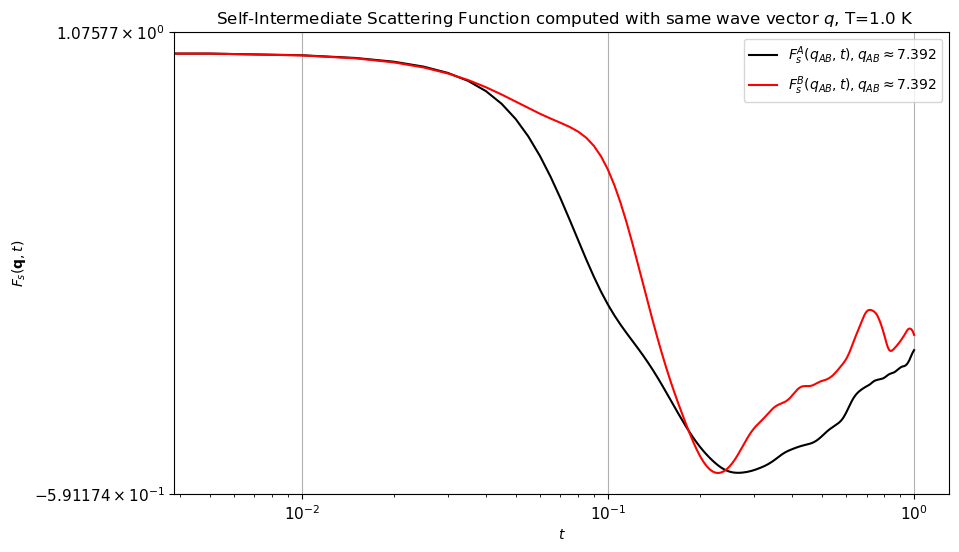

In [45]:
# with same wave vector : q_AB
#SISF Plot
plt.figure(figsize=(10, 6))
plt.loglog(t, sisf_A_same, label=rf'$F_s^A(q_{{AB}},t), q_{{AB}}\approx {q_AB:.3f}$', color='black')
plt.loglog(t, sisf_B_same, label=rf'$F_s^B(q_{{AB}},t), q_{{AB}}\approx {q_AB:.3f}$', color='red')

plt.xscale('log')     # logarithmic x-axis
plt.yscale('symlog')  # symmetric logarithmic y-axis --> useful for negative values and strong presence of noise

plt.xlabel('$t$')
plt.ylabel('$F_s(\mathbf{q},t)$')
plt.title(f' Self-Intermediate Scattering Function computed with same wave vector $q$, T={temperature} K')
plt.legend()

plt.grid(True)
plt.show()

### Total Self-Intermediate Scattering Function Implementation 

We can obtain the total SISF of the system by combining the partial functions of the two species:
\begin{equation}
    F_s(\mathbf{q},t) = \frac{N_A}{N_A+N_B}F_s^A(\mathbf{q},t) + \frac{N_B}{N_A+N_B}F_s^B(\mathbf{q},t)
\end{equation}
This will give us a weighted average of the contributions of the two species. In particular, we will use the functions obtained using the same wave vector for both (`q_AB`), i.e. the values of `sisf_A_same` and `sisf_B_same`.

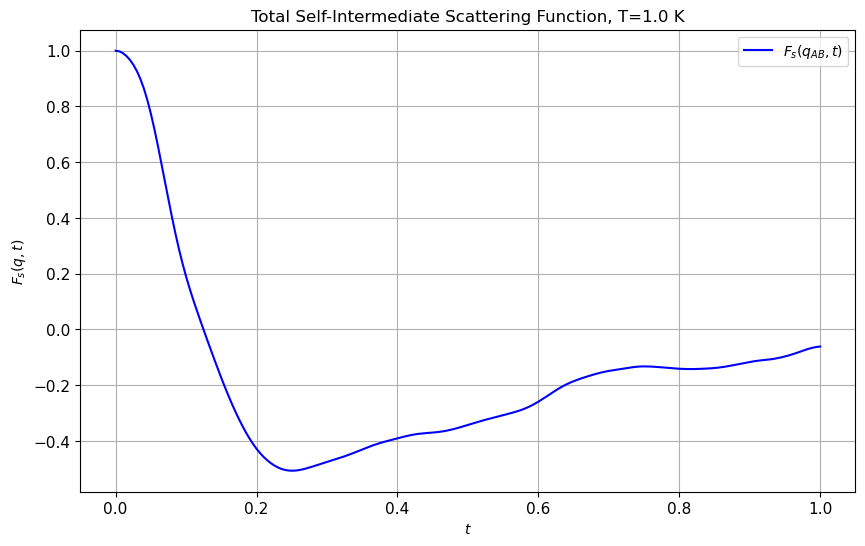

In [46]:
# Atoms number for type A and B
N_A = positions_A.shape[1]  
N_B = positions_B.shape[1]  

# Total SISF computation combining the weighted contributions of the two species:
total_sisf = (N_A / (N_A + N_B)) * sisf_A_same + (N_B / (N_A + N_B)) * sisf_B_same

# Saving in a txt file:
#np.savetxt(r"Total_SISF/total_sisf_T_30.txt", total_sisf)

# Check on shape for correctness:
#print(f"Shape of SISF Total: {total_sisf.shape}")

# Plot 
plt.figure(figsize=(10, 6))
plt.plot(t, total_sisf, label=r'$F_s(q_{AB},t)$', color='blue')

plt.xlabel('$t$')
plt.ylabel('$F_s(q,t)$')
plt.title(f'Total Self-Intermediate Scattering Function, T={temperature} K')
plt.legend()

plt.grid(True)
plt.show()


### Logarithmic plot

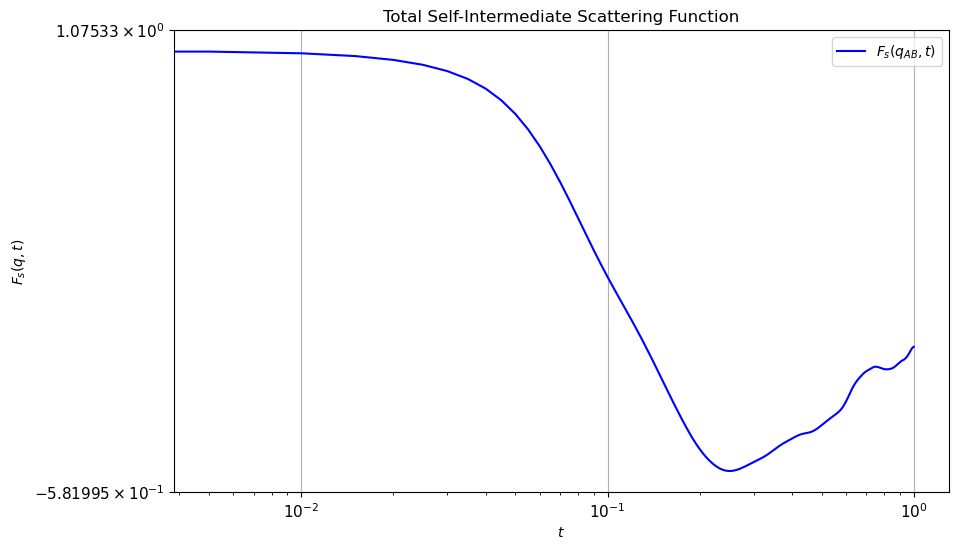

In [47]:
# Log Plot 
plt.figure(figsize=(10, 6))
plt.loglog(t, total_sisf, label=r'$F_s(q_{AB},t)$', color='blue')

plt.xlabel('$t$')
plt.ylabel('$F_s(q,t)$')
plt.title('Total Self-Intermediate Scattering Function')
plt.xscale('log')     # logarithmic x-axis
plt.yscale('symlog')  # symmetric logarithmic y-axis --> useful for negative values and strong presence of noise
plt.legend()

plt.grid(True)
plt.show()

## <span style="color: green"> Computing SISF with LAMMPS </span>

In [48]:
def read_lammps_dump(filename):
    positions = {}
    with open(filename, 'r') as file:
        while True:
            line = file.readline()
            if not line:
                break  # Fine del file

            if "ITEM: TIMESTEP" in line:
                timestep = int(file.readline().strip())
                file.readline()  # ITEM: NUMBER OF ATOMS
                num_atoms = int(file.readline().strip())
                file.readline()  # ITEM: BOX BOUNDS
                for _ in range(3):
                    file.readline()  # BOUNDS LINES
                
                file.readline()  # ITEM: ATOMS id type xu yu zu

                atom_data = []
                for _ in range(num_atoms):
                    atom_info = file.readline().strip().split()
                    atom_id = int(atom_info[0])
                    atom_type = int(atom_info[1])
                    x, y, z = map(float, atom_info[2:])
                    atom_data.append([atom_id, atom_type, x, y, z])
                
                positions[timestep] = np.array(atom_data)

    return positions

In [49]:
def calculate_sisf_LAMMPS(positions, q):
    timesteps = sorted(positions.keys())
    n_particles = positions[timesteps[0]].shape[0]  
    n_steps = len(timesteps)

    sisf = np.zeros(n_steps, dtype=np.complex128)

    for t_idx, t in enumerate(timesteps):
        # SISF computation for each timestep t
        sisf[t_idx] = np.mean([
            np.exp(1j * q * np.linalg.norm(positions[t][i, 2:5] - positions[timesteps[0]][i, 2:5]))
            for i in range(n_particles)
        ])

    return np.real(sisf)


### <span style="color: red"> NOTICE </span>: Uncomment and run the next two cells only if you need to recompute the Self-Intermediate Scattering Functions.

**Otherwise, there are other cells available where the SISF data, already calculated in previous simulations for $t=5.0$ and $t=100.0$, are stored and readen by a .txt file.  This setup is intended to save time by avoiding the need to repeatedly read the LAMMPS dump file and recalculate the SISF for each atom type.**

In [50]:
"""
# Create the dictionaries:
positionsA = read_lammps_dump('positionsA.data')
positionsB = read_lammps_dump('positionsB.data')

# Safe Check:
for timestep in sorted(positionsA.keys()):
    print(f"Timestep: {timestep}, Shape: {positionsA[timestep].shape}")
    print(f"Timestep: {timestep}, Shape: {positionsB[timestep].shape}")
    break  # only first timestep (timestep: 0)
"""

'\n# Create the dictionaries:\npositionsA = read_lammps_dump(\'positionsA.data\')\npositionsB = read_lammps_dump(\'positionsB.data\')\n\n# Safe Check:\nfor timestep in sorted(positionsA.keys()):\n    print(f"Timestep: {timestep}, Shape: {positionsA[timestep].shape}")\n    print(f"Timestep: {timestep}, Shape: {positionsB[timestep].shape}")\n    break  # only first timestep (timestep: 0)\n'

In [51]:
"""
# wave vector modulus q: 
q = 7.3919827143289245

# SISF computation for type groups A and B
sisf_A_LAMMPS = calculate_sisf_LAMMPS(positionsA, q)
sisf_B_LAMMPS = calculate_sisf_LAMMPS(positionsB, q)

# Saving in file:
np.savetxt("sisf_A_LAMMPS_t_5.txt", sisf_A_LAMMPS)
np.savetxt("sisf_B_LAMMPS_t_5.txt", sisf_B_LAMMPS)

# with same wave vector : q_AB
# Timesteps number in LAMMPS
n_lammps_steps = len(sisf_A_LAMMPS)  # it should be 1001

# Deltat is the variable used in LAMMPS (=0.05 as in the Python simulation)
time_lammps = np.arange(0, n_lammps_steps * Deltat, Deltat)

#SISF Plot
plt.figure(figsize=(10, 6))
plt.plot(time_lammps, sisf_A_LAMMPS, label=r'$F_s^A(q_{AB},t), q_{AB}\approx 7.391$', color='black')
plt.plot(time_lammps, sisf_B_LAMMPS, label=r'$F_s^B(q_{AB},t), q_{AB}\approx 7.391$', color='red')

plt.xlabel('$t$')
plt.ylabel('$F_s(\mathbf{q},t)$')
plt.title(' Self-Intermediate Scattering Function from LAMMPS simulation computed with same wave vector $q$')
plt.legend()

plt.grid(True)
plt.show()
"""

'\n# wave vector modulus q: \nq = 7.3919827143289245\n\n# SISF computation for type groups A and B\nsisf_A_LAMMPS = calculate_sisf_LAMMPS(positionsA, q)\nsisf_B_LAMMPS = calculate_sisf_LAMMPS(positionsB, q)\n\n# Saving in file:\nnp.savetxt("sisf_A_LAMMPS_t_5.txt", sisf_A_LAMMPS)\nnp.savetxt("sisf_B_LAMMPS_t_5.txt", sisf_B_LAMMPS)\n\n# with same wave vector : q_AB\n# Timesteps number in LAMMPS\nn_lammps_steps = len(sisf_A_LAMMPS)  # it should be 1001\n\n# Deltat is the variable used in LAMMPS (=0.05 as in the Python simulation)\ntime_lammps = np.arange(0, n_lammps_steps * Deltat, Deltat)\n\n#SISF Plot\nplt.figure(figsize=(10, 6))\nplt.plot(time_lammps, sisf_A_LAMMPS, label=r\'$F_s^A(q_{AB},t), q_{AB}\x07pprox 7.391$\', color=\'black\')\nplt.plot(time_lammps, sisf_B_LAMMPS, label=r\'$F_s^B(q_{AB},t), q_{AB}\x07pprox 7.391$\', color=\'red\')\n\nplt.xlabel(\'$t$\')\nplt.ylabel(\'$F_s(\\mathbf{q},t)$\')\nplt.title(\' Self-Intermediate Scattering Function from LAMMPS simulation computed with

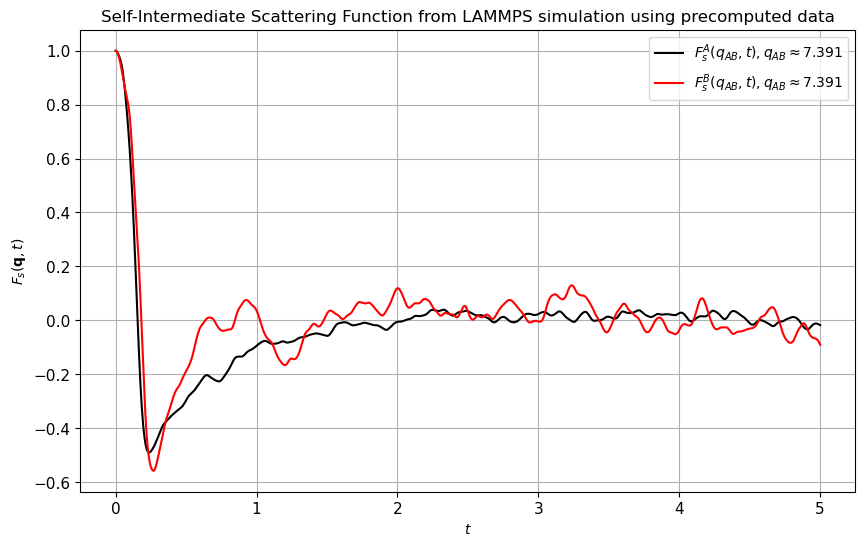

In [52]:
# Wave vector modulus q
q = 7.3919827143289245

# Loading data from txt:
sisf_A_LAMMPS_t_50 = np.loadtxt("sisf_A_LAMMPS_t_5.txt")
sisf_B_LAMMPS_t_50 = np.loadtxt("sisf_B_LAMMPS_t_5.txt")

# Timesteps number in LAMMPS
n_lammps_steps = len(sisf_A_LAMMPS_t_50) 

# Deltat is the same used in LAMMPS (=0.005 come nella simulazione Python)
Deltat = 0.005
time_lammps = np.arange(0, n_lammps_steps * Deltat, Deltat)

# Plot SISF
plt.figure(figsize=(10, 6))
plt.plot(time_lammps, sisf_A_LAMMPS_t_50, label=r'$F_s^A(q_{AB},t), q_{AB}\approx 7.391$', color='black')
plt.plot(time_lammps, sisf_B_LAMMPS_t_50, label=r'$F_s^B(q_{AB},t), q_{AB}\approx 7.391$', color='red')

plt.xlabel('$t$')
plt.ylabel('$F_s(\mathbf{q},t)$')
plt.title('Self-Intermediate Scattering Function from LAMMPS simulation using precomputed data')
plt.legend()

plt.grid(True)
plt.show()

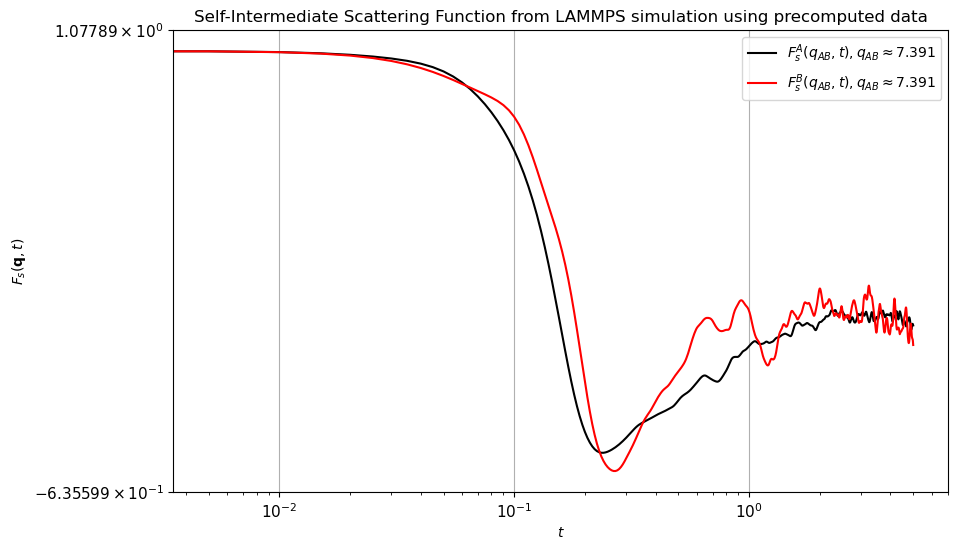

In [53]:
# Logarithmic plot with t=50.0

# Timesteps number in LAMMPS
n_lammps_steps = len(sisf_A_LAMMPS_t_50) 

# Deltat is the same used in LAMMPS (=0.005 come nella simulazione Python)
Deltat = 0.005
time_lammps = np.arange(0, n_lammps_steps * Deltat, Deltat)

# Loglog plot SISF
plt.figure(figsize=(10, 6))
plt.loglog(time_lammps, sisf_A_LAMMPS_t_50, label=r'$F_s^A(q_{AB},t), q_{AB}\approx 7.391$', color='black')
plt.loglog(time_lammps, sisf_B_LAMMPS_t_50, label=r'$F_s^B(q_{AB},t), q_{AB}\approx 7.391$', color='red')

plt.xscale('log')     # logarithmic x-axis
plt.yscale('symlog')  # symmetric logarithmic y-axis --> useful for negative values and strong presence of noise

plt.xlabel('$t$')
plt.ylabel('$F_s(\mathbf{q},t)$')
plt.title('Self-Intermediate Scattering Function from LAMMPS simulation using precomputed data')
plt.legend()

plt.grid(True)
plt.show()

## <span style="color: green">  A more accurate logarithmic Plot of LAMMPS simulation <span style="color: green">

Below is the code for the LAMMPS simulation. This code generates two separate files, each containing the coordinates of every atom at each timestep. The `run 20000` command is essential to ensure a clearer logarithmic plot, especially for extended time periods.

```
units lj
atom_style atomic
boundary p p p

# Initial configuration
read_data configurazione_iniziale_Python_NVE_T05eq.data

# LJ-interactions
pair_style lj/cut 2.5
pair_coeff 1 1 1.0 1.0 2.5
pair_coeff 1 2 1.5 0.80 2.0
pair_coeff 2 2 0.5 0.88 2.2

# Timestep and conditions
timestep 0.005
neighbor 0.3 bin
neigh_modify every 1 delay 0 check yes

# Grouping by atoms type
group A type 1
group B type 2

# Dump positions for group A and B
dump dumpA A custom 1 positionsA_log.data id type xu yu zu
dump dumpB B custom 1 positionsB_log.data id type xu yu zu

# NVE Integration
fix nve all nve

run 20000
```

### <span style="color: red"> NOTICE </span>: Uncomment and run the next three cells only if you need to recompute the Self-Intermediate Scattering Functions.

**Otherwise, there are other cells available where the SISF data, already calculated in previous simulations for $t=5.0$ and $t=100.0$, are stored and readen by a .txt file.  This setup is intended to save time by avoiding the need to repeatedly read the LAMMPS dump file and recalculate the SISF for each atom type.**

In [54]:
""""
# Dictionaries (very long operation):
positionsA_log = read_lammps_dump('positionsA_log.data')
positionsB_log = read_lammps_dump('positionsB_log.data')

# Check:
for timestep in sorted(positionsA.keys()):
    print(f"Timestep: {timestep}, Shape: {positionsA_log[timestep].shape}")
    print(f"Timestep: {timestep}, Shape: {positionsB_log[timestep].shape}")
    break  # only first timestep (timestep: 0)
"""

'"\n# Dictionaries (very long operation):\npositionsA_log = read_lammps_dump(\'positionsA_log.data\')\npositionsB_log = read_lammps_dump(\'positionsB_log.data\')\n\n# Check:\nfor timestep in sorted(positionsA.keys()):\n    print(f"Timestep: {timestep}, Shape: {positionsA_log[timestep].shape}")\n    print(f"Timestep: {timestep}, Shape: {positionsB_log[timestep].shape}")\n    break  # only first timestep (timestep: 0)\n'

## Plot until $t=10^3$

In [55]:
"""
# wave vector modulus q_AB: 
q = 7.3919827143289245

# SISF computation for type groups A and B (even longer than the reading operation)
sisf_A_LAMMPS_log = calculate_sisf_LAMMPS(positionsA_log, q)
sisf_B_LAMMPS_log = calculate_sisf_LAMMPS(positionsB_log, q)

# Saving in file:
np.savetxt("sisf_A_LAMMPS_t_100.txt", sisf_A_LAMMPS_log)
np.savetxt("sisf_B_LAMMPS_t_100.txt", sisf_B_LAMMPS_log)

# with same wave vector : q_AB

# Timesteps number in LAMMPS
n_lammps_steps_log = len(sisf_A_LAMMPS_log) 

# Deltat is the variable used in LAMMPS (=0.05 as in the Python simulation)
time_lammps_log = np.arange(0, n_lammps_steps_log * Deltat, Deltat)

#SISF Plot
plt.figure(figsize=(10, 6))
plt.plot(time_lammps_log, sisf_A_LAMMPS_log, label=r'$F_s^A(q_{AB},t), q_{AB}\approx 7.391$', color='black')
plt.plot(time_lammps_log, sisf_B_LAMMPS_log, label=r'$F_s^B(q_{AB},t), q_{AB}\approx 7.391$', color='red')

plt.xlabel('$t$')
plt.ylabel('$F_s(\mathbf{q},t)$')
plt.title(' Self-Intermediate Scattering Function from LAMMPS simulation computed with same wave vector $q$')
plt.legend()

plt.grid(True)
plt.show()
"""

'\n# wave vector modulus q_AB: \nq = 7.3919827143289245\n\n# SISF computation for type groups A and B (even longer than the reading operation)\nsisf_A_LAMMPS_log = calculate_sisf_LAMMPS(positionsA_log, q)\nsisf_B_LAMMPS_log = calculate_sisf_LAMMPS(positionsB_log, q)\n\n# Saving in file:\nnp.savetxt("sisf_A_LAMMPS_t_100.txt", sisf_A_LAMMPS_log)\nnp.savetxt("sisf_B_LAMMPS_t_100.txt", sisf_B_LAMMPS_log)\n\n# with same wave vector : q_AB\n\n# Timesteps number in LAMMPS\nn_lammps_steps_log = len(sisf_A_LAMMPS_log) \n\n# Deltat is the variable used in LAMMPS (=0.05 as in the Python simulation)\ntime_lammps_log = np.arange(0, n_lammps_steps_log * Deltat, Deltat)\n\n#SISF Plot\nplt.figure(figsize=(10, 6))\nplt.plot(time_lammps_log, sisf_A_LAMMPS_log, label=r\'$F_s^A(q_{AB},t), q_{AB}\x07pprox 7.391$\', color=\'black\')\nplt.plot(time_lammps_log, sisf_B_LAMMPS_log, label=r\'$F_s^B(q_{AB},t), q_{AB}\x07pprox 7.391$\', color=\'red\')\n\nplt.xlabel(\'$t$\')\nplt.ylabel(\'$F_s(\\mathbf{q},t)$\')\np

In [56]:
"""
# with same wave vector : q_AB
#SISF Plot
plt.figure(figsize=(10, 6))
plt.loglog(time_lammps_log, sisf_A_LAMMPS_log, label=r'$F_s^A(q_{AB},t), q_{AB}\approx 7.391$', color='black')
plt.loglog(time_lammps_log, sisf_B_LAMMPS_log, label=r'$F_s^B(q_{AB},t), q_{AB}\approx 7.391$', color='red')

plt.xlabel('$t$')
plt.ylabel('$F_s(\mathbf{q},t)$')
plt.title(' Self-Intermediate Scattering Function from LAMMPS simulation computed with same wave vector $q$')
plt.legend()

plt.grid(True)
plt.show()
"""

"\n# with same wave vector : q_AB\n#SISF Plot\nplt.figure(figsize=(10, 6))\nplt.loglog(time_lammps_log, sisf_A_LAMMPS_log, label=r'$F_s^A(q_{AB},t), q_{AB}\x07pprox 7.391$', color='black')\nplt.loglog(time_lammps_log, sisf_B_LAMMPS_log, label=r'$F_s^B(q_{AB},t), q_{AB}\x07pprox 7.391$', color='red')\n\nplt.xlabel('$t$')\nplt.ylabel('$F_s(\\mathbf{q},t)$')\nplt.title(' Self-Intermediate Scattering Function from LAMMPS simulation computed with same wave vector $q$')\nplt.legend()\n\nplt.grid(True)\nplt.show()\n"

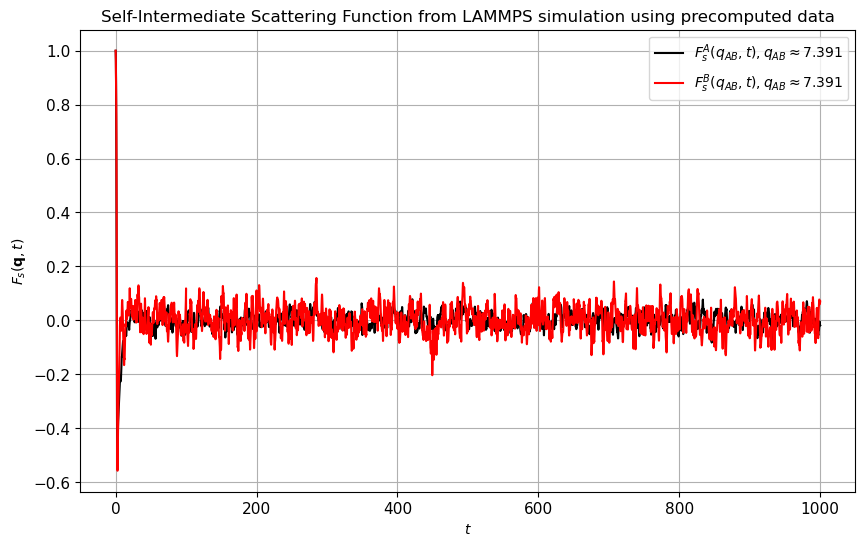

In [57]:
# Wave vector modulus q
q = 7.3919827143289245

# Loading data from txt:
sisf_A_LAMMPS_t_1000 = np.loadtxt("sisf_A_LAMMPS_t_100.txt")
sisf_B_LAMMPS_t_1000 = np.loadtxt("sisf_B_LAMMPS_t_100.txt")

# Timesteps number in LAMMPS
n_lammps_steps = len(sisf_A_LAMMPS_t_1000) 

# Deltat is the same used in LAMMPS (=0.05 come nella simulazione Python)
Deltat = 0.05
time_lammps = np.arange(0, n_lammps_steps * Deltat, Deltat)

# Plot SISF
plt.figure(figsize=(10, 6))
plt.plot(time_lammps, sisf_A_LAMMPS_t_1000, label=r'$F_s^A(q_{AB},t), q_{AB}\approx 7.391$', color='black')
plt.plot(time_lammps, sisf_B_LAMMPS_t_1000, label=r'$F_s^B(q_{AB},t), q_{AB}\approx 7.391$', color='red')

plt.xlabel('$t$')
plt.ylabel('$F_s(\mathbf{q},t)$')
plt.title('Self-Intermediate Scattering Function from LAMMPS simulation using precomputed data')
plt.legend()

plt.grid(True)
plt.show()

### Logarithmic plot

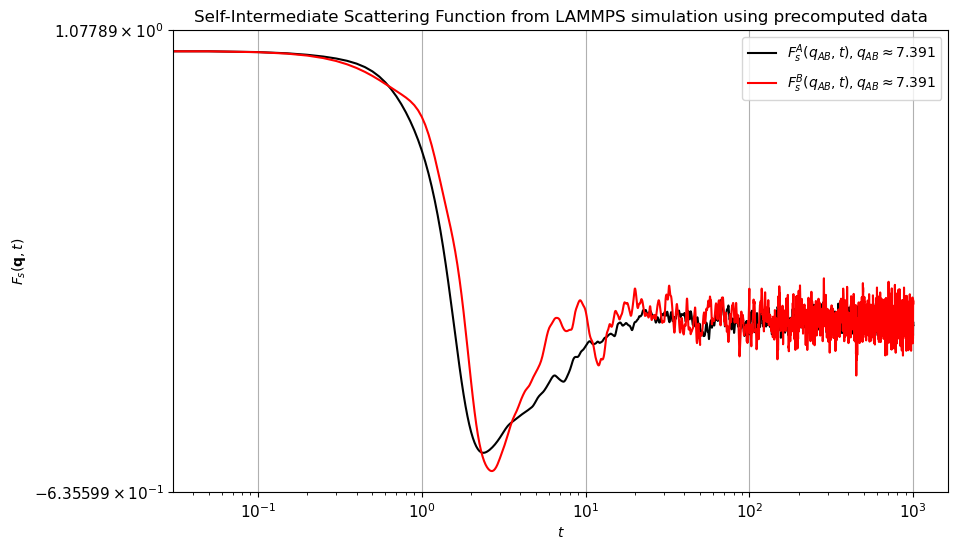

In [58]:
# Wave vector modulus q
q = 7.3919827143289245

# Timesteps number in LAMMPS
n_lammps_steps = len(sisf_A_LAMMPS_t_1000) 

# Deltat is the same used in LAMMPS (=0.05 come nella simulazione Python)
Deltat = 0.05
time_lammps_log = np.arange(0, n_lammps_steps * Deltat, Deltat)

# Plot SISF
plt.figure(figsize=(10, 6))
plt.loglog(time_lammps_log, sisf_A_LAMMPS_t_1000, label=r'$F_s^A(q_{AB},t), q_{AB}\approx 7.391$', color='black')
plt.loglog(time_lammps_log, sisf_B_LAMMPS_t_1000, label=r'$F_s^B(q_{AB},t), q_{AB}\approx 7.391$', color='red')

plt.xscale('log')     # logarithmic x-axis
plt.yscale('symlog')  # symmetric logarithmic y-axis --> useful for negative values and strong presence of noise

plt.xlabel('$t$')
plt.ylabel('$F_s(\mathbf{q},t)$')
plt.title('Self-Intermediate Scattering Function from LAMMPS simulation using precomputed data')
plt.legend()

plt.grid(True)
plt.show()

## Interpretation of results about $F_s(q,t)$ 

The SISF function, as we said before, represents the correlation of the position of a particle at time $t$ and its initial position at $t=0$, considerated as function of a wavelenght $\mathbf{q}$.

Since we defined it as:
\begin{equation}
F_s(q,t) = \frac{1}{N} \sum_{i=1}^N \left \langle exp \left(i \mathbf{q} \cdot ( \mathbf{r}_i(t) -  \mathbf{r}_i(0) ) \right ) \right \rangle
\end{equation}

We have a clear problem represented by negative values, both Python simulations and LAMMPS ones.

In the LAMMPS simulations with $t_{max}=10^3$, the SISF for both types $A$ and $B$ assumes negative values at time instant $t \simeq 10^0$, and then settles to a null value definitively for $t \simeq 10^2$, while for Python simulations it seems to decay very quickly to negative values and then grow and settle at zero.

The expression $\left \langle exp \left(i \mathbf{q} \cdot ( \mathbf{r}_i(t) - \mathbf{r}_i(0) ) \right ) \right \rangle$ can result in a complex number with negative real part when the product $\mathbf{q} \cdot ( \mathbf{r}_i(t) - \mathbf{r}_i(0) ) $ is an angle such that the cosine is negative. This happens when the angle is between $\pi/2$ and $3\pi/2$.

This could happen only if the particles move very far from their initial position (that is $\mathbf{r}_i(t) - \mathbf{r}_i(0) $ is very big) and this could take the product with wavelength $\mathbf{q}$ to result in angle with a cosine value negative. 

Values of wavelengths $\mathbf{q}$ seem to be reasonable, being that they were taken from the peaks obtained from the various radial distribution functions $g(r)$. There could be a problem caused by incorrect numerical values, perhaps related to too fast oscillations, which cause the function to obtain negative values too early in the simulation.

**========================================================================================================================**

**========================================================================================================================**

# <span style="color: red">  Another version of autocorrelation function: $Q(t)$ </span>


In the Karmakar's paper [3], several approaches are discussed to explain the slowing down of long-time $\alpha$-relaxation, focusing on the growth of correlation lengths as temperatures decreases.
The study identifies two key length scales in the system: a dynamic length scale linked to heterogeneity in local dynamics and a static length scale related to amorphous order.
Recent research on dynamic heterogeneity in supercooled glass-forming liquids has confirmed the existence of this dynamic length scale. These spatial correlations are analyzed using a **four-point susceptibility function**, defined as:
\begin{equation} 
\chi_4(t) = \frac{1}{N} [\left \langle Q^2(t) \right \rangle - \left \langle Q(t) \right \rangle^2] = \frac{1}{N} \cdot Var(Q(t)) 
\end{equation}

So, the function $\chi_4(t)$ can be seen as the variance of $Q(t)$ normalized by the number of particles $N$.

$Q(t)$ can be considered a correlation function.

In our description, $Q(t)$ is defined as:
\begin{equation}
Q(t) = \frac{1}{N}\sum_{i=1}^N w (|\mathbf{r}_{i} (t)-\mathbf{r}_{i}( 0)|)
\end{equation}

In this context, $Q(t)$ measures the correlation between the position of a particle $i$ at time $t$ and its initial position at time $t=0$. The window function $w(r)$ acts as a filter that assigns a specific weight to the contribution of each particle based on the distance it has traveled from its initial position.

The function $Q(t)$ is just another type of correlation function used in the study of particle dynamics in complex systems (like the Self-Intermediate Scattering Function $F_s(q,t)$ analyzed previously in the notebook) as in glasses and supercooled liquids, to characterize the persistence of the configurations over time. 
The physical interpretation of the function is the same as that of $F_s(q,t)$: the higher $Q(t)$ remains over time, the higher the system is "correlated", that is, the particles tend to remain close to their initial positions, suggesting slow dynamics.

Thus, $Q(t)$ can be interpreted as a temporal correlation function, which monitors how much the particles maintain their position relative over time.

To implement the function $Q(t)$ in Python, we can follow these steps. 

The function $w(r)$ is a window function that assigns the value 1 if the distance
$r$ is less than or equal to a threshold $a_0$ and 0 otherwise, i.e.:

\begin{equation}
w(r) = \begin{cases} 1, & \mbox{if }r \le a_0 \mbox{} \\ 0, & \mbox{otherwise }\mbox{ } \end{cases}
\end{equation}

Steps to Implement $Q(t)$:
1. Calculate the distance between the initial positions and those at time $t$ for each particle.
2. Apply the window function $w(r)$ to determine if the distance is less than or equal to $a_0$. 
3. Sum the window function contributions for all particles.

In [59]:
def calculate_Q(positions, a0):
    # Ricorda: 'positions' è un array Numpy con dimensioni : (n_steps, n_particles, 3)
    n_particles = positions.shape[1]  # Numero di particelle
    n_steps     = positions.shape[0]  # Numero di passi temporali
    
    Q = np.zeros(n_steps, dtype=np.float64)
    
    for t in range(n_steps):
        somma = 0  # Inizializza la somma per ogni passo temporale
        for i in range(n_particles):
            # Calcola le distanze delle particelle dalla loro posizione iniziale al tempo t
            distance = np.linalg.norm(positions[t, i] - positions[0, i])
        
            # Applica la funzione finestra: 1 se la distanza è <= a0, 0 altrimenti
            if distance <= a0:
                w = 1
            else:
                w = 0
                
            somma += w  # Aggiungi il valore di w alla somma
        
        # Q(t):
        Q[t] = somma 
    
    return Q/n_particles

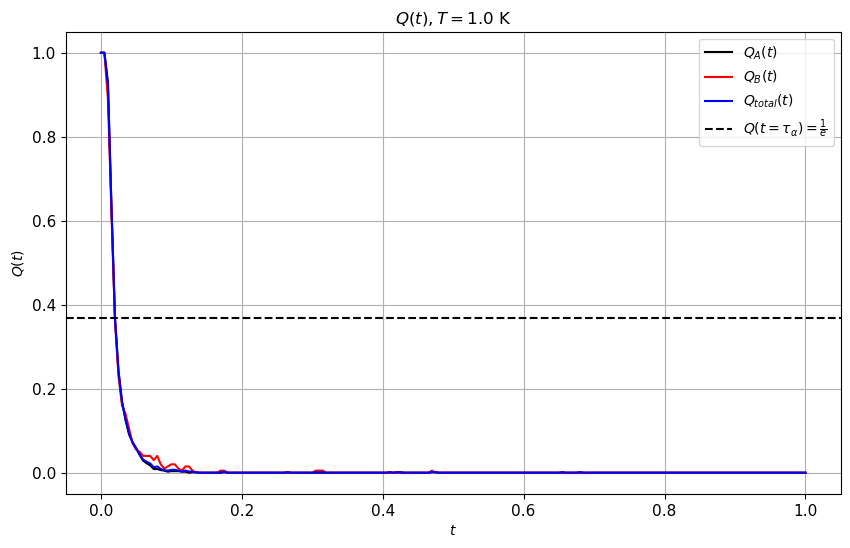

In [60]:
# Computation of Q(t) for particles A and B:
Q_A = calculate_Q(positions_A, a0)
Q_B = calculate_Q(positions_B, a0)

# Computation of Q(t) 
Q = calculate_Q(positions, a0)

# Unidimensional array representing time
#time = np.arange(len(Q_A)) * Deltat

#Q(t) plot
plt.figure(figsize=(10, 6))
plt.plot(t, Q_A, label=r'$Q_A(t)$', color='black')
plt.plot(t, Q_B, label=r'$Q_B(t)$', color='red')
plt.plot(t, Q, label=r'$Q_{total}(t)$', color='blue')
plt.xlabel('$t$')
plt.ylabel(f'$Q(t)$')
plt.title(f'$Q(t), T = {temperature}$ K')

# Karmakar paper [3]: 'The α-relaxation time, τα is defined at the time where this correlation function decays 
# to 1/e to its initial value as Q(t = τα) = 1/e '
plt.axhline(y=1/np.e, color='black', linestyle='--', label=r'$Q(t=\tau_{\alpha}) = \frac{1}{e}$')
plt.legend()


plt.grid(True)
plt.show()

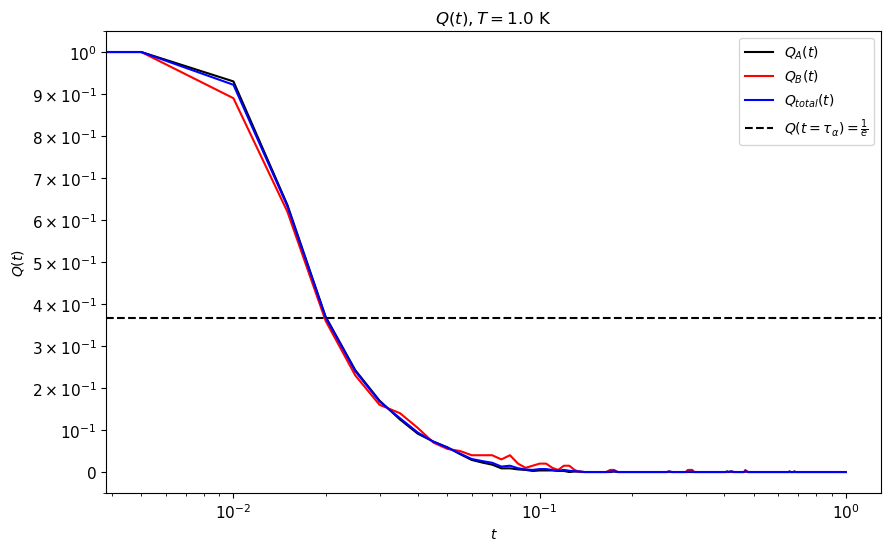

In [61]:
#Q(t) logplot
plt.figure(figsize=(10, 6))
plt.loglog(t, Q_A, label=r'$Q_A(t)$', color='black')
plt.loglog(t, Q_B, label=r'$Q_B(t)$', color='red')
plt.loglog(t, Q, label=r'$Q_{total}(t)$', color='blue')

plt.xlabel('$t$')
plt.ylabel(f'$Q(t)$')
plt.title(f'$Q(t), T = {temperature}$ K')

# Add ticks for a better comparison with Karmakar paper
plt.yscale('symlog')
plt.yticks(np.arange(0.0, 1.1, 0.1))
# Karmakar paper [3]: 'The α-relaxation time, τα is defined at the time where this correlation function decays 
# to 1/e to its initial value as Q(t = τα) = 1/e '
plt.axhline(y=1/np.e, color='black', linestyle='--', label=r'$Q(t=\tau_{\alpha}) = \frac{1}{e}$')
plt.legend()
#plt.grid(True)
plt.show()

In the two previous plots, an horizontal line has been reported. That line represents The $\alpha$-relaxation
time, $\tau_{\alpha}$ is defined at the time where this correlation function decays to $1/e$ to its initial value
as $Q(t = \tau_{\alpha}) = 1/e $.
Predictions obtained from inhomogeneous mode coupling theory (IMCT) suggest an initial power-law growth of the cooperativity length scale in time up to the $\beta$-relaxation time followed by a saturation region that continues up to a time scale comparable to the $\alpha$-relaxation time.

t = τ_α = 0.02


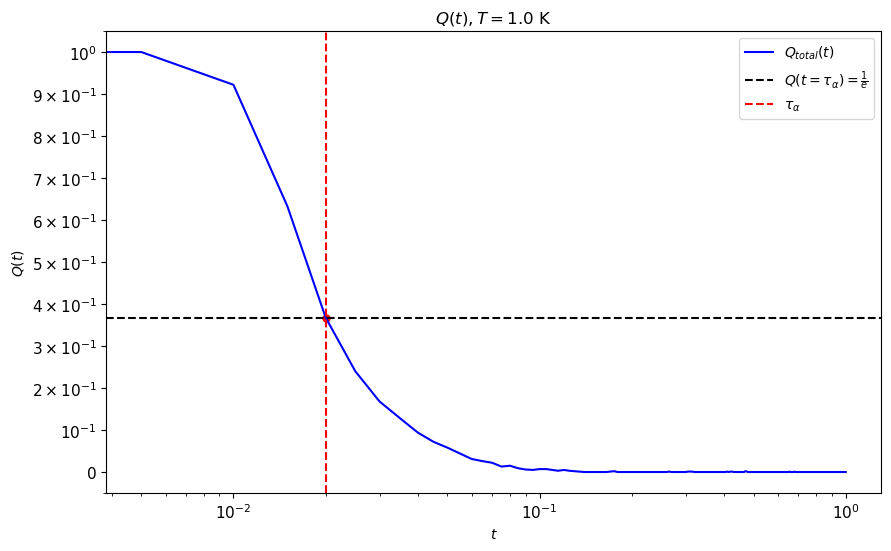

In [62]:
# Detection of t_alpha for Q_total:
def find_tau_alpha(Q):
    """
    Finds tau_alpha, time step in which Q(t) decreases to 1/e
    
    Parameters:
    Q (numpy array)

    Returns:
    tau_alpha (int)
    """
    
    # Compute 1/e (Q_initial/e):
    Q_initial = Q[0]
    target_value = Q_initial / np.e
    
    # Find index in which Q(t) is nearest to Q(0)/e:
    tau_alpha_index = np.argmin(np.abs(Q - target_value))
    
    return tau_alpha_index

tau_alpha = find_tau_alpha(Q)

# Corresponding time value (tau_alpha is the time step):
tau_alpha_time = t[tau_alpha]  
print(f"t = τ_α = {tau_alpha_time}")

tau_alpha_value = 1/np.e
# Highlighting in a plot:
#Q(t) logplot
plt.figure(figsize=(10, 6))
plt.loglog(t, Q, label=r'$Q_{total}(t)$', color='blue')

plt.xlabel('$t$')
plt.ylabel(f'$Q(t)$')
plt.title(f'$Q(t), T = {temperature}$ K')

# Add ticks for a better comparison with Karmakar paper
plt.yscale('symlog')
plt.yticks(np.arange(0.0, 1.1, 0.1))
# Karmakar paper [3]: 'The α-relaxation time, τα is defined at the time where this correlation function decays 
# to 1/e to its initial value as Q(t = τα) = 1/e '
plt.axhline(y=1/np.e, color='black', linestyle='--', label=r'$Q(t=\tau_{\alpha}) = \frac{1}{e}$')
plt.axvline(x=tau_alpha_time, color='red', linestyle='--', label=r'$\tau_{\alpha}$')
# Marker:
plt.scatter(tau_alpha_time, tau_alpha_value, color='red', s=25, marker='o')
plt.legend()
#plt.grid(True)
plt.show()

In [63]:
"""
# Save Q(t) data for next data analysis
import os

# Create the filename:
filename = f"Q(t)_T_{temperature:.2f}.txt" 

# Destination folder is 'Q(t)'
folder = "Q(t)"

# Check if it exists, if not it will be create by 'makedirs'
if not os.path.exists(folder):
    os.makedirs(folder)

# Join between filename and folder
filepath = os.path.join(folder, filename)

# Save data in txt file
np.savetxt(filepath, Q)

print(f"Data saved in {filepath}")
"""

Data saved in Q(t)\Q(t)_T_1.00.txt


**========================================================================================================================**

## <span style = "color:red"> Analysis of the four-susceptibility  function $\chi_4(t)$ </span> 
 
The $\chi_4(t)$ function is defined as:

\begin{equation}
\chi_4(t) = \frac{1}{N} [\left \langle Q^2(t) \right \rangle - \left \langle Q(t) \right \rangle^2] = \frac{1}{N} \cdot Var(Q(t))
\end{equation}

This function measures the spatial fluctuation of the correlation function $Q(t)$. In other words, $\chi_4(t)$ represents the variance of $Q(t)$ with respect to the time mean.

In [64]:
def calculate_chi_4(positions, a0):
    n_particles = positions.shape[1]
    n_steps     = positions.shape[0]
    
    Q_i = np.zeros((n_steps, n_particles), dtype=np.float64)
    
    # Computation of Q_i(t) for each atom:
    for t in range(n_steps):
        for i in range(n_particles):
            distance = np.linalg.norm(positions[t, i] - positions[0, i])
            w = 1 if distance <= a0 else 0
            Q_i[t, i] = w
    
    # Computation of <Q(t)> and <Q(t)^2>
    Q_mean = np.mean(Q_i, axis=1)
    Q_mean_sq = np.mean(Q_i**2, axis=1)
    
    # Computation of chi_4(t)
    chi_4 = (Q_mean_sq - Q_mean**2) / n_particles
    
    return chi_4

In [65]:
# Calculate chi_4(t) for both atom types
chi_4_A = calculate_chi_4(positions_A, a0)
chi_4_B = calculate_chi_4(positions_B, a0)
# And total:
chi_4   = calculate_chi_4(positions, a0)

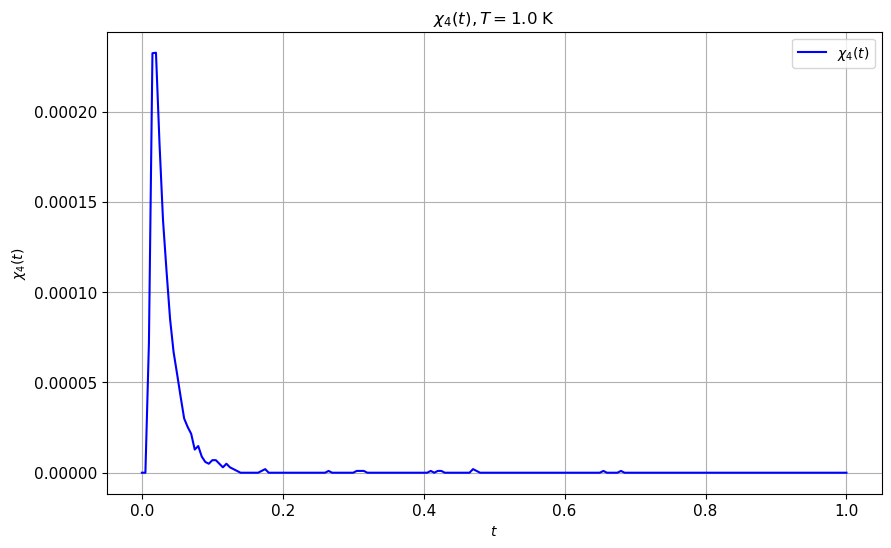

In [66]:
# Plotting chi_4(t)
plt.figure(figsize=(10, 6))
#plt.plot(t, chi_4_A, label=r'$\chi_4^{A}(t)$', color='black')
#plt.plot(t, chi_4_B, label=r'$\chi_4^{B}(t)$', color='red')
plt.plot(t, chi_4, label=r'$\chi_4(t)$', color='blue')

plt.xlabel('$t$')
plt.ylabel(r'$\chi_4(t)$')
plt.title(f'$\chi_4(t), T = {temperature}$ K')
plt.legend()
plt.grid(True)
plt.show()

chi_4 maximum value is 0.00023257600000000002 at time 0.02.
τ_4 = 0.02
τ_α = 0.02


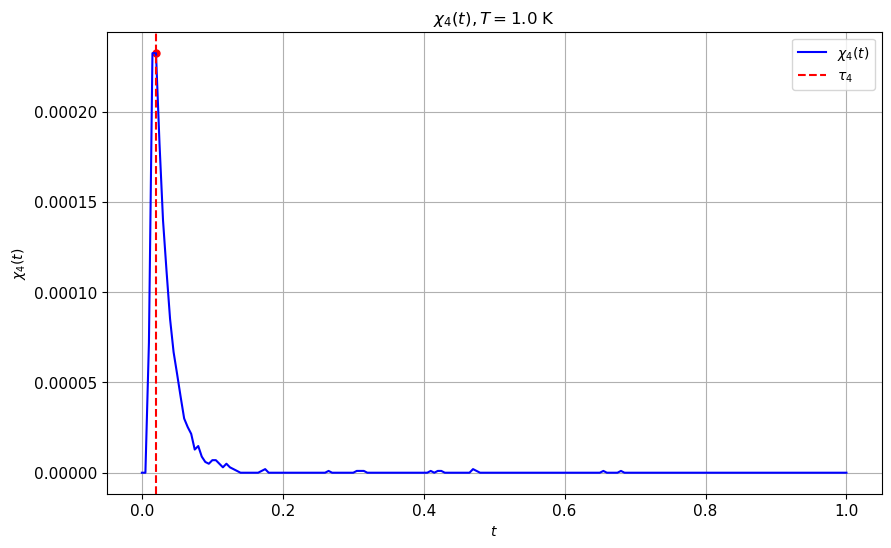

In [67]:
def find_max_chi_4(chi_4):

#Find the maximum value of chi_4 and the corresponding index.
    max_value = np.max(chi_4)
    max_index = np.argmax(chi_4)
    
    return max_value, max_index

max_value, max_index = find_max_chi_4(chi_4)

# Corresponding time value (max_index is the time step):
tau_4 = t[max_index]

print(f"chi_4 maximum value is {max_value} at time {tau_4}.")
print(f"τ_4 = {tau_4}")
print(f"τ_α = {tau_alpha_time}")

# Plotting chi_4(t) with t_4 highlighted:
plt.figure(figsize=(10, 6))
plt.plot(t, chi_4, label=r'$\chi_4(t)$', color='blue')

plt.xlabel('$t$')
plt.ylabel(r'$\chi_4(t)$')
plt.title(f'$\chi_4(t), T = {temperature}$ K')
plt.axvline(x=tau_4, color='red', linestyle='--', label=r'$\tau_4$ ')
# Marker:
plt.scatter(tau_4, max_value, color='red', s=25, marker='o')
plt.legend()
plt.grid(True)
plt.show()

τ_4 = 0.02


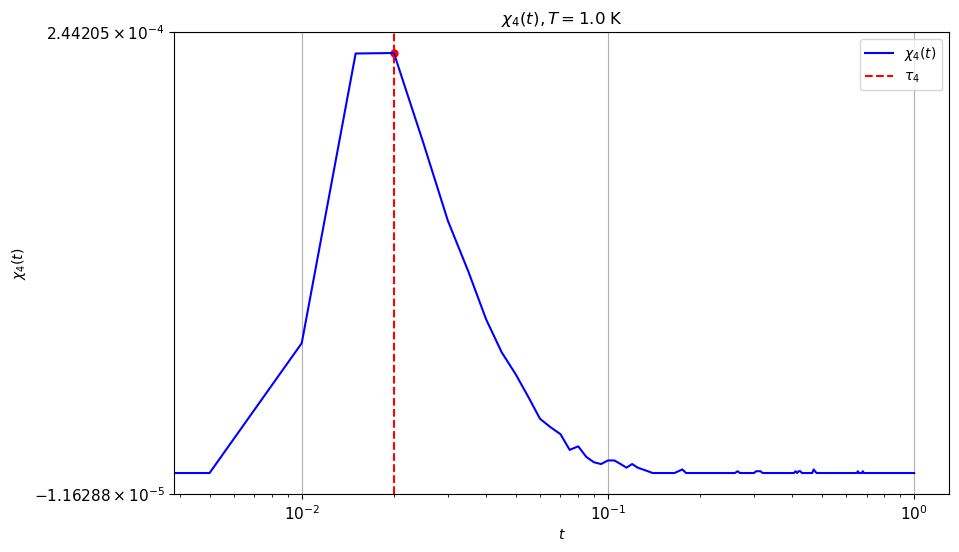

In [68]:
print(f"τ_4 = {tau_4}")
## Logarithm plot:
# Plotting chi_4(t) with t_4 highlighted:
plt.figure(figsize=(10, 6))
plt.loglog(t, chi_4, label=r'$\chi_4(t)$', color='blue')

plt.xlabel('$t$')
plt.ylabel(r'$\chi_4(t)$')
plt.title(f'$\chi_4(t), T = {temperature}$ K')
plt.axvline(x=tau_4, color='red', linestyle='--', label=r'$\tau_4$ ')
plt.yscale('symlog')  # symmetric logarithmic y-axis --> useful for negative values and strong presence of noise
# Marker:
plt.scatter(tau_4, max_value, color='red', s=25, marker='o')
plt.legend()
plt.grid(True)
plt.show()

### Interpretation of the graph of $\chi_4(t)$

The graph of $\chi_4(t)$ shows how the dynamic heterogeneity of the system evolves over time.

In the graph we can see:

* The $y$ axis represents $\chi_4(t)$, which is a function that initially increases, reaches a peak and then decreases.
The peak of $\chi_4(t)$ corresponds to the point where the dynamic heterogeneity is maximum.
* In the paper by Karmakar [3], it is reported that "The peak value of $\chi_4(t)$ is defined as $\chi_4^P \equiv \chi_4(t = \tau_4)$, where $\tau_4$ is the time at which $\chi_4(t)$ attains its maximum value and $\tau_4 \simeq \tau_{\alpha}$ at all temperatures."

Furthermore, $\chi_4(t)$ shows a peak at time close to the $\alpha$-relaxation time and both the peak height and peak position increase with decreasing temperature.

In [69]:
"""
# Save data for further analysis (other notebook)
# Create the filename:
filename = f"chi_4_T_{temperature:.2f}.txt" 

# Destination folder is 'chi_4'
folder = "chi_4"

# Check if it exists, if not it will be create by 'makedirs'
if not os.path.exists(folder):
    os.makedirs(folder)

# Join between filename and folder
filepath = os.path.join(folder, filename)

# Save data in txt file
np.savetxt(filepath, chi_4)

print(f"Data saved in {filepath}")
"""

Data saved in chi_4\chi_4_T_1.00.txt


## <span style="color: green"> Computation of $Q(t)$ and $\chi_4(t)$ with LAMMPS data </span>

**LAMMPS input code** in order to obtain positions of all atoms for every time steps using custom intervals. With the use of `logfreq3` in the `tmsd` variable, the actual steps in which the data is saved will vary depending on how logfreq3 was defined, starting from smaller intervals and increasing as the simulation progresses:
```
# KALJ NVE, logaritmic time steps, save atom positions 

atom_style atomic 
boundary p p p                                          # periodic boundary conditions in each direction 

read_data configurazione_iniziale_Python_NVE_T05eq.data # read data file (including mass info) 

# Define interaction potential
pair_style lj/cut 2.5 
pair_coeff 1 1 1.0 1.0 2.5 # type type eps sigma rcut 
pair_coeff 1 2 1.5 0.80 2.0 # typeA typeB epsAB sigmaAB rcutAB=2.5*0.8=2.0 
pair_coeff 2 2 0.5 0.88 2.2 # typeB typeB epsBB sigmaBB rcutBB=2.5*0.88=2.2 

timestep 0.005 # Delta t 
neighbor 0.3 bin 
neigh_modify every 1 delay 0 check yes                  # Update neighbor 

group A type 1 
group B type 2 

# Variables for logarithmic time steps
variable tmsd equal logfreq3(1,200,10000000) 
variable tLJ equal step*dt 

# Dump command to save positions of atoms in groups A and B
dump posA A custom 5000 dump_A_positions.lammpstrj id type x y z 
dump posB B custom 5000 dump_B_positions.lammpstrj id type x y z 

# Modify dump to sort by atom id and output at logarithmic intervals
dump_modify posA sort id every v_tmsd
dump_modify posB sort id every v_tmsd

# Set numerical integrator
fix nve1 all nve 

# Run the simulation
run 10000000

```

In [70]:
# Import positions of atoms obtained from the LAMMPS code above
# Create the dictionaries:
positionsA_Q_lammps = read_lammps_dump('dump_A_positions.lammpstrj')
positionsB_Q_lammps = read_lammps_dump('dump_B_positions.lammpstrj')

In [71]:
# Safe check to be sure that the loading has been done correctly [should be ITEM TYPE x y z] for each atom for each timestep
for timestep in sorted(positionsA_Q_lammps.keys()):
    print(f"Timestep: {timestep}, Shape: {positionsA_Q_lammps[timestep].shape}")
    print(f"Timestep: {timestep}, Shape: {positionsB_Q_lammps[timestep].shape}")
    break  # only first timestep (timestep: 0)

Timestep: 1, Shape: (800, 5)
Timestep: 1, Shape: (200, 5)


### How to compute $Q(t)$:

To use the `calculate_Q` function with positions imported from LAMMPS dump files, we need to reorganize the position data into a suitable format. The `calculate_Q` function requires a positions array with dimensions `(n_steps, n_particles, 3)`, where `n_steps` is the number of time steps, `n_particles` is the number of particles, and `3` is the x, y, z coordinates of the particles.

In [72]:
# Constructing the positions array
# We can create a positions array by organizing the x, y, z coordinates of the particles for each timestep:
def prepare_positions_for_Q(dump_data):
    """
    Parameters:
        dump_data (dict): Position data from LAMMPS dump in dictionary form.
                          The key is the timestep and the value is a numpy array (n_particles, 5)
                        where 5 are: (atom_id, x, y, z, ...)
                          
    Returns:
        positions (np.array): positions array with shape: (n_steps, n_particles, 3)
    """
    timesteps = sorted(dump_data.keys())  # Sorting array for time step
    n_steps = len(timesteps)
    n_particles = dump_data[timesteps[0]].shape[0]
    
    positions = np.zeros((n_steps, n_particles, 3))
    
    for i, t in enumerate(timesteps):
        positions[i] = dump_data[t][:, 1:4]  # extracts columns x, y, z
    
    return positions

In [73]:
# Positions for A and B:
positions_A_Q_lammps = prepare_positions_for_Q(positionsA_Q_lammps)
positions_B_Q_lammps = prepare_positions_for_Q(positionsB_Q_lammps)

# Array numpy for positions:
positions_Q_lammps = np.concatenate((positions_A_Q_lammps, positions_B_Q_lammps), axis=1)

In [74]:
# Calculate Q(t) for A and B with LAMMPS data:
Q_A_lammps = calculate_Q(positions_A_Q_lammps, a0_lammps)
Q_B_lammps = calculate_Q(positions_B_Q_lammps, a0_lammps)

# Q(t) keeping all the N=Na+Nb = 1000 atoms in consideration:
Q_lammps   = calculate_Q(positions_Q_lammps, a0_lammps)

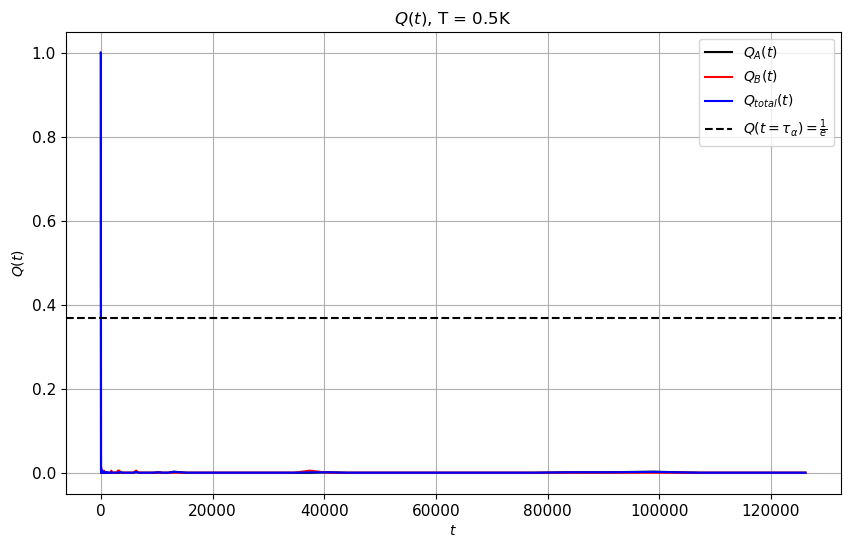

In [75]:
# Logarithmic Timesteps taken from the dictionary keys
timesteps = sorted(positionsA_Q_lammps.keys())  

# Unidimensional time array:
t = np.array(timesteps) * Deltat

# Plot and logarithmic plot:
plt.figure(figsize=(10, 6))
plt.plot(t, Q_A_lammps, label=r'$Q_A(t)$', color='black')
plt.plot(t, Q_B_lammps, label=r'$Q_B(t)$', color='red')
plt.plot(t, Q_lammps,   label=r'$Q_{total}(t)$',     color='blue')
#plt.plot(t, Q, label=r'$Q_{total}(t)$', color='blue')
plt.xlabel('$t$')
plt.ylabel(f'$Q(t)$')
plt.title(f'$Q(t)$, T = 0.5K')

# Karmakar paper [3]: 'The α-relaxation time, τα is defined at the time where this correlation function decays 
# to 1/e to its initial value as Q(t = τα) = 1/e '
plt.axhline(y=1/np.e, color='black', linestyle='--', label=r'$Q(t=\tau_{\alpha}) = \frac{1}{e}$')
plt.legend()


plt.grid(True)
plt.show()

#### Maybe it's better with a logarithmic plot...

τ_α for the system is at time step 30
t = τ_α = 1.55


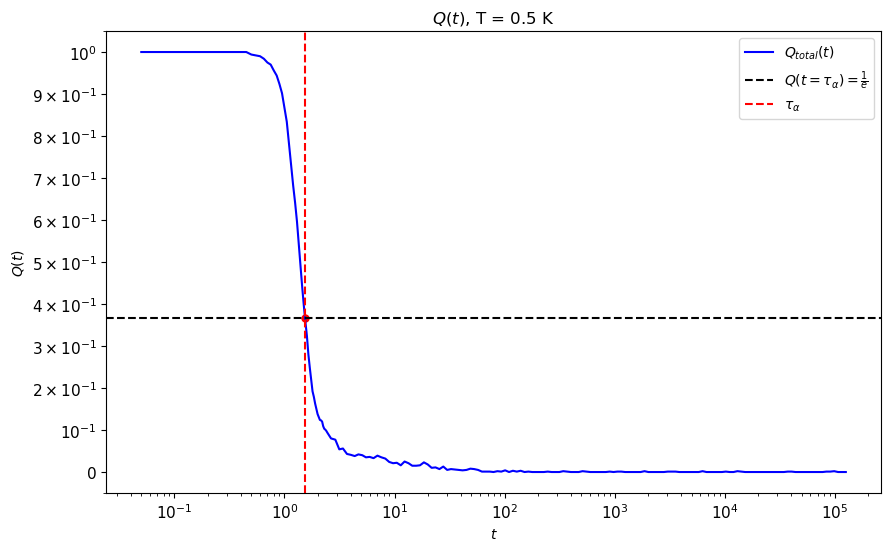

In [76]:
# Better with a logarithmic plot:
# For Q(t) function:
tau_alpha_lammps = find_tau_alpha(Q_lammps)
print(f"τ_α for the system is at time step {tau_alpha_lammps}")

# Corresponding time value (tau_alpha is the time step):
tau_alpha_time_lammps = t[tau_alpha_lammps]  
print(f"t = τ_α = {tau_alpha_time_lammps}")

tau_alpha_value = 1/np.e
# Highlighting in a plot:
#Q(t) logplot
plt.figure(figsize=(10, 6))
plt.loglog(t, Q_lammps, label=r'$Q_{total}(t)$', color='blue')

plt.xlabel('$t$')
plt.ylabel(f'$Q(t)$')
plt.title(f'$Q(t)$, T = 0.5 K')

# Add ticks for a better comparison with Karmakar paper
plt.yscale('symlog')
plt.yticks(np.arange(0.0, 1.1, 0.1))
# Karmakar paper [3]: 'The α-relaxation time, τα is defined at the time where this correlation function decays 
# to 1/e to its initial value as Q(t = τα) = 1/e '
plt.axhline(y=1/np.e, color='black', linestyle='--', label=r'$Q(t=\tau_{\alpha}) = \frac{1}{e}$')
plt.axvline(x=tau_alpha_time_lammps, color='red', linestyle='--', label=r'$\tau_{\alpha}$')
# Marker:
plt.scatter(tau_alpha_time_lammps, tau_alpha_value, color='red', s=25, marker='o')
plt.legend()
#plt.grid(True)
plt.show()

### How to compute $\chi_4(t)$:

In [77]:
# Calculate chi_4(t) for both atom types
chi_4_A_lammps = calculate_chi_4(positions_A_Q_lammps, a0_lammps)
chi_4_B_lammps = calculate_chi_4(positions_B_Q_lammps, a0_lammps)
# And total:
chi_4_lammps   = calculate_chi_4(positions_Q_lammps, a0_lammps)

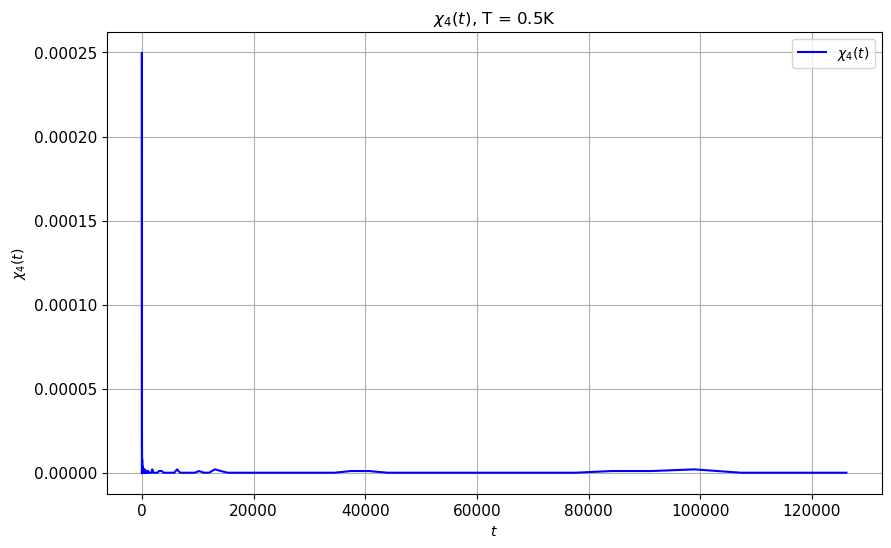

In [78]:
# Plotting chi_4(t)
plt.figure(figsize=(10, 6))
#plt.plot(t, chi_4_A, label=r'$\chi_4^{A}(t)$', color='black')
#plt.plot(t, chi_4_B, label=r'$\chi_4^{B}(t)$', color='red')
plt.plot(t, chi_4_lammps, label=r'$\chi_4(t)$', color='blue')

plt.xlabel('$t$')
plt.ylabel(r'$\chi_4(t)$')
plt.title(f'$\chi_4(t)$, T = 0.5K')
plt.legend()
plt.grid(True)
plt.show()

#### Maybe it's better with a logarithmic plot...

chi_4 maximum value for LAMMPS simulation is 0.000249856 at time 1.4000000000000001.
τ_4 = 1.4000000000000001
τ_α = 1.55


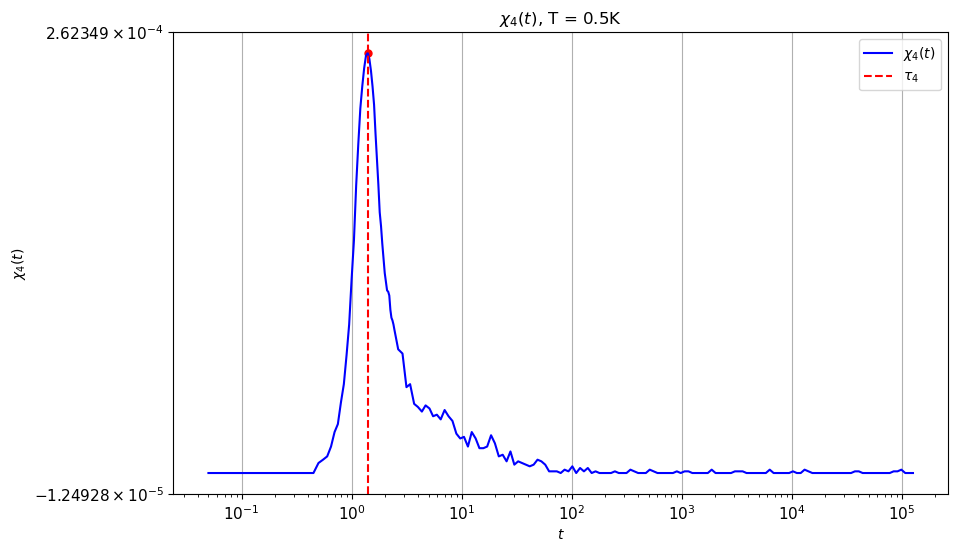

In [79]:
# Better visualization with a Logarithmic plot + detection of tau_4 (comparison with tau_alpha)
max_value_lammps, max_index_lammps = find_max_chi_4(chi_4_lammps)

# Corresponding time value (max_index is the time step):
tau_4_lammps = t[max_index_lammps]

print(f"chi_4 maximum value for LAMMPS simulation is {max_value_lammps} at time {tau_4_lammps}.")
print(f"τ_4 = {tau_4_lammps}")
print(f"τ_α = {tau_alpha_time_lammps}")

# Plotting chi_4(t) with t_4 highlighted:
plt.figure(figsize=(10, 6))
plt.loglog(t, chi_4_lammps, label=r'$\chi_4(t)$', color='blue')

plt.xlabel('$t$')
plt.ylabel(r'$\chi_4(t)$')
plt.title(f'$\chi_4(t)$, T = 0.5K')
plt.yscale('symlog')  # symmetric logarithmic y-axis --> useful for negative values and strong presence of noise
plt.axvline(x=tau_4_lammps, color='red', linestyle='--', label=r'$\tau_4$ ')
# Marker:
plt.scatter(tau_4_lammps, max_value_lammps, color='red', s=25, marker='o')
plt.legend()
plt.grid(True)
plt.show()


In [80]:
"""
## Saving Arrays in txt files:
# Saving chi_4_lammps' in folder 'chi_4'
os.chdir('chi_4')
np.savetxt('chi_4_simulazione_LAMMPS.txt', chi_4_lammps)
os.chdir('..')  # Back to folder 'Progetto'

# Saving 'Q_lammps' in folder 'Q(t)'
os.chdir('Q(t)')
np.savetxt('Q_simulazione_LAMMPS.txt', Q_lammps)
os.chdir('..')  # Back to folder 'Progetto'
"""

"\n## Saving Arrays in txt files:\n# Saving chi_4_lammps' in folder 'chi_4'\nos.chdir('chi_4')\nnp.savetxt('chi_4_simulazione_LAMMPS.txt', chi_4_lammps)\nos.chdir('..')  # Back to folder 'Progetto'\n\n# Saving 'Q_lammps' in folder 'Q(t)'\nos.chdir('Q(t)')\nnp.savetxt('Q_simulazione_LAMMPS.txt', Q_lammps)\nos.chdir('..')  # Back to folder 'Progetto'\n"

**========================================================================================================================**

**========================================================================================================================**

## <span style="color: red"> Analysis of the $\beta$-Relaxation Regime </span>
In this section we will analyze the obtained SISF to identify the $\beta$-relaxation regime, comparing it with the predictions of the Mode-Coupling Theory.

The $\beta$-relaxation regime is an important phase in the dynamical behavior of supercooled liquids and glasses, and is described by mode-coupling theory (MCT). This regime is typically observed after an initial rapid decay and before the $\alpha$-relaxation regime, characterized by a plateau in the intermediate correlation function.


### <span style="color: red"> Analysis on $F_{s}(q,t)$ function </span> : 
in order to analyze the $\beta$-relaxation regime, we can consider initially the intermediate scattering function $F_{s}(q,t)$ and identify the phase in which this function exhibits a quasi-plateau behavior. Once the regime is identified, we can perform a detailed analysis to obtain the characteristics of the $\beta$-relaxation.

Let's try to re-plotting the functions $F_s^A(q_{{AB}},t)$ and $F_s^B(q_{{AB}},t)$ over time $t$ for the data obtained with Python simulation and with the LAMMPS simulation.

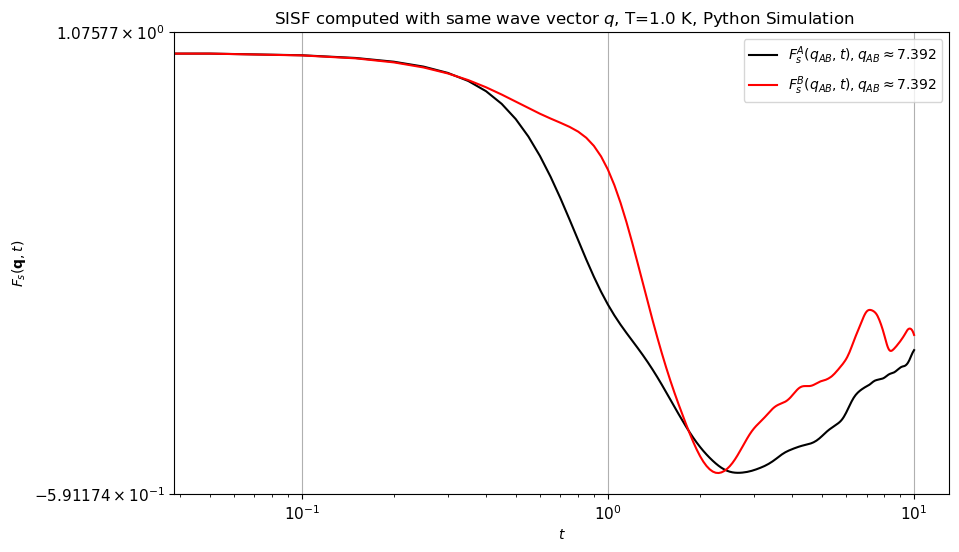

In [81]:
## Python Simulation

# with same wave vector : q_AB
t = np.arange(len(sisf_A_same)) * Deltat
#SISF Plot
plt.figure(figsize=(10, 6))
plt.loglog(t, sisf_A_same, label=rf'$F_s^A(q_{{AB}},t), q_{{AB}}\approx {q_AB:.3f}$', color='black')
plt.loglog(t, sisf_B_same, label=rf'$F_s^B(q_{{AB}},t), q_{{AB}}\approx {q_AB:.3f}$', color='red')

plt.xscale('log')     # logarithmic x-axis
plt.yscale('symlog')  # symmetric logarithmic y-axis --> useful for negative values and strong presence of noise

plt.xlabel('$t$')
plt.ylabel('$F_s(\mathbf{q},t)$')
plt.title(f' SISF computed with same wave vector $q$, T={temperature} K, Python Simulation')
plt.legend()

plt.grid(True)
plt.show()

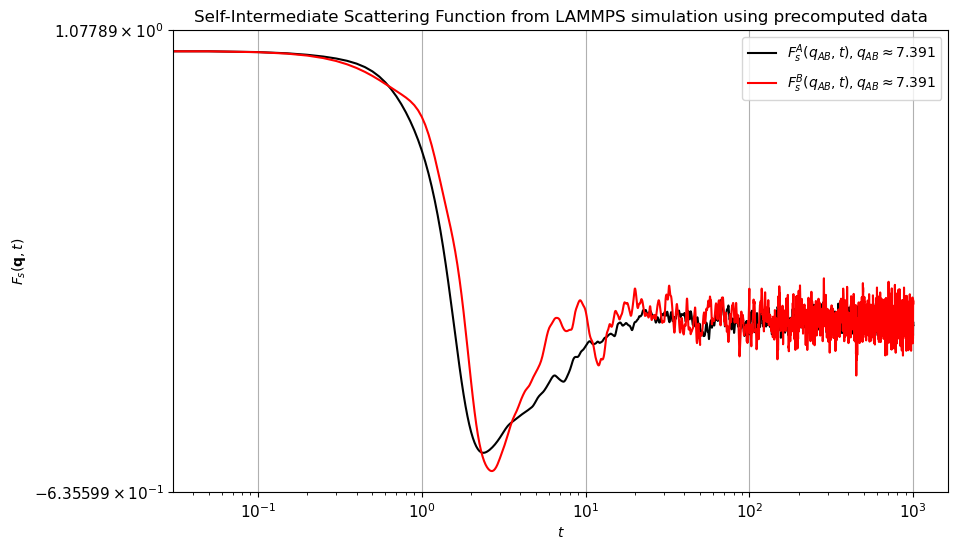

In [82]:
## LAMMPS Simulation
# Wave vector modulus q
q = q_AB

# Timesteps number in LAMMPS
n_lammps_steps = len(sisf_A_LAMMPS_t_1000) 

# Deltat is the same used in LAMMPS (=0.05 come nella simulazione Python)
Deltat = 0.05
time_lammps_log = np.arange(0, n_lammps_steps * Deltat, Deltat)

# Plot SISF
plt.figure(figsize=(10, 6))
plt.loglog(time_lammps_log, sisf_A_LAMMPS_t_1000, label=r'$F_s^A(q_{AB},t), q_{AB}\approx 7.391$', color='black')
plt.loglog(time_lammps_log, sisf_B_LAMMPS_t_1000, label=r'$F_s^B(q_{AB},t), q_{AB}\approx 7.391$', color='red')

plt.xscale('log')     # logarithmic x-axis
plt.yscale('symlog')  # symmetric logarithmic y-axis --> useful for negative values and strong presence of noise

plt.xlabel('$t$')
plt.ylabel('$F_s(\mathbf{q},t)$')
plt.title('Self-Intermediate Scattering Function from LAMMPS simulation using precomputed data')
plt.legend()

plt.grid(True)
plt.show()

Sadly, we have to note that is not possible to conduct a detailed analysis of the $\beta$-relaxation regime based on the $F_s(q,t)$ functions obtained in this study. 

The typical behavior associated with the $\beta$-relaxation regime is not evident in the data. In particular, the characteristic plateau that signals the slowing down of particle motion after the ballistic regime and before the onset of the $\alpha$-relaxation regime is absent.

For comparison, in the plot from the Kob & Andersen paper pictured below, the  $\beta$-relaxation regime is clearly visible for low values of $T$. After an initial rapid decay corresponding to the balistic regime, $F_s(q,t)$ enters a plateau-like region where particles exhibit caged dynamics, before eventually decaying further in the  $\alpha$-relaxation regime. This behavior is a hallmark of supercooled liquids, but it is not reproduced in the present simulation (both Python and LAMMPS).

![KA_beta_relaxation_regime](reference_images/kobandersen_beta_relax_highlighted.png)

**========================================================================================================================**

### In this section the obtained $Q(t)$ will be analyzed to identify the relaxation regime $\beta$, comparing it with the predictions of the *Mode-Coupling Theory*.

The paper [1] by W. Kob and H. C. Andersen discusses various aspects of the Mode-Coupling Theory (MCT) as applied to the study of supercooled liquids, focusing on the $\beta$-relaxation regime.

1. <span style="color:blue"> $\beta$**-Relaxation and von Schweidler Law** </span>: the study confirmed that the time dependence of the self-intermediate scattering function in the $\beta$-relaxation regime follows the von Schweidler law, a power-law decay predicted by MCT. The paper reports that the exponents observed are in good agreement with MCT predictions, indicating that the theory accurately describes this aspect of the dynamics.

2. <span style="color:blue"> **Mode-Coupling Theory (MCT)** </span>: MCT predicts that as the temperature of a supercooled liquid approaches a critical value, $T_C$, the dynamics of the system exhibit a scaling behavior. Specifically, correlation functions are expected to show a **power-law time dependence** in the β-relaxation regime, which lies between the initial microscopic relaxation and the final approach to equilibrium.

3. <span style="color:blue"> **Diffusion Constants and $\alpha$-Relaxation** </span>: MCT also predicts a relationship between the relaxation times in the $\beta$-relaxation regime and the diffusion constants of the particles. The study found that while the critical temperature $T_C$ is consistent between the relaxation times and the diffusion constants, the exponents governing the temperature dependence of these quantities differ. This discrepancy suggests that while MCT captures some features of the dynamics, it may not fully describe the relationship between diffusion and relaxation processes.

4. <span style="color:blue"> **Temperature Dependence and Critical Behavior** </span>: The paper also tested the temperature dependence of the diffusion constants and the relaxation times, finding a power-law dependence near $T_C$, as predicted by MCT. However, the difference in exponents for diffusion constants and relaxation times challenges the universality of MCT predictions.

### <span style="color: red"> Analysis on $Q(t)$ conducted with the Kamarkar's method </span>

#### <span style="color: green">  Using LAMMPS simulation data: </span>

To identify the beta-relaxation period in the context of the self correlation functions $Q_A(t)$ and $Q_B(t)$, based on the description of the paper and the typical behavior of $Q(t)$, we can create a function similar to the one used for $F_s(\mathbf{q},t)$, but adapted for $Q(t)$. The function will try to identify the $\beta$-relaxation regime by observing a stretch in which $Q(t)$ slowly decreases after the ballistic regime (rapid decrease) and before the onset of the $\alpha$-relaxation regime.

In [83]:
print(positions_A_Q_lammps.shape)  # (n_steps, n_particles, dimensions)

(183, 800, 3)


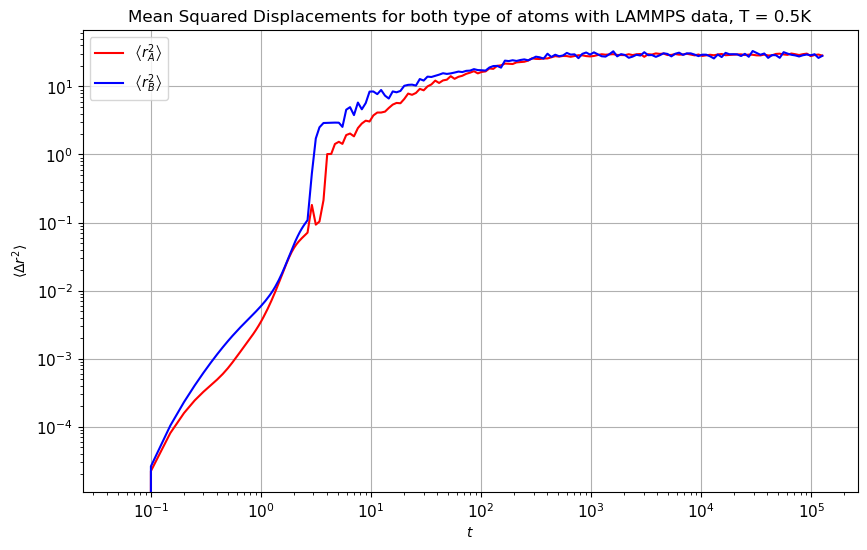

In [84]:
# Let's calculate the MSD with the LAMMPS positions data:
msd_lammps_A = calculate_msd(positions_A_Q_lammps)
msd_lammps_B = calculate_msd(positions_B_Q_lammps)
# Logarithmic Timesteps taken from the dictionary keys
timesteps = sorted(positionsA_Q_lammps.keys())  

# Unidimensional time array:
t = np.array(timesteps) * Deltat

# Logarithmic plot:
plt.figure(figsize=(10, 6))
plt.loglog(t, msd_lammps_A, color='red', label=r'$\left\langle r_{A}^2 \right\rangle$')
plt.loglog(t, msd_lammps_B, color='blue', label=r'$\left\langle r_{B}^2 \right\rangle$')

plt.xlabel('$t$')
plt.ylabel(r'$\left \langle \Delta r^2 \right \rangle$')
plt.title(f'Mean Squared Displacements for both type of atoms with LAMMPS data, T = 0.5K')
plt.grid(True)
plt.legend()
plt.show()

For the analysis of the $\beta$-relaxation regime of $Q(t)$ we rely on the paper by Karmakar [3]. In the paper, the $\beta$-relaxation regime is identified through the analysis of the temporal behavior of the Mean Square Displacement (MSD) and the correlation function $Q(t)$. 

Here are the key points regarding the identification of the $\beta$-regime:
1. **MSD and Log-Log Plot:**

    * In the paper, the beta-regime is identified by analyzing the behavior of the log derivative of the MSD with respect to the logarithm of time.
    * It is mentioned that the $\beta$-regime is associated with a plateau in the log-log plot of the MSD, where the curve temporarily stops growing rapidly, before resuming its growth at longer times (indicating the beginning of the $\alpha$-relaxation regime).


2. **Identification of $\tau_{\beta}$:**

    * $\tau_{\beta}$ is defined as the time at which a significant inflection is observed in the log-log plot of the MSD, i.e. the point at which the derivative of the curve with respect to time reaches a minimum. This minimum corresponds to a "dip" in the log derivative of the MSD.
    * The log derivative with respect to time has a value of 2 at very short times (indicating the ballistic motion of particles, called "ballistic regime" in the paper), followed by a minimum in the $\beta$-regime, before tending to 1 at very long times (indicating diffuse or Brownian diffusion).

3. **Theoretical definition:**

    * From a theoretical point of view, the beta-regime is associated with cage dynamics, where particles are temporarily trapped by their neighbors before they are able to move freely, which happens in the alpha-relaxation regime.

    * The paper also mentions the theoretical prediction of the Inhomogeneous Mode Coupling Theory (IMCT), according to which there is an initial growth of the cooperativity length up to $\tau_{\beta}$, followed by a saturation up to $\tau_{\alpha}$. These values, in the notebook, are represented by the variables `tau_beta` and `tau_alpha`.

C:\Users\emanu\AppData\Local\Temp\ipykernel_18668\3089564909.py:2: RuntimeWarning: divide by zero encountered in log
  log_msd_lammps_A = np.log(msd_lammps_A)
C:\Users\emanu\AppData\Local\Temp\ipykernel_18668\3089564909.py:3: RuntimeWarning: divide by zero encountered in log
  log_msd_lammps_B = np.log(msd_lammps_B)


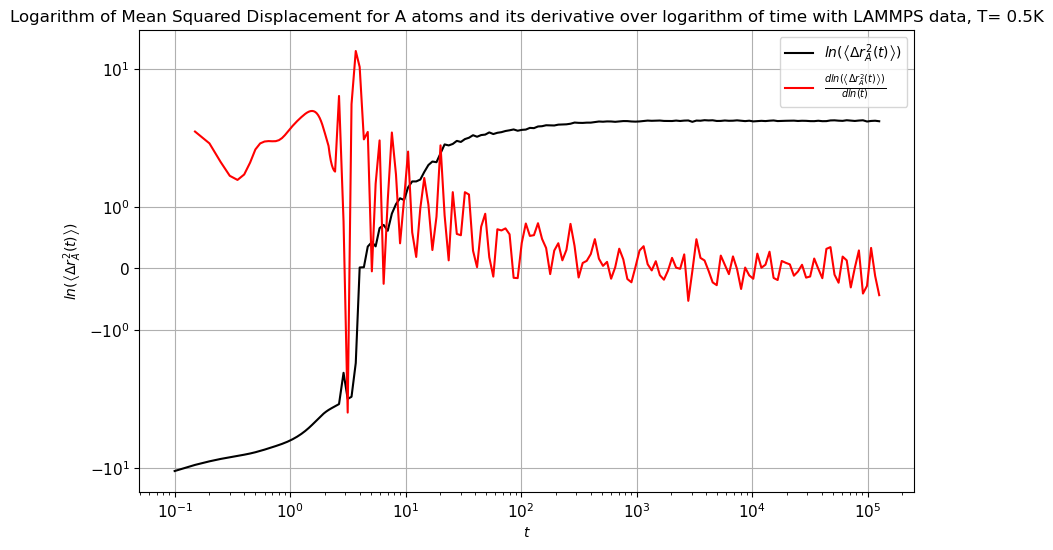

In [85]:
# Compute the logarithm of MSD: 
log_msd_lammps_A = np.log(msd_lammps_A)
log_msd_lammps_B = np.log(msd_lammps_B)

# Compute derivative of ln(<r^2>) wrt ln(t):
log_t = np.log(t)
dlogMSD_dlogt_A = np.gradient(log_msd_lammps_A, log_t)
dlogMSD_dlogt_B = np.gradient(log_msd_lammps_B, log_t)

# Results Visualization:
plt.figure(figsize=(10, 6))
# Plotting ln(<r_A^2>) over time:
plt.loglog(t, log_msd_lammps_A, color='black', label=r'$ ln (\left \langle \Delta r_{A}^2 (t) \right \rangle)$')
plt.loglog(t, dlogMSD_dlogt_A, color='red', label=r'$ \frac{dln (\left \langle \Delta r_{A}^2 (t) \right \rangle)}{dln(t)}$')
plt.xlabel('$t$')
plt.ylabel(r'$ ln (\left \langle \Delta r_{A}^2 (t) \right \rangle)$')
plt.yscale('symlog')  # symmetric logarithmic y-axis --> useful for negative values and strong presence of noise
plt.title('Logarithm of Mean Squared Displacement for A atoms and its derivative over logarithm of time with LAMMPS data, T= 0.5K')
plt.grid(True)
plt.legend()
plt.show()

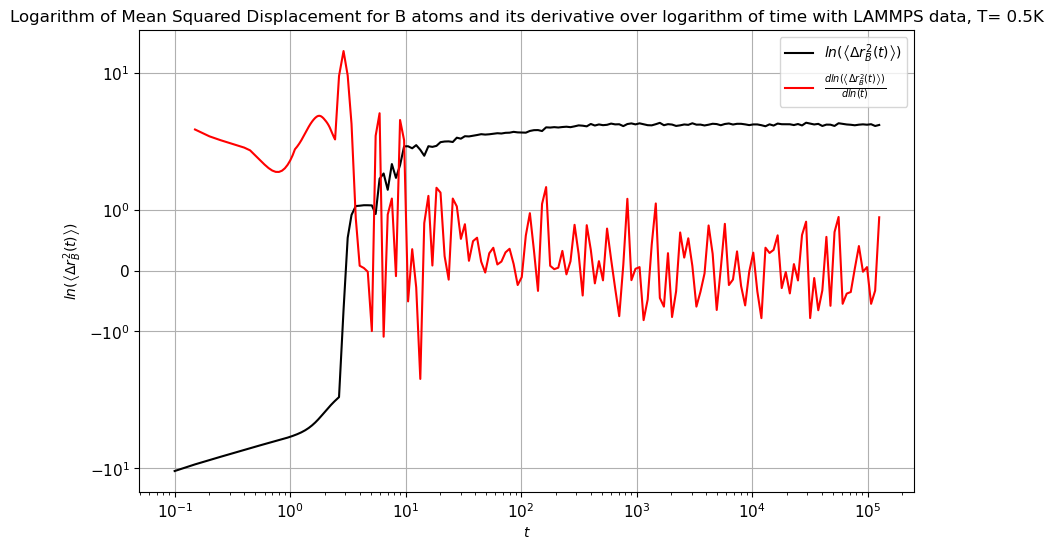

In [86]:
# Plotting ln(<r_B^2>) over time:
plt.figure(figsize=(10, 6))
plt.loglog(t, log_msd_lammps_B, color='black', label=r'$ ln (\left \langle \Delta r_{B}^2 (t) \right \rangle)$')
plt.loglog(t, dlogMSD_dlogt_B, color='red', label=r'$ \frac{dln (\left \langle \Delta r_{B}^2 (t) \right \rangle)}{dln(t)}$')
plt.xlabel('$t$')
plt.ylabel(r'$ ln (\left \langle \Delta r_{B}^2 (t) \right \rangle)$')
plt.yscale('symlog')  # symmetric logarithmic y-axis --> useful for negative values and strong presence of noise
plt.title('Logarithm of Mean Squared Displacement for B atoms and its derivative over logarithm of time with LAMMPS data, T= 0.5K')
plt.grid(True)
plt.legend()
plt.show()

In [87]:
# Function to find tau_beta:
def find_tau_beta(t, dlog_msd_dlog_t):
    
    # Identify the minimum in the derivative (the dip)
    tau_beta_idx = np.argmin(dlog_msd_dlog_t)
    tau_beta = t[tau_beta_idx]
    
    return tau_beta

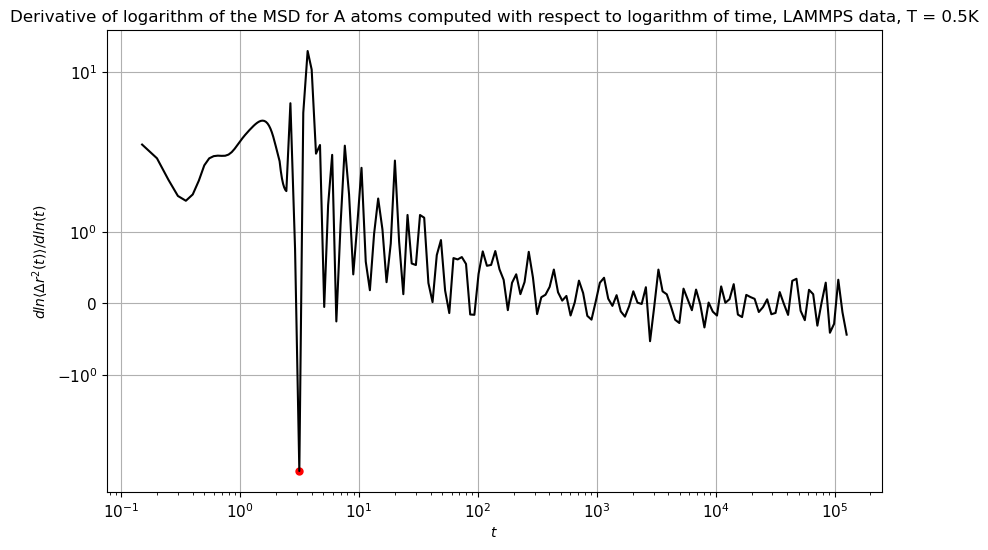

τ_β_A = 3.1500000000000004


In [88]:
# Detection of tau_beta for A atoms:
tau_beta_A = find_tau_beta(t, dlogMSD_dlogt_A)
# Find the index corresponding to tau_beta_A in the array t
tau_beta_A_index = np.argmin(np.abs(t - tau_beta_A))
# Get the value of the derivative at tau_beta_A
tau_beta_A_value = dlogMSD_dlogt_A[tau_beta_A_index]

# Plotting dln<r^2>/dlnt over time:
plt.figure(figsize=(10, 6))
plt.loglog(t, dlogMSD_dlogt_A, color='black')
plt.xlabel('$t$')
plt.ylabel(r'$ dln\left \langle \Delta r^2 (t) \right \rangle/dln(t)$')
plt.yscale('symlog')  # symmetric logarithmic y-axis --> useful for negative values and strong presence of noise
# Marker on plot:
plt.scatter(tau_beta_A, tau_beta_A_value, color='red', s=25, marker='o')
plt.grid(True)
#plt.legend()
plt.title('Derivative of logarithm of the MSD for A atoms computed with respect to logarithm of time, LAMMPS data, T = 0.5K')
plt.show()

# Output dei risultati:
print(f"τ_β_A = {tau_beta_A}")

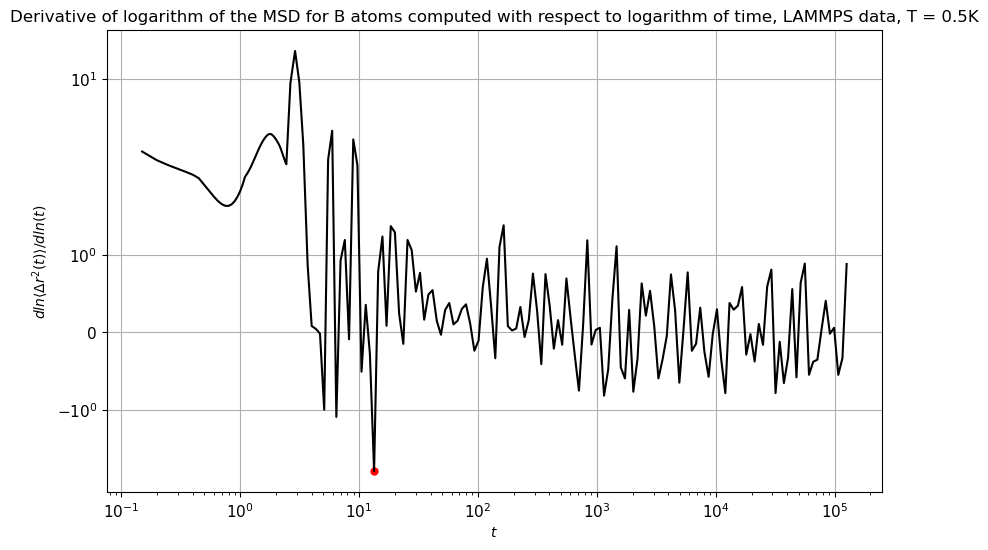

τ_β_B = 13.4


In [89]:
# Detection of tau_beta for B atoms:
tau_beta_B = find_tau_beta(t, dlogMSD_dlogt_B)
# Find the index corresponding to tau_beta_B in the array t
tau_beta_B_index = np.argmin(np.abs(t - tau_beta_B))
# Get the value of the derivative at tau_beta_A
tau_beta_B_value = dlogMSD_dlogt_B[tau_beta_B_index]

# Plotting dln<r^2>/dlnt over time:
plt.figure(figsize=(10, 6))
plt.loglog(t, dlogMSD_dlogt_B, color='black')
plt.xlabel('$t$')
plt.ylabel(r'$ dln\left \langle \Delta r^2 (t) \right \rangle/dln(t)$')
plt.yscale('symlog')  # symmetric logarithmic y-axis --> useful for negative values and strong presence of noise
# Marker on plot:
plt.scatter(tau_beta_B, tau_beta_B_value, color='red', s=25, marker='o')
plt.grid(True)
#plt.legend()
plt.title('Derivative of logarithm of the MSD for B atoms computed with respect to logarithm of time, LAMMPS data, T = 0.5K')
plt.show()

# Output dei risultati:
print(f"τ_β_B = {tau_beta_B}")

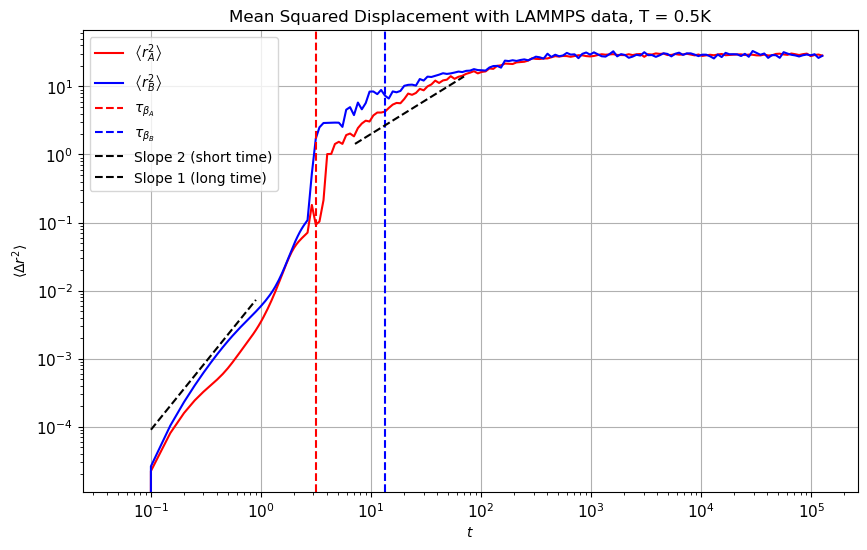

τ_β_A = 3.1500000000000004
τ_β_B = 13.4


In [90]:
# Logarithmic plot:
plt.figure(figsize=(10, 6))
plt.loglog(t, msd_lammps_A, color='red', label=r'$\left\langle r_{A}^2 \right\rangle$')
plt.loglog(t, msd_lammps_B, color='blue', label=r'$\left\langle r_{B}^2 \right\rangle$')
#plt.plot(t, Q, label=r'$Q_{total}(t)$', color='blue')
plt.xlabel('$t$')
plt.ylabel(r'$\left \langle \Delta r^2 \right \rangle$')
plt.title(f'Mean Squared Displacement with LAMMPS data, T = 0.5K')
plt.axvline(x=tau_beta_A, color='red', linestyle='--', label=r'$\tau_{\beta_{A}}$')
plt.axvline(x=tau_beta_B, color='blue', linestyle='--', label=r'$\tau_{\beta_{B}}$')

# Adding the dashed lines:
# Line with slope 2
t_short = np.linspace(0.1, 0.9, 100)
plt.loglog(t_short, 0.009 * t_short**2, '--', label='Slope 2 (short time)', color='black')

# Line with slope 1
t_long = np.linspace(tau_beta_A+4, 70, 80)
plt.loglog(t_long, 0.2 * t_long, '--', label='Slope 1 (long time)', color='black')

plt.legend()
plt.grid(True)
plt.show()

### Print characteristics time of beta relaxation:
print(f"τ_β_A = {tau_beta_A}")
print(f"τ_β_B = {tau_beta_B}")

In [91]:
# Alpha times for A and B atoms:
tau_alpha_value = 1/np.e

tau_alpha_lammps_A = find_tau_alpha(Q_A_lammps)
print(f"τ_α for the type A atoms is at time step {tau_alpha_lammps_A}")

# Corresponding time value (tau_alpha is the time step):
tau_alpha_time_lammps_A = t[tau_alpha_lammps_A]  
print(f"t = τ_α_A = {tau_alpha_time_lammps_A}")

tau_alpha_lammps_B = find_tau_alpha(Q_B_lammps)
print(f"τ_α for the type B atoms is at time step {tau_alpha_lammps_B}")

# Corresponding time value (tau_alpha is the time step):
tau_alpha_time_lammps_B = t[tau_alpha_lammps_B]  
print(f"t = τ_α_B = {tau_alpha_time_lammps_B}")

τ_α for the type A atoms is at time step 30
t = τ_α_A = 1.55
τ_α for the type B atoms is at time step 29
t = τ_α_B = 1.5


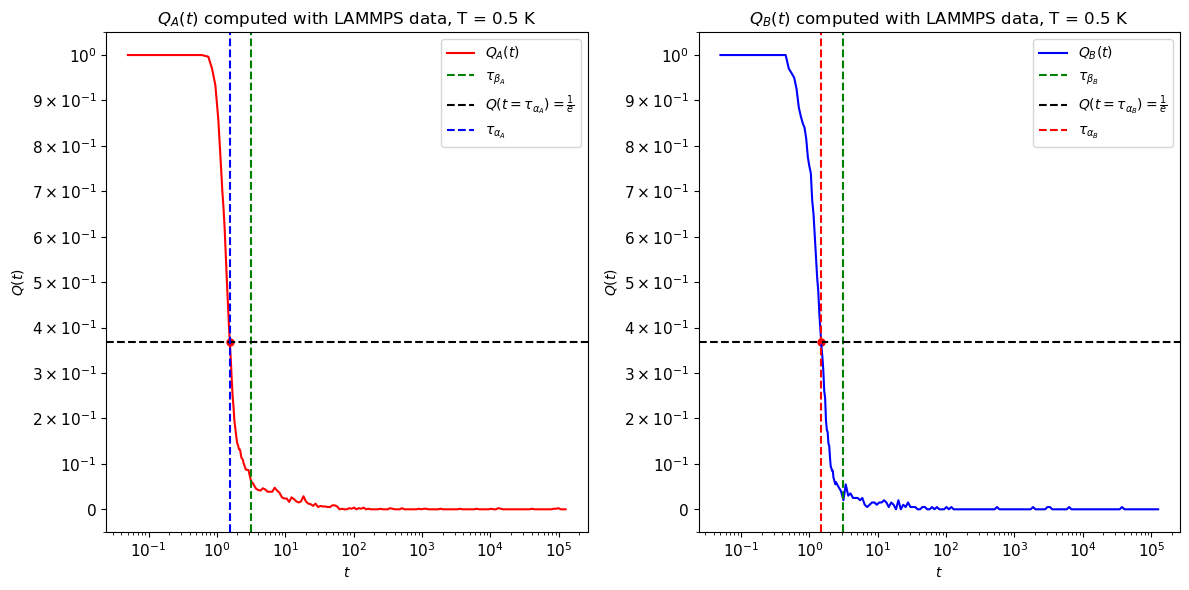

In [92]:
# Results Visualization:
plt.figure(figsize=(12, 6))

# Plot per Q_A
plt.subplot(1, 2, 1)
plt.loglog(t, Q_A_lammps, label=r'$Q_A(t)$', color='red')
plt.xlabel('$t$')
plt.ylabel(f'$Q(t)$')
plt.title(f'$Q_A(t)$ computed with LAMMPS data, T = 0.5 K')
# Add ticks for a better comparison with Karmakar paper
plt.yscale('symlog')
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.axvline(x=tau_beta_A, color='green', linestyle='--', label=r'$\tau_{\beta_{A}}$')
# Karmakar paper [3]: 'The α-relaxation time, τα is defined at the time where this correlation function decays 
# to 1/e to its initial value as Q(t = τα) = 1/e '
plt.axhline(y=1/np.e, color='black', linestyle='--', label=r'$Q(t=\tau_{\alpha_{A}}) = \frac{1}{e}$')
plt.axvline(x=tau_alpha_time_lammps_A, color='blue', linestyle='--', label=r'$\tau_{\alpha_{A}}$')
# Marker:
plt.scatter(tau_alpha_time_lammps_A, tau_alpha_value, color='red', s=25, marker='o')
plt.legend()
#plt.grid(True)




# Plot per Q_B
plt.subplot(1, 2, 2)
plt.loglog(t, Q_B_lammps, label=r'$Q_B(t)$', color='blue')
plt.xlabel('$t$')
plt.ylabel(f'$Q(t)$')
plt.title(f'$Q_B(t)$ computed with LAMMPS data, T = 0.5 K')
# Add ticks for a better comparison with Karmakar paper
plt.yscale('symlog')
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.axvline(x=tau_beta_A, color='green', linestyle='--', label=r'$\tau_{\beta_{B}}$')
# Karmakar paper [3]: 'The α-relaxation time, τα is defined at the time where this correlation function decays 
# to 1/e to its initial value as Q(t = τα) = 1/e '
plt.axhline(y=1/np.e, color='black', linestyle='--', label=r'$Q(t=\tau_{\alpha_{B}}) = \frac{1}{e}$')
plt.axvline(x=tau_alpha_time_lammps_B, color='red', linestyle='--', label=r'$\tau_{\alpha_{B}}$')
# Marker:
plt.scatter(tau_alpha_time_lammps_B, tau_alpha_value, color='red', s=25, marker='o')
plt.legend()
#plt.grid(True)

plt.tight_layout()
plt.show()

#### <span style = "color:red"> **Possibile errors?** </span>

The problem may lie in the quality of the available data. Since the curves for $Q(t)$ and the MSD do not show the expected behavior and this leads to values of $\tau_{\beta}$ larger than $\tau_{\alpha}$ , it may be useful to compare our results with those of the paper by Karmakar [3] to see where there might be discrepancies.

Some considerations:
* Data Quality: the data we are working on may be affected by noise or numerical issues. The LAMMPS simulations were performed using logarithmic time steps, which may produce data with significant variations between time steps, especially in the derivative calculation. This may affect the derivative $ \frac{dln(\left \langle \Delta r^2 (t) \right \rangle)}{dln(t)}$ and the identification of $\tau_{\beta}$.

* Inflection in the $\beta$-regime: as indicated in the Karmakar paper [3], the inflection in the $\beta$-regime is key to correctly identify $\tau_{\beta}$ and from the image below you can see that it is very pronounced for low $T$ temperatures. The curves we produced do not show this inflection (in this case we analyzed the curve at $T=0.5 K$.


**Comparison with Karmakar Paper**

As can be seen from the plots reproduced in the paper, there are notable differences in the $\beta$-relaxation regime between the plots reproduced in our notebook and theirs.

![Karmakar MSD and dlogMSD_dlogt](reference_images/msd_and_dlogmsd_dlogt.png)


As we can see from the above image, Karmakar's plots have data that are much cleaner and much less noisy. This is a fundamental feature to have a more accurate analysis of the $\beta$-relaxation regime and of the various characteristic times such as $\tau_{\alpha}$ and $\tau_{\beta}$.

Unfortunately, our molecular simulations are affected by a lot of noise, which then affects the trend of the MSD as a function of time $\left \langle \Delta r^2(t) \right \rangle$ and its derivative $dln \left ( \left \langle \Delta r^2(t) \right \rangle \right ) / dln(t) $: all this leads to having an evidently inaccurate calculation regarding what is the detection of the characteristic time of the $\beta$-relaxation regime. 

**___________________________________________________________________________________________________________________________**

# <span style = "color:blue">  1.  $\beta$-Relaxation and von Schweidler Law </span>

We have found that the detection of the characteristic time $\tau_{\beta}$ that determines the $\beta$-relaxation regime is not effective with the data we have.

The curve that seems, more than all, to have a trend with a small semblance of $\beta$ relaxation could be the one produced by the Python simulation with `nMD=1000` time steps (so up to $t_{max}=5$) for the temperature $T=0.45$K.
We will load the data from the its file `.txt` into a numpy array and proceed to analyze its trend.

In [93]:
# Change current directory to 'Q(t)' folder
os.chdir('Q(t)')
# Get the current directory
current_directory = os.getcwd()

print("The current directory is:", current_directory)
Q = np.loadtxt("Q(t)_T_0.45.txt")
os.chdir('..')
# Get the current directory
current_directory = os.getcwd()
print("The current directory is:", current_directory)

The current directory is: C:\Users\emanu\OneDrive - Politecnico di Milano\POLIMI\II ANNO\II SEMESTRE\MOLECULAR MODELING OF MATERIALS\Progetto\Q(t)
The current directory is: C:\Users\emanu\OneDrive - Politecnico di Milano\POLIMI\II ANNO\II SEMESTRE\MOLECULAR MODELING OF MATERIALS\Progetto


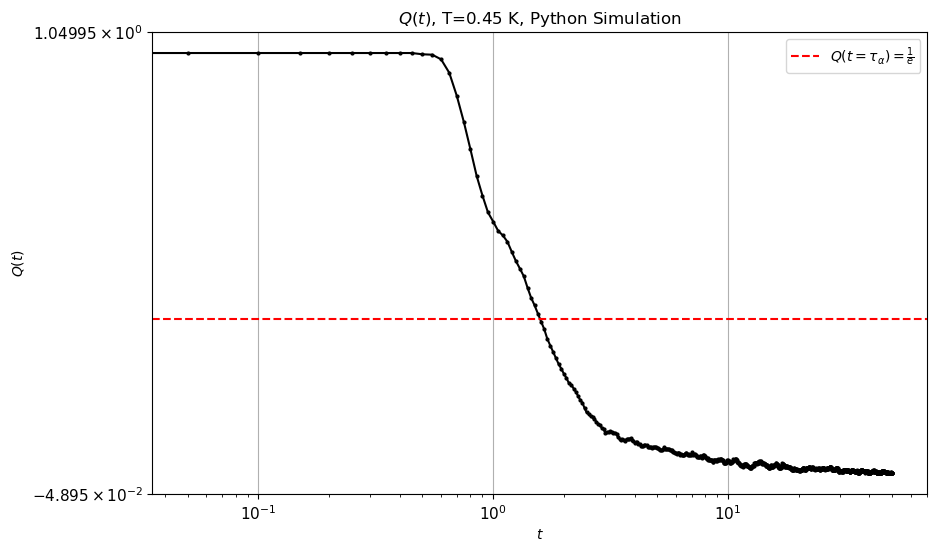

In [94]:
plt.figure(figsize=(10, 6))
t = np.arange(len(Q)) * Deltat
# Plot Q(t):
plt.loglog(t, Q, color='black', marker='o', markersize=2)
# Labels and title:
plt.xlabel(r'$t$')
plt.ylabel(r'$Q(t)$')

plt.title(r'$Q(t)$, T=0.45 K, Python Simulation')


# Karmakar paper [3]: 'The α-relaxation time, τα is defined at the time where this correlation function decays 
# to 1/e to its initial value as Q(t = τα) = 1/e '
plt.axhline(y=1/np.e, color='red', linestyle='--', label=r'$Q(t=\tau_{\alpha}) = \frac{1}{e}$')
plt.yscale('symlog')  # symmetric logarithmic y-axis --> useful for negative values and strong presence of noise
plt.legend()

plt.grid(True)

plt.show()

This is the schematic plot from Kamarkar paper [3]:
![Karmakar_Schematic_Raffiguration](Q(t)/karmakar_schematic_raffiguration.png)


Although our data is noisy and lacks the clarity of Karmakar's results, we can attempt to identify a plausible $\beta$-relaxation regime by analyzing the inflection points in the $Q(t)$ curve. The hallmark of the $\beta$-relaxation regime is a temporary plateau or a period where the decay of $Q(t)$ slows down, marking a transition between the ballistic regime and the onset of the $\alpha$-relaxation regime.

To numerically identify this inflection point, we can compute the derivative of $Q(t)$ with respect to time, $\frac{dQ(t)}{dt}$, and search for a region where the derivative becomes less negative for a brief period before continuing to decrease. This would indicate a slowing down of the decay rate, which is characteristic of the $\beta$-relaxation regime. By finding this change in slope, we can pinpoint the time at which the $\beta$-relaxation regime begins, even in the presence of noise.

This method provides a systematic way to identify the $\beta$-relaxation regime, using the derivative to reveal subtle features that are not immediately obvious from the raw $Q(t)$ data. 

In [95]:
# This function has been used before for the computation of the RMSD, this is slightly modified:
def calculate_derivative(Q, Deltat):
    # Unidimensional array representing time with the same length as rmsd arrays
    time = np.arange(len(Q)) * Deltat
    
    # Numerical derivative of the Q over time:
    Q_derivative = np.gradient(Q, time)
    
    return Q_derivative

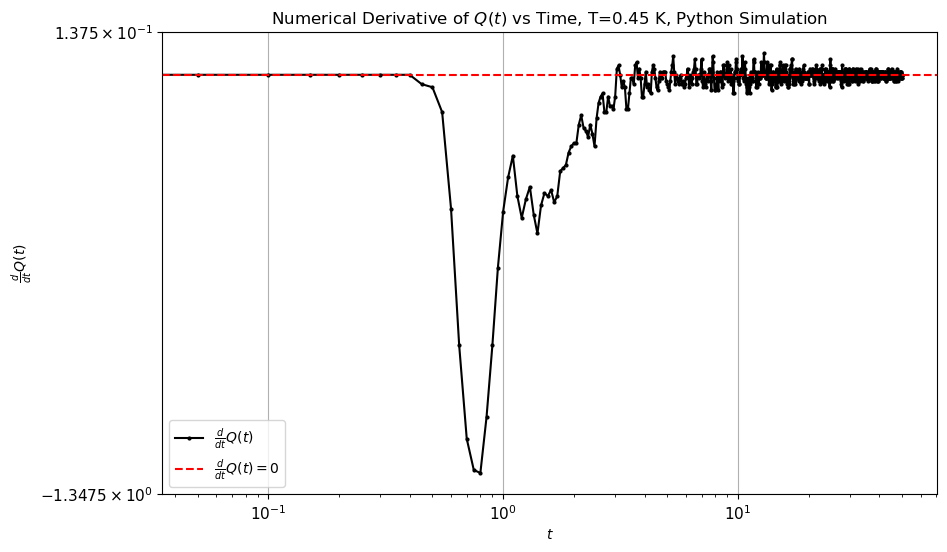

In [96]:
Q_derivative = calculate_derivative(Q, Deltat)

# Plot derivative in time:
plt.figure(figsize=(10, 6))
plt.loglog(t, Q_derivative, label=r'$\frac{d}{dt}Q(t)$', color='black', marker='o', markersize=2)
plt.xlabel(r'$t$')
plt.ylabel(r'$\frac{d}{dt}Q(t)$')
plt.title(r'Numerical Derivative of $Q(t)$ vs Time, T=0.45 K, Python Simulation')
plt.yscale('symlog')  # symmetric logarithmic y-axis --> useful for negative values and strong presence of noise
plt.grid(True)

# Highlights dQ(t)/dt = 0
plt.axhline(0, color='red', linestyle='--', label=r'$\frac{d}{dt}Q(t)=0$')
plt.legend()

plt.show()

t = τ_α = 1.6


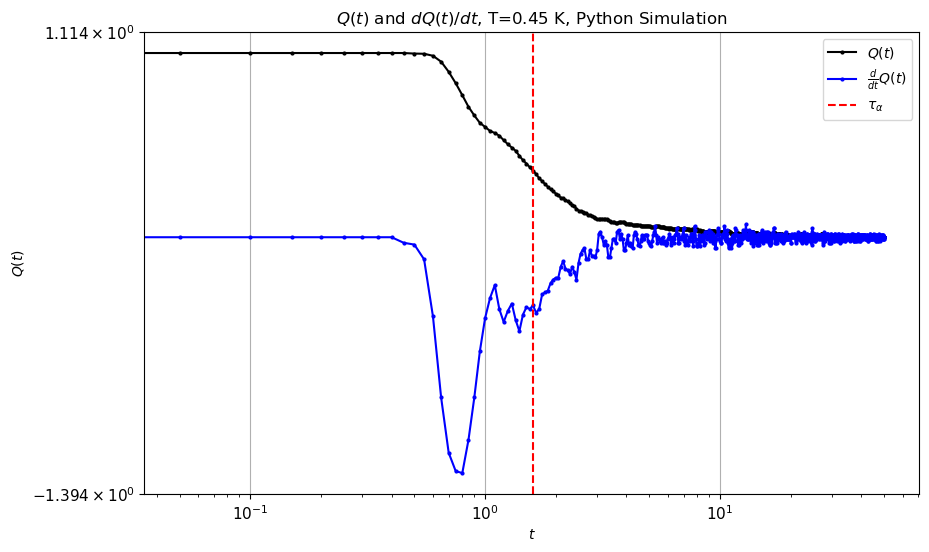

In [97]:
# Determination of characteristic time tau_alpha:
tau_alpha = find_tau_alpha(Q)
# Corresponding time value (tau_alpha is the time step):
tau_alpha_time = t[tau_alpha]  
print(f"t = τ_α = {tau_alpha_time}")

plt.figure(figsize=(10, 6))
# Both Q(t) and dQ(t)/dt:
plt.loglog(t, Q, color='black', label=r'$Q(t)$', marker='o', markersize=2)
# Plot derivative in time:
plt.loglog(t, Q_derivative, label=r'$\frac{d}{dt}Q(t)$', color='blue', marker='o', markersize=2)
# Labels and title:
plt.xlabel(r'$t$')
plt.ylabel(r'$Q(t)$')
plt.title(r'$Q(t)$ and $dQ(t)/dt$, T=0.45 K, Python Simulation')

# Karmakar paper [3]: 'The α-relaxation time, τα is defined at the time where this correlation function decays 
# to 1/e to its initial value as Q(t = τα) = 1/e '
#plt.axhline(y=1/np.e, color='red', linestyle='--', label=r'$Q(t=\tau_{\alpha}) = \frac{1}{e}$')
plt.yscale('symlog')  # symmetric logarithmic y-axis --> useful for negative values and strong presence of noise
plt.axvline(x=tau_alpha_time, color='red', linestyle='--', label=r'$\tau_{\alpha}$')
plt.legend()

plt.grid(True)

plt.show()


### Manual Detection of the $\beta$-Relaxation Regime

Upon analyzing the numerical derivative of $Q(t)$, we observed significant oscillations in the derivative values, with many points fluctuating between positive and negative values, and some values being extremely close to zero (e.g., $1 \times 10^{-15}$). These oscillations made it challenging to identify the $\beta$-relaxation regime automatically, as the fluctuations disrupt the expected smooth behavior typically observed in well-defined regimes.

To address this issue, we opted for a **manual identification** of the $\beta$-relaxation regime. The decision to manually select the $\beta$-relaxation time interval was based on visual inspection of the derivative plot and an understanding of the physical characteristics of the $\beta$-relaxation. 

The interval we selected, from $t = 0.9$ to $t = 1.2$, corresponds to a period where the behavior of $Q(t)$ aligns with the expected slowing down associated with the $\beta$-relaxation, before the onset of the $\alpha$-relaxation regime.

Below, there is the Python code used to manually define the time range for the $\beta$-relaxation regime and highlight it in the $Q(t)$ plot.


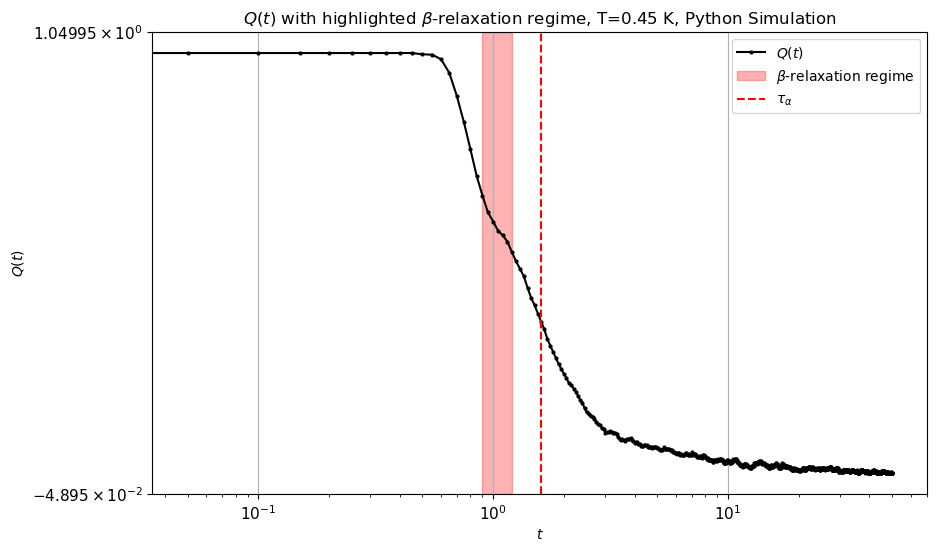

t = τ_α = 1.6
β-relaxation regime from t=0.9 to t=1.2


In [98]:
# Define manually the time interval for the beta-relaxation regime
t_init_beta_regime = 0.9  
t_end_beta_regime = 1.2   

plt.figure(figsize=(10, 6))

# Plot Q(t) and highlight the beta-relaxation regime
plt.loglog(t, Q, color='black', label=r'$Q(t)$', marker='o', markersize=2)
plt.xlabel(r'$t$')
plt.ylabel(r'$Q(t)$')
plt.title(r'$Q(t)$ with highlighted $\beta$-relaxation regime, T=0.45 K, Python Simulation')

# Highlight the manually defined beta-relaxation regime
plt.axvspan(t_init_beta_regime, t_end_beta_regime, color='red', alpha=0.3, label=r'$\beta$-relaxation regime')
plt.yscale('symlog')  # symmetric logarithmic y-axis --> useful for negative values and strong presence of noise
plt.axvline(x=tau_alpha_time, color='red', linestyle='--', label=r'$\tau_{\alpha}$')
# Show the plot with the beta-relaxation regime highlighted
plt.legend()
plt.grid(True)

# Save plot as png image: 
plt.savefig('plot_Q(t)_Python_Simulation_T_045_beta_regime_highlighted.png')

plt.show()

# alpha-regime characteristic time:
print(f"t = τ_α = {tau_alpha_time}")
# beta-relaxation regime:
print(f"β-relaxation regime from t={t_init_beta_regime} to t={t_end_beta_regime}")

## Interpretation of results

As we can see from the graph above, contrary to the analysis of the $\beta$-regime conducted through the 'method' used by Kamarkar in his paper (i.e. looking for the characteristic time $\tau_{\beta}$, coinciding with the minimum of the function $dln\left ( \left \langle \Delta r^2(t) \right \rangle \right ) / dln(t)$) which turned out to be disappointing in terms of expected results), the $\beta$-regime seems to have that typical trend which is also found in the papers by Kob-Andersen[1]-[2] and Karmakar [3].

We can see a zoom of the behavior of the correlation function $Q(t)$ below:

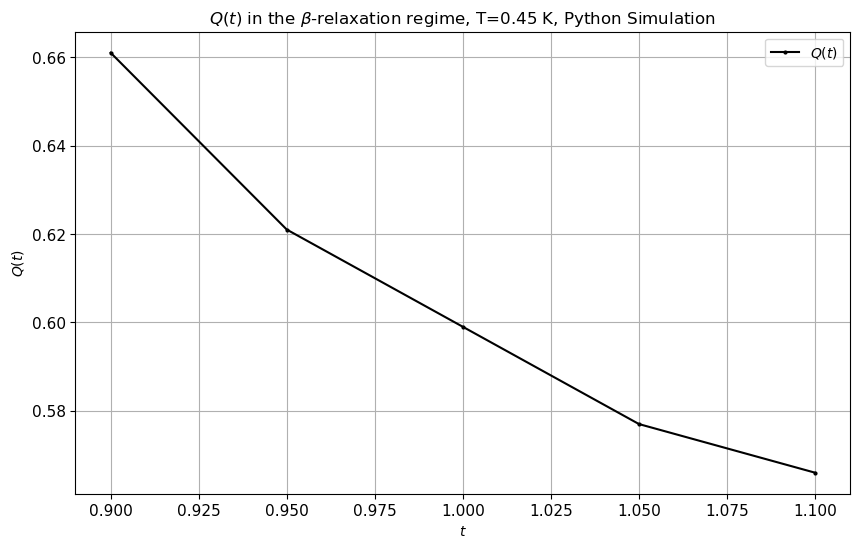

In [99]:
# Zoom of beta-regime:
t_init_beta_index = int(t_init_beta_regime / Deltat)
t_end_beta_index = int(t_end_beta_regime / Deltat)

plt.figure(figsize=(10, 6))

# Plot Q(t) and highlight the beta-relaxation regime
plt.plot(t[t_init_beta_index:t_end_beta_index], Q[t_init_beta_index:t_end_beta_index], color='black', label=r'$Q(t)$', marker='o', markersize=2)
plt.xlabel(r'$t$')
plt.ylabel(r'$Q(t)$')
plt.title(r'$Q(t)$ in the $\beta$-relaxation regime, T=0.45 K, Python Simulation')

plt.legend()
plt.grid(True)
 

plt.show()


**___________________________________________________________________________________________________________________________**

# <span style = "color:red"> Fitting of Von Schweidler's law </span> 

##  <span style = "color:blue">  2. Mode-Coupling Theory (MCT) predictions</span>

From Kob-Andersen paper [1]: "One of the main predictions of MCT for the behavior of the correlation functions in this $\beta$-relaxation regime is the existence of a von Schweidler law.

This law states that a correlation function $\phi(t)$ can be written in the form:
\begin{equation}
\phi(t) = f — A \left( t/ \tau (T) \right)^b   
\end{equation}
where $f$ is the height of the plateau often also called the *nonergodicity parameter*, and $A$ and $b$ are positive constants. 
$A$ and $f$ are predicted to be smooth functions of temperature if $T>T_C$ and to be dependent on the type of correlation function investigated but the exponent $b$ should be the same for all correlation functions. "

In the paper is also written that: "In order to test for the presence of a scaling behavior we plotted the data from the figure below versus a rescaled time $t/\tau(T)$. The value of the scaling time $\tau(T)$ was chosen at each temperature such that $F_s(q, \tau ) = 1/e $. "

We can understand that since $\tau(T)$ is such that $F_s(q, \tau ) = 1/e $, this characteristic time coincides with the definition that we gave to $\tau_{\alpha}$ for the analysis of the correlation function $Q(t)$. In fact, $Q(t= \tau_{\alpha}) = 1/e$ . 

![KA_sisf_von_schweidler_law](reference_images/kob_andersen_sisf_von_schweidler_law.png)

In the figure we can see the plot of Kob-Andersen paper [1] where is represented the Self-intermediate-scattering function for the $A$ particles
for $q = 7.251 \sigma_{AA}^{-1}$  vs rescaled time $t/\tau(T)$ (solid lines). The Dashed curve represents the fit with von Schweidler law. Temperatures from right to left. 

They claim that: "we can clearly recognize the presence of a master curve. This master curve can be fitted very well by a power law of the form given
by the initial equation with $f = 0.783$ and $b = 0.488 \pm 0.015$. This
fit is included in the plot as well. Since the fit is valid for almost 3 orders of magnitude in rescaled time, it is definitely significant. Thus we find a power law with an exponent $b$ and an offset $f$ that are *independent* by the temperature."

And this is very important because they reported even that "this is exactly the behavior predicted by **MCT** for the behavior of the correlation function in the later part of the $\beta$-relaxation region, i.e., a von Schweidler law with a nonergodicity parameter $f$ and an exponent $b$ that are independent of temperature."

Adapting the fitting to our model, the von Schweidler's law can be represented as a function of this type:
\begin{equation}
\phi(t) = f - A \cdot \left ( t/ \tau_{\alpha} \right )^b
\end{equation}
where $f$ is the height of the plateau often (nonergodicity parameter), $A$ is a scale parameter, $\tau_{\alpha}$ is the characteristic time of the $\alpha$-relaxation regime and $\beta$ is the law's exponent. 


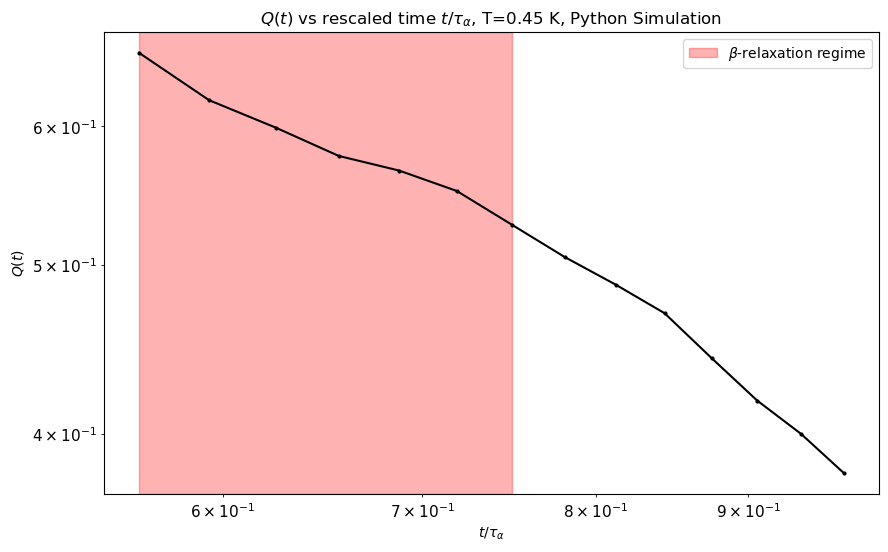

In [100]:
# Plot of Q vs rescaled time t/tau_alpha:

# Rescaled time array:
t_rescaled = t / tau_alpha_time


plt.figure(figsize=(10, 6))

# Plot Q(t) and highlight the beta-relaxation regime
plt.loglog(t_rescaled[t_init_beta_index:tau_alpha], Q[t_init_beta_index:tau_alpha], color='black', marker='o', markersize=2)
plt.xlabel(r'$t/\tau_{\alpha}$')
plt.ylabel(r'$Q(t)$')
plt.title(r'$Q(t)$ vs rescaled time $t/\tau_{\alpha}$, T=0.45 K, Python Simulation')
# Highlight the manually defined beta-relaxation regime
plt.axvspan(t_init_beta_regime/tau_alpha_time, t_end_beta_regime/tau_alpha_time, color='red', alpha=0.3, label=r'$\beta$-relaxation regime')
#plt.yscale('symlog')  # symmetric logarithmic y-axis --> useful for negative values and strong presence of noise

plt.legend()
plt.grid(True)


plt.show()

In [101]:
# Fitting with master curve:
def von_schweidler(t, f, A, b):
    return f - A * (t / tau_alpha_time) ** (-b)

# 3 parameters to estimate: f, A , b

# Initial guess for f, A, e b:
initial_guess = [0.56, 0.5, 0.45]   # hypothesis

# Fit of Von Schweidler law witht rescaled and parameter τ_α known
popt, pcov = opt.curve_fit(von_schweidler, t_rescaled[t_init_beta_index:tau_alpha], Q[t_init_beta_index:tau_alpha], 
                           p0=initial_guess, maxfev=2000)

# Parameters f, A, e b
f, A, b = popt
print(f"Fitted parameters: f={f}, A={A}, b={b}")

Fitted parameters: f=1.0138086267027606, A=1.0504784519675643, b=-1.0092772643006598


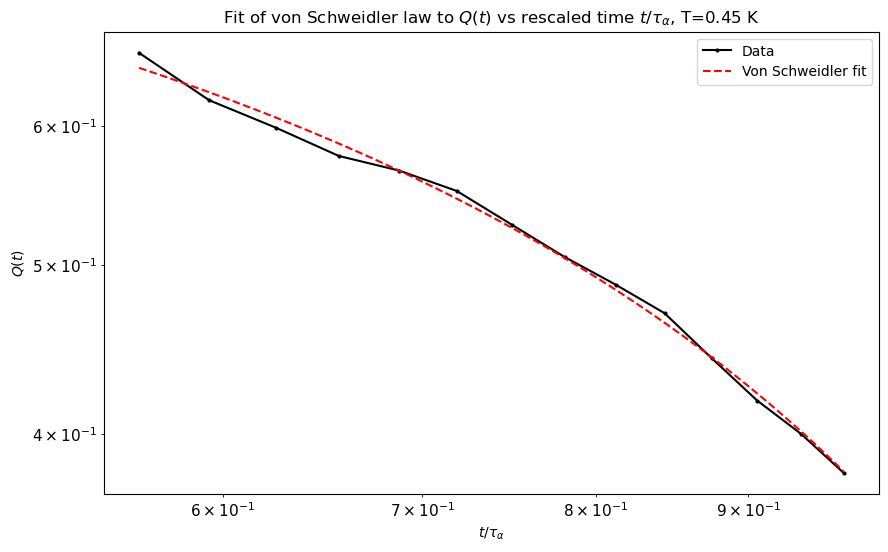

In [102]:
# Fitting time rescaled:
t_fit = np.linspace(min(t_rescaled[t_init_beta_index:tau_alpha]), max(t_rescaled[t_init_beta_index:tau_alpha]), 100)

# Fitted curve computation:
Q_fit = von_schweidler(t_fit, f, A, b)

# Plot of data and fit:
plt.figure(figsize=(10, 6))
plt.loglog(t_rescaled[t_init_beta_index:tau_alpha], Q[t_init_beta_index:tau_alpha], color='black', marker='o', markersize=2, label='Data')
plt.loglog(t_fit, Q_fit, color='red', linestyle='--', label='Von Schweidler fit')

plt.xlabel(r'$t/\tau_{\alpha}$')
plt.ylabel(r'$Q(t)$')
plt.title(r'Fit of von Schweidler law to $Q(t)$ vs rescaled time $t/\tau_{\alpha}$, T=0.45 K')
plt.legend()
plt.grid(True)
plt.show()


### Problem with the fitting:

The $b$ parameter should be positive (not negative), and the value of $f$ should be closer to the plateau of the beta regime, which as you indicated should be around $f \simeq 0.56$.

In Von Schweidler's law, $b$ describes the exponent of a power decay. A negative exponent implies a growth of the function, rather than a decay (there is a $-$ in front of the exponent).
This could have been caused by the fact that the fitting algorithm may have gotten stuck in a non-physical local minimum, perhaps.  

Since the fitting reported a value $f \simeq 1.0138$, this indicates that the fitting maybe could be influenced by some points that do not belong to $\beta$-regime. This caused the greater value of $f$ with respect to the expected value found by Kob&Andersen. 

This could also be caused by the fact that the paper used a level of accuracy that could not be replicated with the molecular dynamics simulation of the Kob-Andersen model with Python.

**========================================================================================================================**

# <span style="color: red"> Bibliography </span>

[1]:Kob, Walter, and Hans C. Andersen. "Scaling Behavior in the $\beta$-Relaxation Regime of a Supercooled Lennard-Jones Mixture." *Physical Review Letters*, vol. 73, no. 10, 1994, pp. 1376-1379. https://doi.org/10.1103/PhysRevLett.73.1376

[2]:Kob, Walter, and Hans C. Andersen. "Testing Mode-Coupling Theory for a Supercooled Binary Lennard-Jones Mixture I: The van Hove Correlation Function." *Physical Review E*, vol. 51, no. 5, 1995, pp. 4626-4641. https://doi.org/10.1103/PhysRevE.51.4626.

[3]: Karmakar, Smarajit. "An Overview on Short and Long Time Relaxations in Glass-forming Supercooled Liquids." Journal of Physics: Conference Series, vol. 759, 2016, pp. 012008. https://doi.org/10.1088/1742-6596/759/1/012008